# Part I - Programme for International Student Assessment (PISA) Data Exploration

## by Jamiil Ali

## Introduction
> PISA is a  is a survey of students' skills and knowledge as they approach the end of compulsory education. The dataset is is a worldwide study developed by the Organisation for Economic Co-operation and Development (OECD) which examines the skills of 15-year-old school students around the world. The study assesses students’ mathematics, science, and reading skills and contains a wealth of information on students’ background, their school and the organisation of education systems.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
%matplotlib inline

In [2]:
pisadict2012 = pd.read_csv("pisadict2012.csv", encoding='latin1', index_col=0)

In [3]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_colwidth', 1000)

In [4]:
pisadict2012

,x
CNT,Country code 3-character
SUBNATIO,Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
STRATUM,Stratum ID 7-character (cnt + region ID + original stratum ID)
OECD,OECD country
NC,National Centre 6-digit Code
SCHOOLID,School ID 7-digit (region ID + stratum ID + 3-digit school ID)
STIDSTD,Student ID
ST01Q01,International Grade
ST02Q01,National Study Programme
ST03Q01,Birth - Month


In [5]:
pd.reset_option('all', True)

In [6]:
%%time
pisa2012 =pd.read_csv('pisa2012.csv', encoding='latin1', index_col=0, 
                      error_bad_lines=False, warn_bad_lines=True,
                      low_memory=False, skiprows=[241337])

CPU times: user 1min 6s, sys: 29.4 s, total: 1min 35s
Wall time: 11min 45s


In [7]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_info_columns', 1000)

In [8]:
pisa2012.sample(10)

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUDREL,ANCSUBN

In [9]:
pisa2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241336 entries, 1 to 241336
Data columns (total 635 columns):
CNT            241336 non-null object
SUBNATIO       241336 non-null int64
STRATUM        241336 non-null object
OECD           241336 non-null object
NC             241336 non-null object
SCHOOLID       241336 non-null int64
STIDSTD        241336 non-null int64
ST01Q01        241336 non-null int64
ST02Q01        241284 non-null float64
ST03Q01        241336 non-null int64
ST03Q02        241336 non-null int64
ST04Q01        241336 non-null object
ST05Q01        235233 non-null object
ST06Q01        223900 non-null float64
ST07Q01        225586 non-null object
ST07Q02        222401 non-null object
ST07Q03        148349 non-null object
ST08Q01        237164 non-null object
ST09Q01        237197 non-null object
ST115Q01       237280 non-null float64
ST11Q01        225530 non-null object
ST11Q02        215973 non-null object
ST11Q03        195968 non-null object
ST11Q04        19

In [10]:
boolean_columns = []
for column in pisa2012.select_dtypes('object').columns:
    if pisa2012[column].nunique() == 2 and "Yes" in pisa2012[column].unique():
        boolean_columns.append(column)

In [11]:
pisa2012[boolean_columns].sample(10)

,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC09Q03,EC11Q02,EC11Q03,ST22Q01
215592,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,NaN,"No, never","No, never",Yes,"No, never",Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN
149305,Yes,Yes,Yes,No,No,No,NaN,Yes,No,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209537,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,"No, never","No, never","No, never","No, never","No, never",Yes,"No, never",Yes,Yes,Yes,"No, never","No, never","No, never",NaN
58359,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234265,Yes,Yes,Yes,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,NaN,Yes,NaN,Yes,Yes,NaN,NaN,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125903,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179526,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"No, never",Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,Yes
44947,Yes,NaN,Yes,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,"No, never","No, never","No, never","No, never","No, never","No, never","No, never","No, never","No, never","No, never","No, never","No, never","No, never",Yes
12276,Yes,Yes,Yes,Yes,No,No,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206353,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pd.reset_option('all', True)

In [13]:
# check duplicates

pisa2012.duplicated().any()

False

In [14]:
pisa2012['NC'].unique()

array(['Albania', 'United Arab Emirates ', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria ', 'Brazil ', 'Canada ',
       'Switzerland', 'Chile', 'Colombia ', 'Costa Rica ',
       'Czech Republic ', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France ', 'United Kingdom (excl.Scotland) ',
       'United Kingdom (Scotland)', 'Greece ', 'Hong Kong-China',
       'Croatia', 'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel ',
       'Italy'], dtype=object)

In [15]:
pisa2012['CNT'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada', 'Switzerland',
       'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Germany',
       'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia', 'Hungary',
       'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy'], dtype=object)

In [16]:
# check if the column are equal

pisa2012['CNT'].equals(pisa2012['NC'])

False

In [17]:
# Get total number of missing values

pisa2012.isnull().sum().sum()

45481635

In [18]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_info_columns', 1000)

In [19]:
# Get the statistic of numerical columns

pisa2012.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
SUBNATIO,241336.0,3.205475e+06,2.746301e+06,80000.0000,1000000.000000,2.080000e+06,7.240000e+06,8.262000e+06
SCHOOLID,241336.0,2.386435e+02,2.148642e+02,1.0000,83.000000,1.650000e+02,3.290000e+02,9.020000e+02
STIDSTD,241336.0,5.920032e+03,5.365551e+03,1.0000,2055.000000,4.158000e+03,8.210000e+03,2.531300e+04
ST01Q01,241336.0,9.709322e+00,2.049923e+00,7.0000,9.000000,1.000000e+01,1.000000e+01,9.600000e+01
ST02Q01,241284.0,2.729087e+00,3.292759e+00,1.0000,1.000000,1.000000e+00,3.000000e+00,2.500000e+01
ST03Q01,241336.0,6.567557e+00,3.420700e+00,1.0000,4.000000,7.000000e+00,1.000000e+01,1.200000e+01
ST03Q02,241336.0,1.996075e+03,2.634106e-01,1996.0000,1996.000000,1.996000e+03,1.996000e+03,1.997000e+03
ST06Q01,223900.0,6.048937e+00,1.141765e+00,4.0000,5.000000,6.000000e+00,7.000000e+00,1.600000e+01
ST115Q01,237280.0,1.255171e+00,5.749736e-01,1.0000,1.000000,1.000000e+00,1.000000e+00,4.000000e+00
ST21Q01,18849.0,6.527137e+00,4.521022e+00,0.0000,3.000000,6.000000e+00,1.000000e+01,1.600000e+01


In [20]:
# Get the statistics of categorical columns

pisa2012.select_dtypes('object').describe().T

,count,unique,top,freq
CNT,241336,30,Spain,25313
STRATUM,241336,606,IDN0001,5622
OECD,241336,2,OECD,165724
NC,241336,31,Spain,25313
ST04Q01,241336,2,Female,122267
ST05Q01,235233,3,"Yes, for more than one year",151703
ST07Q01,225586,3,"No, never",205091
ST07Q02,222401,3,"No, never",201820
ST07Q03,148349,3,"No, never",144299
ST08Q01,237164,4,None,151988


In [21]:
pd.reset_option('all', True)

In [22]:
pisa2012.shape

(241336, 635)

In [23]:
pisa2012['ST01Q01'].describe()

count    241336.000000
mean          9.709322
std           2.049923
min           7.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          96.000000
Name: ST01Q01, dtype: float64

In [24]:
# correlation between mean international grade and schoolid ???

pisa2012.groupby(by=['SCHOOLID'], as_index=False)['ST01Q01'].mean().corr(method='pearson')

,SCHOOLID,ST01Q01
SCHOOLID,1.000000,0.215871
ST01Q01,0.215871,1.000000


In [25]:
# Does performance in MATH depend on GENDER ???

(pisa2012
 .groupby(by=['ST04Q01'], as_index=False)
 ['PV1MATH'].mean()
 .rename(columns={'ST04Q01': 'Gender',
                  'PV1MATH': 'Mean Plausible value 1 in mathematics'})
)

,Gender,Mean Plausible value 1 in mathematics
0,Female,465.067089
1,Male,478.657576


In [26]:
# Does performance in MATH depend on OECD ???

(pisa2012
 .groupby(by=['OECD'], as_index=False)
 ['PV1MATH'].mean()
 .rename(columns={'OECD': 'OECD Country',
                  'PV1MATH': 'Mean Plausible value 1 in mathematics'})
)

,OECD Country,Mean Plausible value 1 in mathematics
0,Non-OECD,414.137997
1,OECD,498.068079


In [27]:
# Does the Sense of Belonging - Belong at School affect a student's grades ???

(pisa2012
 .groupby(by=['ST87Q03'], as_index=False)
 ['ST01Q01'].mean()
 .rename(columns={'ST87Q03': "Sense of Belonging - Belong at School affect a student's grades",
                  'ST01Q01': 'Mean International grade'})
)

,Sense of Belonging - Belong at School affect a student's grades,Mean International grade
0,Agree,9.716297
1,Disagree,9.679530
2,Strongly agree,9.654726
3,Strongly disagree,9.597012


In [28]:
# Does Perceived Control - Problems Prevent from Putting Effort into School affect student grades ???

(pisa2012
 .groupby(by=['ST91Q03'], as_index=False)
 ['ST01Q01'].mean()
 .rename(columns={'ST91Q03': "Perceived Control - Problems Prevent from Putting Effort into School",
                  'ST01Q01': "Mean International grade"})
)

,Perceived Control - Problems Prevent from Putting Effort into School,Mean International grade
0,Agree,9.691960
1,Disagree,9.706323
2,Strongly agree,9.606802
3,Strongly disagree,9.680018


In [29]:
# Attitudes :: Attributions to Failure - Teacher Did Not Explain Well affect student grades ???

(pisa2012
 .groupby(by=['ST44Q03'], as_index=False)
 ['ST01Q01'].mean()
 .rename(columns={'ST44Q03': "Attributions to Failure - Teacher Did Not Explain Well",
                  'ST01Q01': "Mean International grade"})
)

,Attributions to Failure - Teacher Did Not Explain Well,Mean International grade
0,Likely,9.669801
1,Not at all likely,9.729776
2,Slightly likely,9.695983
3,Very Likely,9.635983


In [30]:
# Attitudes :: Math Teaching - Teacher shows interest affect student grades ???

(pisa2012
 .groupby(by=['ST77Q01'], as_index=False)
 ['ST01Q01'].mean()
 .rename(columns={'ST77Q01': "Math Teaching - Teacher shows interest affect student grades",
                  'ST01Q01': "Mean International grade"})
)

,Math Teaching - Teacher shows interest affect student grades,Mean International grade
0,Every Lesson,9.732269
1,Most Lessons,9.686005
2,Never or Hardly Ever,9.609054
3,Some Lessons,9.639266


In [31]:
# Practices :: Teacher-Directed Instruction - Encourages Thinking and Reasoning affect student grades ???

(pisa2012
 .groupby('ST79Q02', as_index=False)
 ['ST01Q01'].mean()
 .rename(columns={'ST79Q02': 'Teacher-Directed Instruction - Encourages Thinking and Reasoning',
                  'ST01Q01': 'Mean International grade'})
)

,Teacher-Directed Instruction - Encourages Thinking and Reasoning,Mean International grade
0,Every Lesson,9.662627
1,Most Lessons,9.673792
2,Never or Hardly Ever,9.718442
3,Some Lessons,9.706166


In [32]:
# Practices :: Teacher Support - Helps Students with Learning affect student grades ???

(pisa2012
 .groupby(by=['ST83Q03'], as_index=False)
 ['ST01Q01'].mean()
 .rename(columns={'ST83Q03': 'Teacher Support - Helps Students with Learning',
                  'ST01Q01': 'Mean International Grade'})
)

,Teacher Support - Helps Students with Learning,Mean International Grade
0,Agree,9.691600
1,Disagree,9.579873
2,Strongly agree,9.721039
3,Strongly disagree,9.604140


In [33]:
# Inequality :: Immigration status

(pisa2012
 .groupby(by=['IMMIG'], as_index=False)
 ['ST01Q01'].mean()
 .rename(columns={'IMMIG': 'Immigration status',
                  'ST01Q01': 'Mean International Grade'})
)

,Immigration status,Mean International Grade
0,First-Generation,9.674910
1,Native,9.717854
2,Second-Generation,9.600996


In [34]:
# Inequality :: Immigration status AND How many books at home

immig_book = \
pd.crosstab(index=pisa2012["ST28Q01"], 
            columns=pisa2012["IMMIG"], 
            colnames=['Immigration status'],
            normalize=True,
            margins=True, margins_name="All").style.format('{:.2%}')
immig_book.index.name='How many books at home'
immig_book

Immigration status,First-Generation,Native,Second-Generation,All
How many books at home,,,,
0-10 books,1.52%,15.14%,1.45%,18.11%
101-200 books,0.78%,14.02%,0.87%,15.67%
11-25 books,1.47%,16.18%,1.44%,19.08%
201-500 books,0.52%,10.57%,0.60%,11.69%
26-100 books,1.86%,24.94%,1.96%,28.76%
More than 500 books,0.30%,6.07%,0.31%,6.68%
All,6.44%,86.92%,6.63%,100.00%


In [35]:
%%time
# Compute the average of plausible scores to determine the PISA score of a student in a particular subject

pisa2012["Math"] = (pisa2012['PV1MATH']
                    + pisa2012['PV2MATH']
                    + pisa2012['PV3MATH']
                    + pisa2012['PV4MATH'] 
                    + pisa2012['PV5MATH'])/5

pisa2012["Reading"] = (pisa2012['PV1READ']
                       + pisa2012['PV2READ']
                       + pisa2012['PV3READ']
                       + pisa2012['PV4READ'] 
                       + pisa2012['PV5READ'])/5

pisa2012["Science"] = (pisa2012['PV1SCIE']
                       + pisa2012['PV2SCIE']
                       + pisa2012['PV3SCIE']
                       + pisa2012['PV4SCIE'] 
                       + pisa2012['PV5SCIE'])/5

CPU times: user 12.3 ms, sys: 2.87 ms, total: 15.1 ms
Wall time: 23.7 ms


### What is the structure of your dataset?

After some data assesments and reading through the data description at this [source](https://www.oecd.org/pisa/pisaproducts/PISA%202012%20Technical%20Report_Chapter%2016.pdf), there are 241336 observations in the dataset with 635 features. 30 countries are represented in our dataset. 
The dataset contains a list of indices which represent a particular feature to study and each list of indices is made of a list of items that create the indices. 

Some interesting features are : 

- Highest occupational status of parents 
- Educational level of parents
- Immigration background
- Family structure
- Relative grade
- Household possessions 
- Attitudes towards mathematics 
- Opportunity to learn
- School climate
- Attitudes towards School
 
 
### What is/are the main feature(s) of interest in your dataset?

- How does the choice of school play into academic performance?

- Are there differences in achievement based on gender, location, or student attitudes?

- Are there differences in achievement based on teacher practices and attitudes?

- Does there exist inequality in academic achievement?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

School climate indices and Attitudes towards school could help investigate how choice of school impact academic performance. 
Education level of parents, family structure, relative grade, household possessions, attitudes towards mathematics and opportunity to learn could help understand the differences in achievement whether based on gender, location, student attitudes or teacher practices and attitudes. Finally Highest occupational status of parents and immigration background could highlight the existence of inequality in academic achievement.

## Univariate Exploration


We first create some utilities functions.

In [36]:
def transform_categorical_column_to_be_ordered(df:pd.DataFrame, cat:list, column_to_transf:list)->pd.DataFrame:
    """
    Given a dataframe with specified unordered categorical columns values to transform 
    return a new dataframe with new columns containing ordered categorical column values
    """
    
    ordered_cat = pd.api.types.CategoricalDtype(categories=cat, ordered=True)
    for column in column_to_transf:
        df[column] = df[column].astype(ordered_cat)

In [37]:
def annotate_barplot(value_counts:pd.Series, position=True, ylabel='Percentage', xlabel='Percentage'):
    """
    Annotate the barplot given a pandas series which represents value counts of categories in the column
    """
    
    if position:
        for i,v in enumerate(value_counts):
            plt.text(i, v, str(round(v, 4)), fontdict=dict(color='black', fontsize=12), va='bottom');
        plt.ylabel(ylabel);
    else:
        for i,v in enumerate(value_counts):
            plt.text(v, i, str(round(v, 4)), fontdict=dict(color='black', fontsize=12), ha='left');
        plt.xlabel(xlabel);

In [38]:
def summary_barplot_items(df:pd.DataFrame, col:list, suptitle:str, title:list, 
                          nr=1, nc=1, 
                          figh=5, figw=12, 
                          fig_a_top=.8, fig_a_wspace=.2, fig_a_hspace=.9, 
                          color=["tab:blue"], vert=True):
    """
    Given some parameters such as the dataframe, the list of columns to plot and the details about
    how many axes to use plot and adjust the plotting parameters.
    """
    
    fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(figh, figw))
    fig.suptitle(t=suptitle, x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'tab:blue')
    axes_ = axes.flatten()
    
    if vert:
        for idx, c in enumerate(col):
            _counts = df[c].value_counts(normalize=True).sort_index()
            _counts.plot(kind='barh', color=color,
                         rot=0, title=title[idx], ax=axes_[idx]);
            axes_[idx].set_xlabel("Percentage");
        fig.subplots_adjust(top = fig_a_top, wspace=fig_a_wspace , hspace=fig_a_hspace);
    
    else:
        for idx, c in enumerate(col):
            _counts = df[c].value_counts(normalize=True).sort_index()
            _counts.plot(kind='bar', color=color,
                         rot=0, title=title[idx], ax=axes_[idx]);
            axes_[idx].set_ylabel("Percentage");
        fig.subplots_adjust(top = fig_a_top, wspace=fig_a_wspace , hspace=fig_a_hspace);
    return axes_

### Country

We start by exploring the distribution of countries that took part in the study.

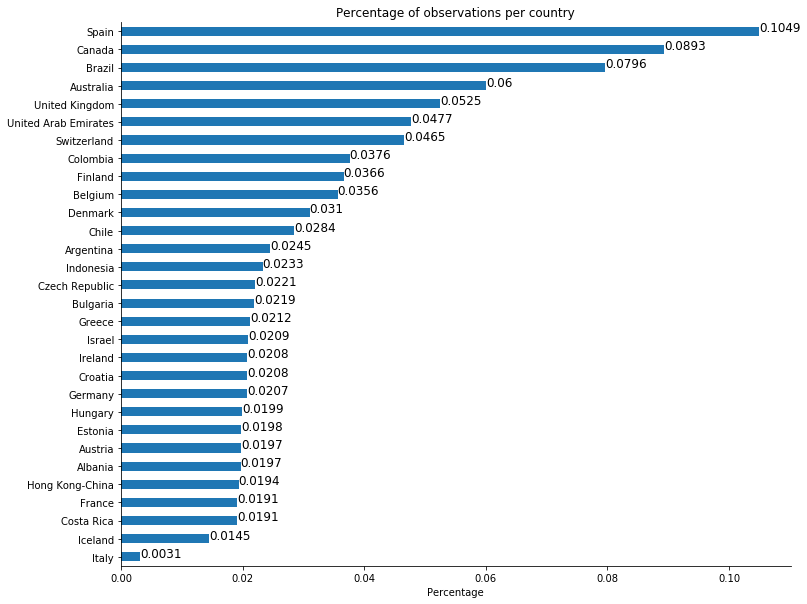

In [39]:
cnt_counts = pisa2012['CNT'].value_counts(normalize=True, ascending=True)
cnt_counts.plot(kind='barh', figsize=(12,10), color='tab:blue',
                title='Percentage of observations per country');
annotate_barplot(cnt_counts, position=False)

Italy is the country with the lowest percentage of data in the study and the the highest is Spain. 

### OECD

We explore here the distribution of countries belonging to OECD in the study.

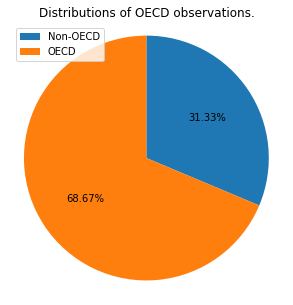

In [40]:
oecd_counts = pisa2012['OECD'].value_counts(ascending=True)
oecd_counts.plot(kind='pie',
                 startangle=90,
                 autopct='%.2f%%', 
                 figsize=(8,5),
                 counterclock=False,
                 title='Distributions of OECD observations.', 
                 labels=["", ""]);

plt.legend(oecd_counts.index.tolist(),  loc="best");
plt.ylabel("");
plt.axis('square');

Approximately 68.67% percent of countries are members of the OECD and 31.33 are Non-OECD.

### Gender

We explore here how the population of the study is distributed per gender.

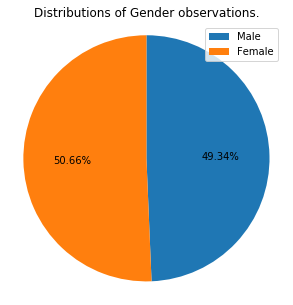

In [41]:
st04q01_counts = pisa2012['ST04Q01'].value_counts(ascending=True)
st04q01_counts.plot(kind='pie',
                 startangle=90,
                 autopct='%.2f%%', 
                 figsize=(8,5),
                 counterclock=False,
                 title='Distributions of Gender observations.', 
                 labels=["", ""]);

plt.legend(st04q01_counts.index.tolist(),  loc="best");
plt.ylabel("");
plt.axis('square');

The data is equally distributed in terms of Gender with 50.66% of observations that are Male and 49.34% are Female.

### Math Score

We explore here the distribution of students performance in the subject Math.

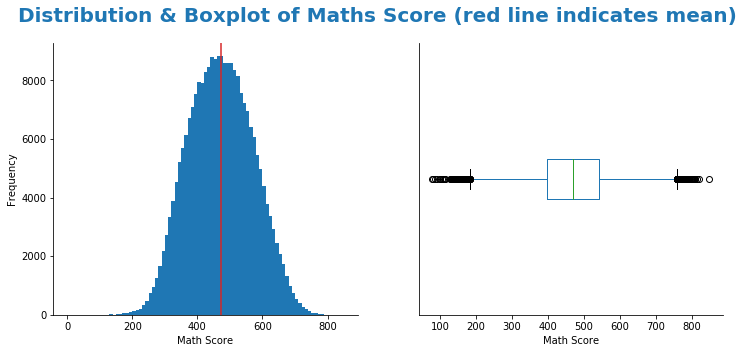

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,5))
fig.suptitle(t='Distribution & Boxplot of Maths Score (red line indicates mean)',
             fontweight='bold', fontsize=20, color="tab:blue")
binsize = 10
pv1math= pisa2012['Math']
bins = np.arange(0, pv1math.max()+binsize, binsize)
axs[0].axvline(pv1math.mean(), color='tab:red');
pv1math.plot(kind='hist', 
             bins=bins,
             ax= axs[0]
            );
axs[0].set_xlabel('Math Score');

pv1math.plot(kind='box',
             vert=False,
             ax= axs[1]
            );
axs[1].set_yticks([], [])
axs[1].set_xlabel("Math Score");

The Maths score is normally distributed with a mean of 472 and standard deviation of 99.

The Maths score present a lot of outliers. 

### Reading Score

We explore the distribution of students reading score.

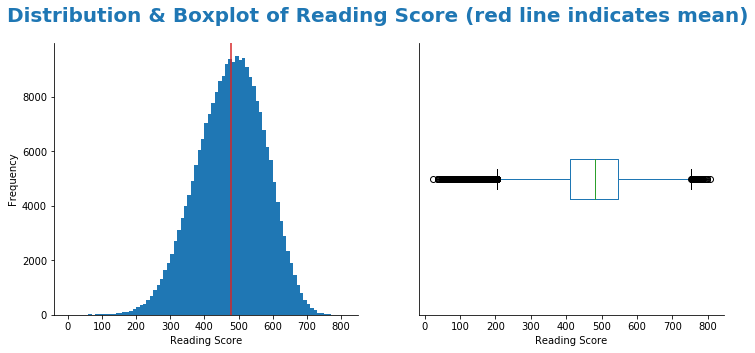

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,5))
fig.suptitle(t='Distribution & Boxplot of Reading Score (red line indicates mean)',
             fontweight='bold', fontsize=20, color="tab:blue")

binsize = 10
pv1read= pisa2012['Reading']
bins = np.arange(0, pv1read.max()+binsize, binsize)

pv1read.plot(kind='hist', 
             bins=bins,
             ax=axs[0]
            );
axs[0].set_xlabel('Reading Score');
axs[0].axvline(pv1read.mean(), color='tab:red');

pv1read.plot(kind='box', 
             vert=False,
             ax=axs[1]
            );
axs[1].set_yticks([], [])
axs[1].set_xlabel("Reading Score");

The Reading scorre is normally distributed with a mean of 477 and a standard deviation of 99.

The reading score present a lot of outliers.

### Science Score

We explore the distribution of students performance in the subject Science.

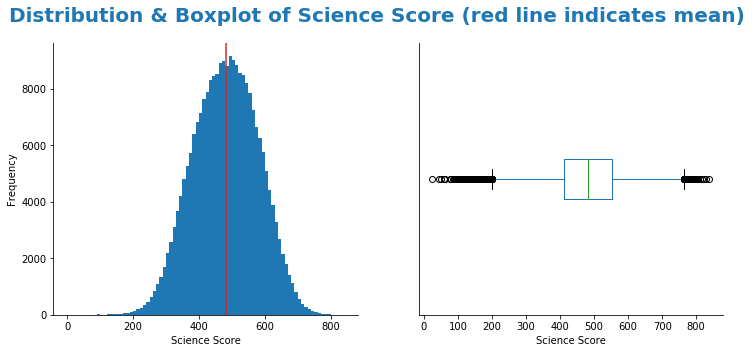

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,5))
fig.suptitle(t='Distribution & Boxplot of Science Score (red line indicates mean)',
             fontweight='bold', fontsize=20, color="tab:blue")

binsize = 10
pv1scie= pisa2012['Science']
bins = np.arange(0, pv1scie.max()+binsize, binsize)

pv1scie.plot(kind='hist', 
             bins=bins,
             ax= axs[0]
            );
axs[0].set_xlabel('Science Score');
axs[0].axvline(pv1scie.mean(), color='tab:red');

pv1scie.plot(kind='box', 
             vert=False,
             ax = axs[1]
            );
axs[1].set_xlabel("Science Score");
axs[1].set_yticks([],[]);

The science score is normally distributed with a mean of 482 and a standard deviation of 98.

The science socre present a lot of outliers.

### Relative grade

Below, we explore the distribution of the student Grade compared to modal grade in country. 

From the definition of the column `GRADE` the value are in the range `[-grade,+grade]` and `0` being the grade that are the modal grade of the country.

In [45]:
pisa2012['GRADE'].value_counts(normalize=True)

 0.0    0.681078
-1.0    0.172750
 1.0    0.092272
-2.0    0.039155
-3.0    0.010998
 2.0    0.003748
Name: GRADE, dtype: float64

In [46]:
pisa2012['GRADE'].astype(str).unique()

array(['0.0', '-1.0', '-2.0', '1.0', '-3.0', '2.0', 'nan'], dtype=object)

In [47]:
pisa2012['GRADE'] = pisa2012['GRADE'].astype(str)

In [48]:
grade = ['-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0']
transform_categorical_column_to_be_ordered(pisa2012, grade, ['GRADE'])

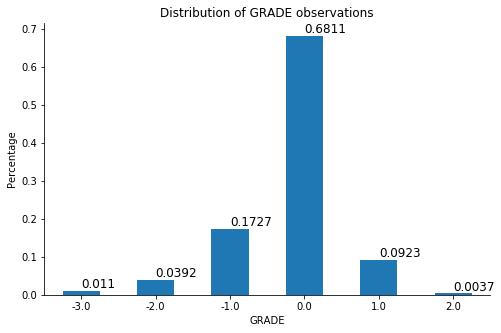

In [49]:
grade_counts = pisa2012['GRADE'].value_counts(normalize=True).sort_index()
grade_counts.plot(kind='bar', figsize=(8,5), title='Distribution of GRADE observations',  color="tab:blue", rot=0);
plt.xlabel("GRADE");
annotate_barplot(grade_counts)

From the graph we could see that a lot of students are at the modal grade of the country `(value of 0)` and very few are far from the grade `(value less or great than 0)`. 

### Immigration background

We explore here the distribution of immigrants status and Country of Birth International for the students, father and mother.

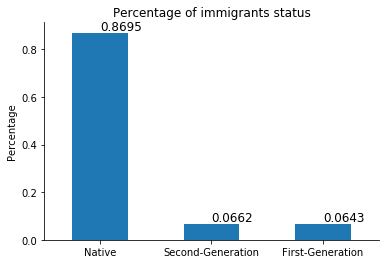

In [50]:
immig_counts = pisa2012['IMMIG'].value_counts(normalize=True, ascending=False)
immig_counts.plot(kind='bar', color='tab:blue', rot=0, title='Percentage of immigrants status');
annotate_barplot(immig_counts)

From the visualization we could tell that majority of students who took the assessments were Native and approximately 6.7% were from second and first generation

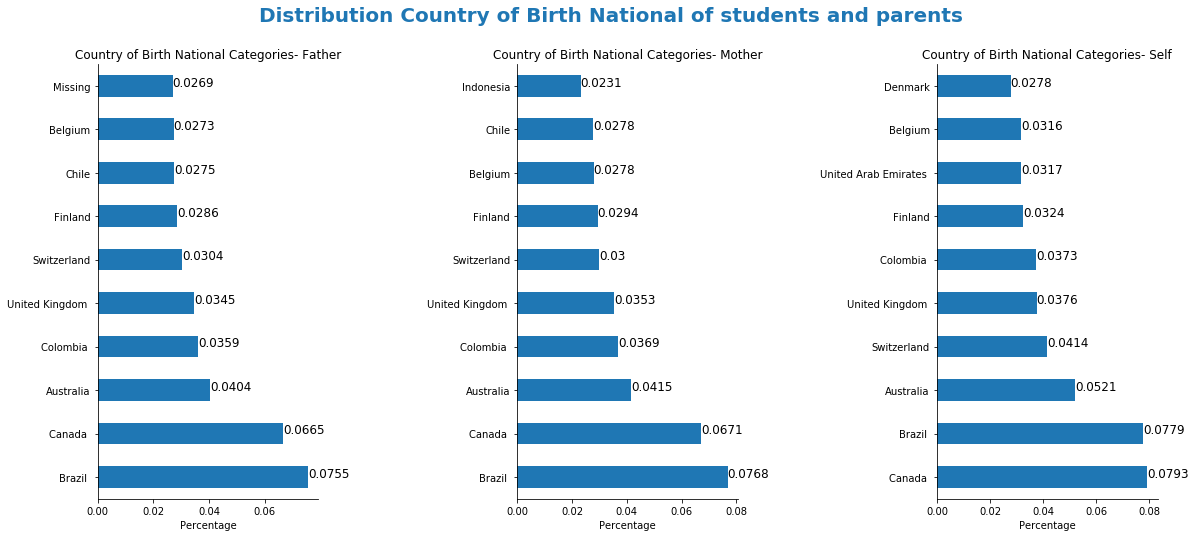

In [51]:
# Visualizing top 10 countries of country of birth national of students and their parents

fig = plt.figure(figsize=(19,8))

fig.add_subplot(131)
cobnf_counts = pisa2012['COBN_F'].value_counts(normalize=True, ascending=False)[:10]
cobnf_counts.plot(kind='barh', color='tab:blue', rot=0, title='Country of Birth National Categories- Father');
annotate_barplot(cobnf_counts, position=False)

fig.add_subplot(132)
cobnm_counts = pisa2012['COBN_M'].value_counts(normalize=True, ascending=False)[:10]
cobnm_counts.plot(kind='barh', color='tab:blue', rot=0, title='Country of Birth National Categories- Mother');
annotate_barplot(cobnm_counts, position=False)

fig.add_subplot(133)
cobns_counts = pisa2012['COBN_S'].value_counts(normalize=True, ascending=False)[:10]
cobns_counts.plot(kind='barh', color='tab:blue', rot=0, title='Country of Birth National Categories- Self');
annotate_barplot(cobns_counts, position=False)
plt.subplots_adjust(top=.88, hspace=.2, wspace=.9);
fig.suptitle(t="Distribution Country of Birth National of students and parents",
             fontsize=20, fontweight="bold", color="tab:blue");

In [52]:
## Full visualization
# cobnf_counts = pisa2012['COBN_F'].value_counts(normalize=True, ascending=False)
# cobnf_counts.plot(kind='barh', color='tab:blue', rot=0, title='Country of Birth National Categories- Father', 
#                     figsize=(39,31));
# annotate_barplot(cobnf_counts, position=False)

## Full visualization
# cobnm_counts = pisa2012['COBN_M'].value_counts(normalize=True, ascending=False)
# cobnm_counts.plot(kind='barh', color='tab:blue', rot=0, title='Country of Birth National Categories- Mother',
#                     figsize=(39,31));
# annotate_barplot(cobnm_counts, position=False)

## Full visualization
# cobns_counts = pisa2012['COBN_S'].value_counts(normalize=True, ascending=False)
# cobns_counts.plot(kind='barh', color='tab:blue', rot=0, title='Country of Birth National Categories- Self',
#                     figsize=(39,31));
# annotate_barplot(cobns_counts, position=False)

From the visualization above we could notice that the top 2 countries were the native students parents and themselves originates from are Canada, Brazil. The least country were the native students orignate from is Bangladesh.

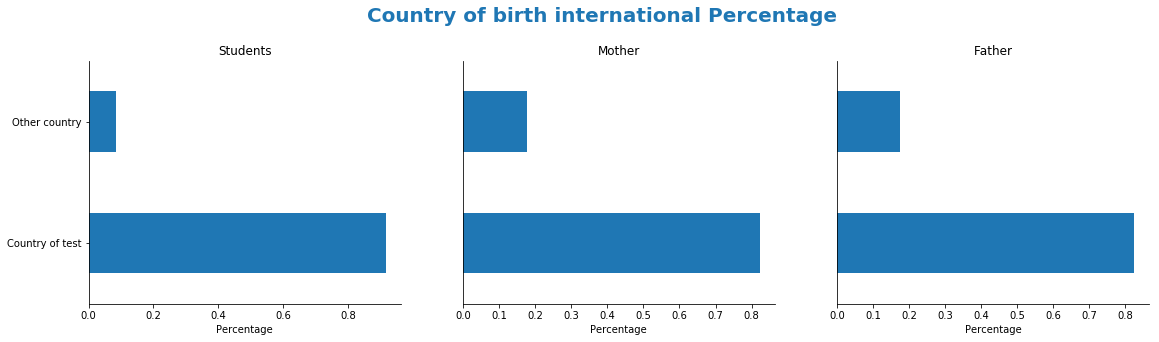

In [53]:
col = ['ST20Q01', 'ST20Q02', 'ST20Q03']
titles = ["Students", "Mother", "Father"]
axes = summary_barplot_items(pisa2012, col, "Country of birth international Percentage", titles, 
                             nr=1, nc=3,figh=19, figw=5)
for i in [1,2]:
    axes[i].set_yticks([],[]);

Exploring further the background of the students we observe from the visualization above that the majority of native students and parents originates from the country of the test and less than approximately 13% comes from other country.

### Family structure

We explore here the distribution of family structure in the dataset. 

From the definition of the column `FAMSTRUC` it is a categorical column which indicates the number of parents living with the student. 

In [54]:
pisa2012['FAMSTRUC'].value_counts()

2.0    175417
1.0     30470
3.0      4915
Name: FAMSTRUC, dtype: int64

In [55]:
# convert to the colum to string
pisa2012['FAMSTRUC'] = pisa2012['FAMSTRUC'].astype(str)

In [56]:
famstruc_cat = ['1.0', '2.0', '3.0']
transform_categorical_column_to_be_ordered(pisa2012, famstruc_cat, ['FAMSTRUC'])

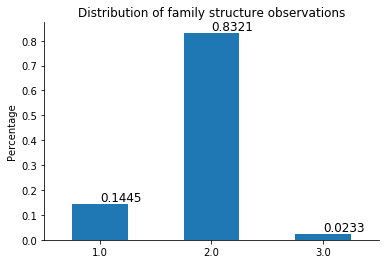

In [57]:
famstruc_counts = pisa2012['FAMSTRUC'].value_counts(normalize=True).sort_index()
famstruc_counts.plot(kind='bar', color="tab:blue", rot=0, title="Distribution of family structure observations");
annotate_barplot(famstruc_counts)

The above visualization tells us that the majority of students are with 2 family members and the minority with 3.

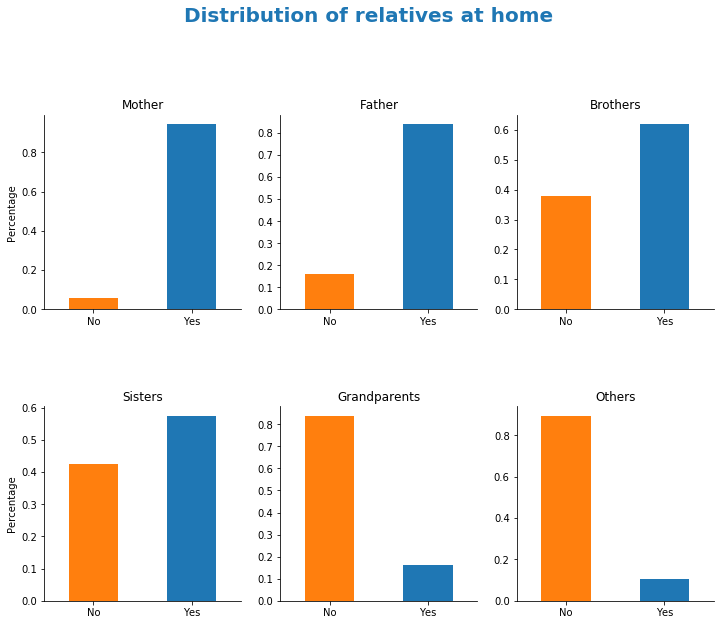

In [58]:
col = ['ST11Q01', 'ST11Q02', 'ST11Q03', 'ST11Q04', 'ST11Q05', 'ST11Q06']
titles = ["Mother", "Father", "Brothers", "Sisters", "Grandparents", "Others"]
axes = summary_barplot_items(pisa2012, col, "Distribution of relatives at home", titles, 
                             vert=False, color=["tab:orange", "tab:blue"],
                             nr=2, nc=3,figh=12, figw=10, fig_a_hspace=.5)
for i in [1,2,4,5]:
    axes[i].set_ylabel("");

We clearly see here that Mother and Father are the parents that are majorly at home while Grandparents and Others are not so often in the lives of the students.

### Highest occupational status of parents

We explore here the distribution of the highest occupational status of parents.

Before exploring we adjust the categories of schooling and job so it contains ordered categories.

Note that we suppose `nan` here are observations that were not specified during the study.

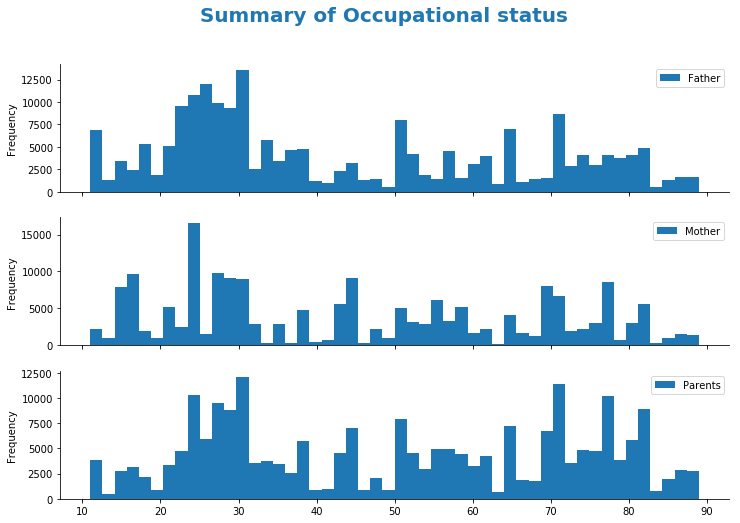

In [59]:
axes = pisa2012[['BFMJ2', 'BMMJ1', 'HISEI']].plot(kind='hist', sharex=True, sharey=False, 
                                                  bins=50, 
                                                  subplots=True, 
                                                  color="tab:blue",
                                                  figsize=(12,8), 
                                                  legend=True)

axes[0].legend(["Father"])
axes[1].legend(["Mother"])
axes[2].legend(["Parents"]);
plt.suptitle(t="Summary of Occupational status", fontsize = 20, fontweight='bold', color = 'tab:blue');

We could see that the highest occupation of the Father, Mother and Parents varies a lot. And the highest occupations score (approximately 90) counts less than 2500 observations with the category of mother accounting with the least observation. On the other side the score 30 has recorded the highest population across all categories.  

### Educational level of parents

According to the definitions of the education level of parents columns `FISCED`, `MISCED`, `HISCED` the data could be cateogrised as follow : 

- (0) None, 
- (1) ISCED 1 (primary education), 
- (2) ISCED 2 (lower secondary), 
- (3) ISCED Level 3B or 3C (vocational/pre-vocational upper secondary),
- (4) ISCED 3A (general upper secondary) and/or ISCED 4 (non-tertiary post-secondary), 
- (5) ISCED 5B (vocational tertiary)
- (6) ISCED 5A, 6 (theoretically oriented tertiary and post-graduate).

In [60]:
pisa2012['FISCED'].unique()

array(['ISCED 3A, ISCED 4', 'ISCED 5A, 6', 'ISCED 2', 'None', 'ISCED 5B',
       'ISCED 3B, C', 'ISCED 1', nan], dtype=object)

In [61]:
educ_level_cat = ['None','ISCED 1', 'ISCED 2', 'ISCED 3B, C',  'ISCED 3A, ISCED 4',  'ISCED 5B', 'ISCED 5A, 6']
transform_categorical_column_to_be_ordered(pisa2012, educ_level_cat, ['FISCED', 'MISCED', 'HISCED'])

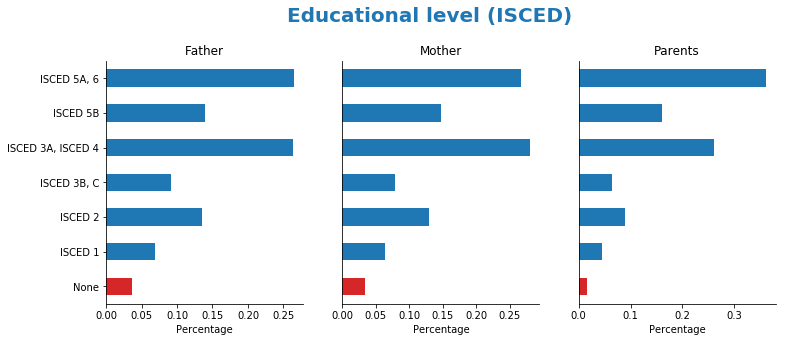

In [62]:
col = ['FISCED', 'MISCED', 'HISCED']
titles = ["Father", "Mother", "Parents"]
axes = summary_barplot_items(pisa2012, col, "Educational level (ISCED)", titles, 
                             nr=1, nc=3,figh=12, figw=5, color=["tab:red", "tab:blue", "tab:blue", 
                                                                "tab:blue", "tab:blue", "tab:blue", "tab:blue"])
for i in [1,2]:
    axes[i].set_yticks([],[]);

From the visualization less than 5% of parent have none edcuation level and majority have a theoretically oriented tertiary and post-graduate education level. 

In [63]:
schooling_order_mother = ['She did not complete <ISCED level 1> ',
                          '<ISCED level 1> ','<ISCED level 2> ','<ISCED level 3A> ','<ISCED level 3B, 3C> ']
transform_categorical_column_to_be_ordered(pisa2012, schooling_order_mother, ['ST13Q01'])

In [64]:
schooling_order_father = ['He did not complete <ISCED level 1> ',
                          '<ISCED level 1> ','<ISCED level 2> ','<ISCED level 3A> ','<ISCED level 3B, 3C> ']
transform_categorical_column_to_be_ordered(pisa2012, schooling_order_father, ['ST17Q01'])

In [65]:
pisa2012['ST15Q01'].unique().tolist()

['Other (e.g. home duties, retired) ',
 'Working full-time <for pay> ',
 'Working part-time <for pay>',
 'Not working, but looking for a job ',
 nan]

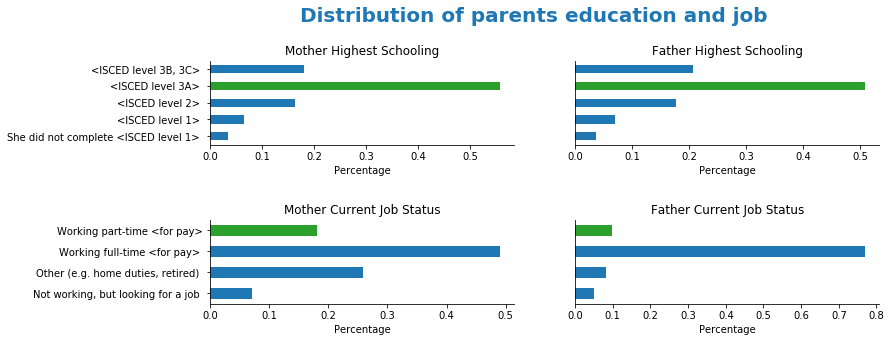

In [66]:
col = ['ST13Q01', 'ST17Q01', 'ST15Q01', 'ST19Q01']
titles = ["Mother Highest Schooling", "Father Highest Schooling", "Mother Current Job Status", "Father Current Job Status"]
axes = summary_barplot_items(pisa2012, col, "Distribution of parents education and job", titles, 
                             nr=2, nc=2,figh=12, figw=5, color=["tab:blue", "tab:blue", "tab:blue", "tab:green", "tab:blue"])
for i in [1,3]:
    axes[i].set_yticks([],[]);

From the above visualization, most of the students (more than 50%) have parents with general upper secondary highest schooling and a working full-time job status.

### Family wealth

Using the definition of variables provided in the [source](https://www.oecd.org/pisa/pisaproducts/PISA%202012%20Technical%20Report_Chapter%2016.pdf), we explore family wealth in terms of 
- 1) family wealth possessions (WEALTH), 
- 2) cultural possessions (CULTPOS),
- 3) home educational resources (HEDRES), 
- 4) home possessions (HOMEPOS)

where the summary of the following items account for the home possessions.
- ST26Q01	Possessions - desk
- ST26Q02	Possessions - own room
- ST26Q03	Possessions - study place
- ST26Q04	Possessions - computer
- ST26Q05	Possessions - software
- ST26Q06	Possessions - Internet
- ST26Q07	Possessions - literature
- ST26Q08	Possessions - poetry
- ST26Q09	Possessions - art
- ST26Q10	Possessions - textbooks
- ST26Q11	Possessions - technical reference books
- ST26Q12	Possessions - dictionary
- ST26Q13	Possessions - dishwasher
- ST26Q14	Possessions - DVD
---
- ST27Q01	How many - cellular phones
- ST27Q02	How many - televisions
- ST27Q03	How many - computers
- ST27Q04	How many - cars
- ST27Q05	How many - rooms bath or shower
- ST28Q01	How many books at home


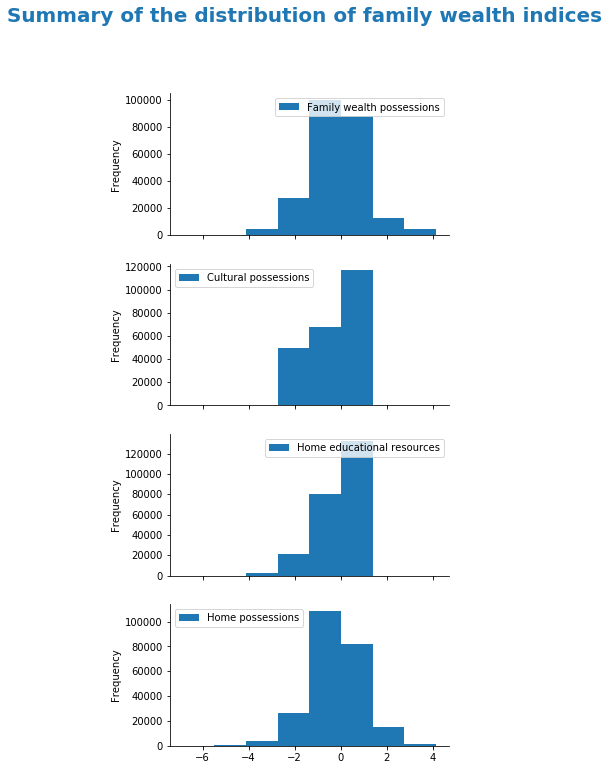

In [67]:
axs = pisa2012[['WEALTH', 'CULTPOS', 'HEDRES', 'HOMEPOS']].plot(kind='hist', sharex=True, sharey=False,
                                                                bins=8,
                                                                subplots=True, 
                                                                figsize=(5,12),
                                                                color="tab:blue",
                                                                legend=False);
axs[0].legend(["Family wealth possessions"])
axs[1].legend(["Cultural possessions"])
axs[2].legend(["Home educational resources"])
axs[3].legend(["Home possessions"]);
plt.suptitle(t="Summary of the distribution of family wealth indices", 
             fontsize = 20, fontweight='bold', color = 'tab:blue');

We could observe that the family wealth and home possessions indices seems to be normally distributed while the home educational resources and cultural possessions are left-skewed.

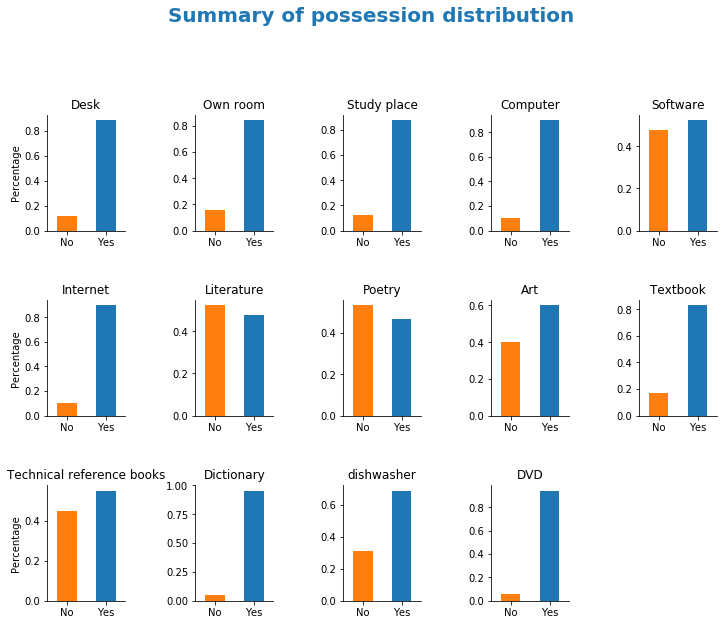

In [68]:
col = ['ST26Q01', 'ST26Q02', 'ST26Q03', 'ST26Q04', 'ST26Q05', 'ST26Q06', 'ST26Q07', 
       'ST26Q08', 'ST26Q09', 'ST26Q10', 'ST26Q11', 'ST26Q12', 'ST26Q13', 'ST26Q14']

titles = ["Desk", "Own room", "Study place", "Computer", "Software", "Internet", "Literature",
          "Poetry", 'Art', "Textbook", "Technical reference books", "Dictionary", "dishwasher", "DVD"]

axes = summary_barplot_items(pisa2012, col, "Summary of possession distribution", titles, 
                             nr=3, nc=5,figh=12, figw=10, color=["tab:orange", "tab:blue"], 
                             vert=False, fig_a_hspace=.6, fig_a_wspace=.9, fig_a_top=.8)
for i in [1,2,3,4,6,7,8,9,11,12,13]:
    axes[i].set_ylabel("");
plt.delaxes(axes[-1]);

From the summary of possession distribution, parents are clearly undecided in posessing more or less Literature, poetry, art, technical reference book, software at home. On the other side, there is a predominance of desk, own room, study place, computer, internet, dictionary, dishwasher, DVD at home.

In [69]:
pisa2012["ST27Q01"].unique()

array(['Two', 'Three or more', 'One', nan, 'None'], dtype=object)

In [70]:
background = ['None', 'One', 'Two', 'Three or more']
transform_categorical_column_to_be_ordered(pisa2012, background, ['ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q04', 'ST27Q05'])

In [71]:
pisa2012['ST28Q01'].unique()

array(['0-10 books ', '201-500 books ', 'More than 500 books',
       '11-25 books ', '101-200 books ', '26-100 books ', nan], dtype=object)

In [72]:
num_book = ['0-10 books ', '11-25 books ', '26-100 books ', 
            '101-200 books ', '201-500 books ', 'More than 500 books']
transform_categorical_column_to_be_ordered(pisa2012, num_book, ['ST28Q01'])

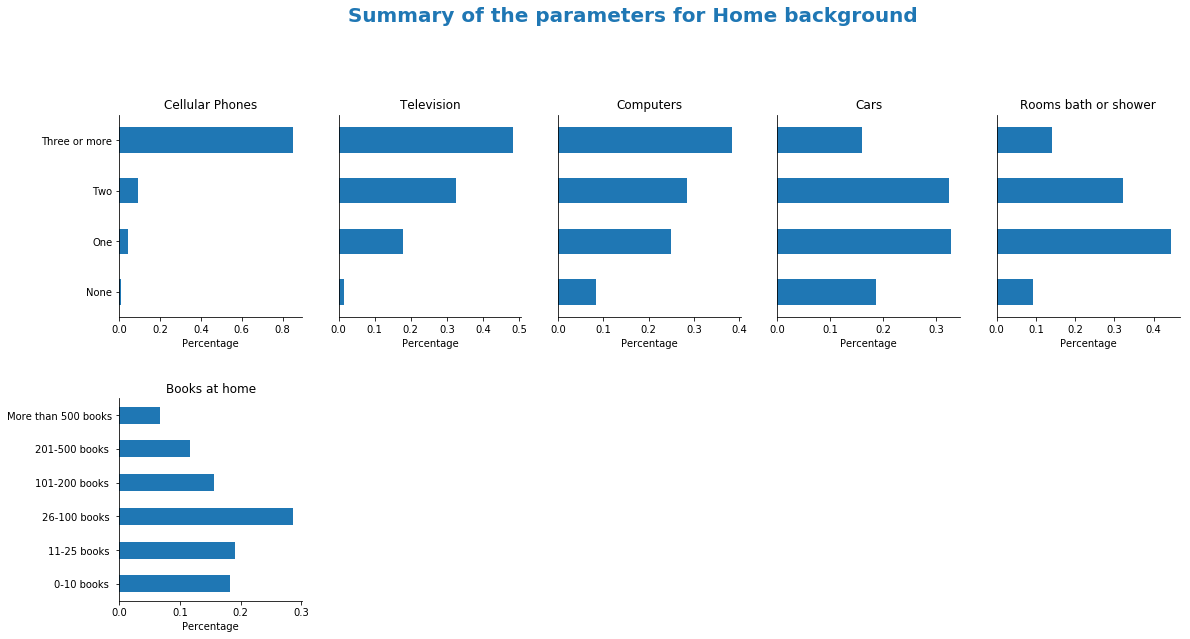

In [73]:
col = ['ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q04', 'ST27Q05', 'ST28Q01']

titles = ["Cellular Phones", "Television", "Computers", "Cars", "Rooms bath or shower", "Books at home"]

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Home background", titles, 
                             nr=2, nc=5,figh=19, figw=10, color=["tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3,4]:
    axes[i].set_yticks([],[]);
    
plt.delaxes(axes[-1]);
plt.delaxes(axes[-2]);
plt.delaxes(axes[-3]);
plt.delaxes(axes[-4]);

In terms of the home background, there are few home where we don't have cellular phones, television, computers and rooms bath or shower. And the perecentage of those equipements is below 10%. On the other side, approximately 30% of family possess 26-100 books.

### Attitudes towards mathematics


Per the definitons given in the source the attitude towards mathematics could be interpreted from the following indices:

- INSTMOT	Instrumental Motivation for Mathematics
- INTMAT	Mathematics Interest
- SUBNORM Subjective Norms in Mathematics 
- MATHEFF Mathematics Self-Efficacy 
- ANXMAT Mathematics Anxiety 
- SCMAT Mathematics Self-Concept 
- FAILMAT Attributions to Failure in Mathematics 
- MATWKETH Mathematics Work Ethic 
- MATINTFC Mathematics Intentions 
- MATBEH Mathematics Behaviour

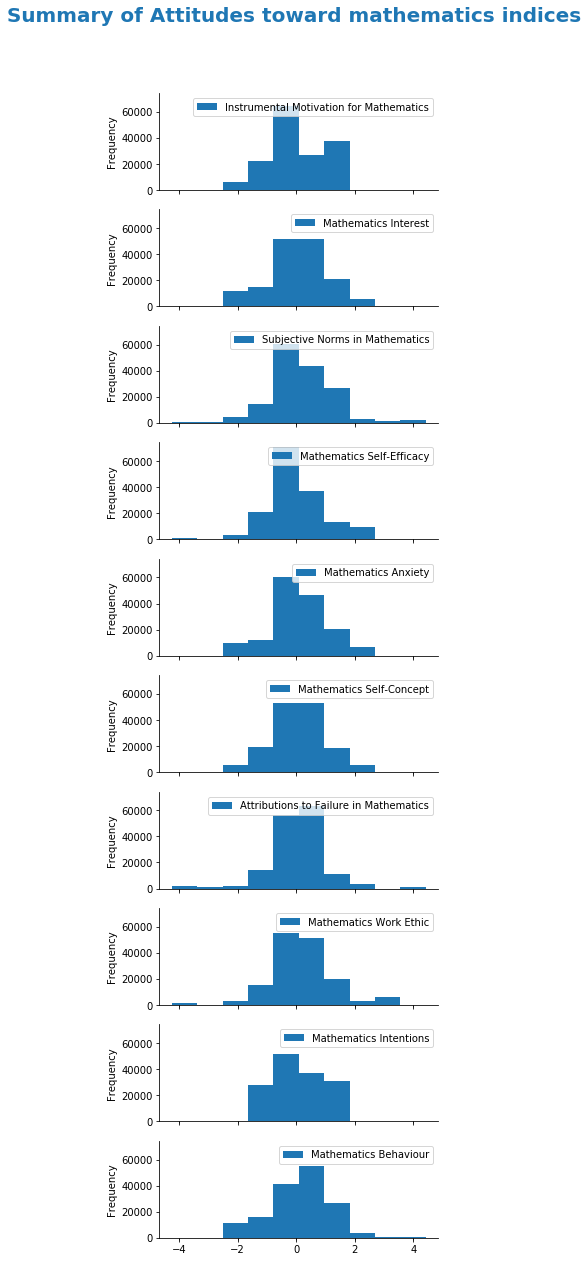

In [74]:
axs = (pisa2012[['INSTMOT','INTMAT', 'SUBNORM', 'MATHEFF', 'ANXMAT', 'SCMAT', 'FAILMAT', 'MATWKETH', 'MATINTFC', 'MATBEH']]
       .plot(kind='hist',
             bins=10,
             subplots=True, 
             figsize=(5,20), 
             color='tab:blue', 
             sharex=True, sharey=True,
             ))
;

axs[0].legend(["Instrumental Motivation for Mathematics"])
axs[1].legend(["Mathematics Interest"])
axs[2].legend(["Subjective Norms in Mathematics"])
axs[3].legend(["Mathematics Self-Efficacy"])
axs[4].legend(["Mathematics Anxiety"])
axs[5].legend(["Mathematics Self-Concept"])
axs[6].legend(["Attributions to Failure in Mathematics"])
axs[7].legend(["Mathematics Work Ethic"])
axs[8].legend(["Mathematics Intentions"])
axs[9].legend(["Mathematics Behaviour"])

plt.suptitle(t="Summary of Attitudes toward mathematics indices", fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=.92, hspace=.2);

The attitudes toward mathematics seems to be normally distributed across all indices. 

In the following cells we will dig into the list of items that consitute each index.

#### Mathematics Interest (INTMAT) items

- ST29Q01
- ST29Q03
- ST29Q04
- ST29Q06

In [75]:
pisa2012['ST29Q01'].unique()

array(['Agree', 'Disagree', nan, 'Strongly agree', 'Strongly disagree'], dtype=object)

In [76]:
agreement = ['Strongly disagree','Disagree','Agree','Strongly agree']
transform_categorical_column_to_be_ordered(pisa2012, agreement, ['ST29Q01', 'ST29Q03', 'ST29Q04', 'ST29Q06'])

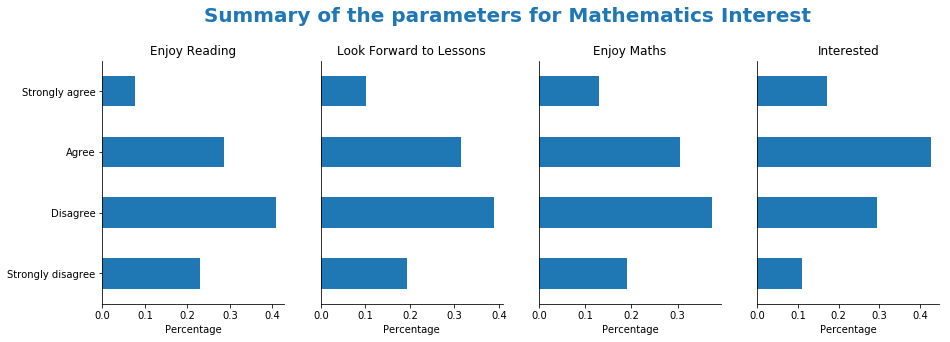

In [77]:
col = ['ST29Q01', 'ST29Q03', 'ST29Q04', 'ST29Q06']

titles = ["Enjoy Reading", "Look Forward to Lessons", "Enjoy Maths", "Interested"]

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Mathematics Interest", titles, 
                             nr=1, nc=4,figh=15, figw=5, color=["tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3]:
    axes[i].set_yticks([],[]);

Visualizing students interst in mathematics, less than 10% strongly agree to enjoy reading and math, and are interested or look forward to lessons. On the opposite, approximately 30% Disagree. The visualization doesn't really show clear information but it tends to communicate that there are more negativity than positivity about students interest for mathematics.

#### Instrumental motivation for mathematics (INSTMOT) items

- ST29Q02
- ST29Q05
- ST29Q07
- ST29Q08

In [78]:
pisa2012['ST29Q02'].unique()

array(['Strongly agree', nan, 'Disagree', 'Agree', 'Strongly disagree'], dtype=object)

In [79]:
transform_categorical_column_to_be_ordered(pisa2012, agreement, ['ST29Q02', 'ST29Q05', 'ST29Q07', 'ST29Q08'])

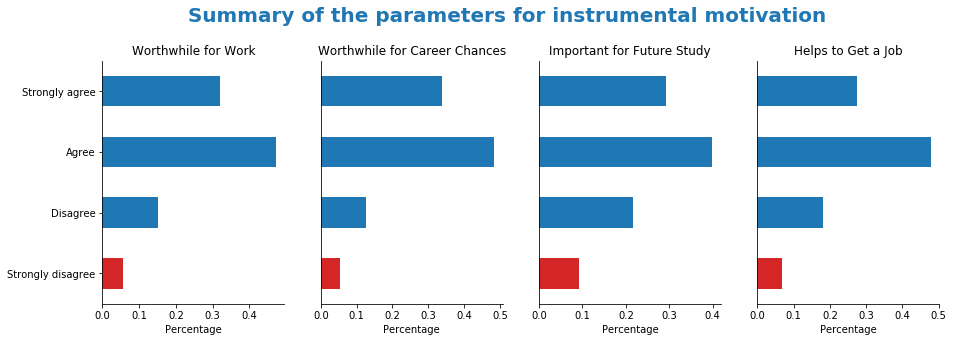

In [80]:
col = ['ST29Q02', 'ST29Q05', 'ST29Q07', 'ST29Q08']

titles = ["Worthwhile for Work", "Worthwhile for Career Chances", "Important for Future Study", "Helps to Get a Job"]

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for instrumental motivation", titles, 
                             nr=1, nc=4,figh=15, figw=5, color=["tab:red", "tab:blue", "tab:blue", "tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3]:
    axes[i].set_yticks([],[]);

We clearly see here that less than 10% of students strongly disagree that their instrumental motivation are: worthwhile for work, career chances, Important for Future Study, Helps to Get a Job. On the other hand, approximately 40% of students agree about their instrumental motivation for work, career chancees, future study and job opportunity.

#### Mathematics intentions (MATINTFC) items

- ST48Q01
- ST48Q02
- ST48Q03
- ST48Q04
- ST48Q05

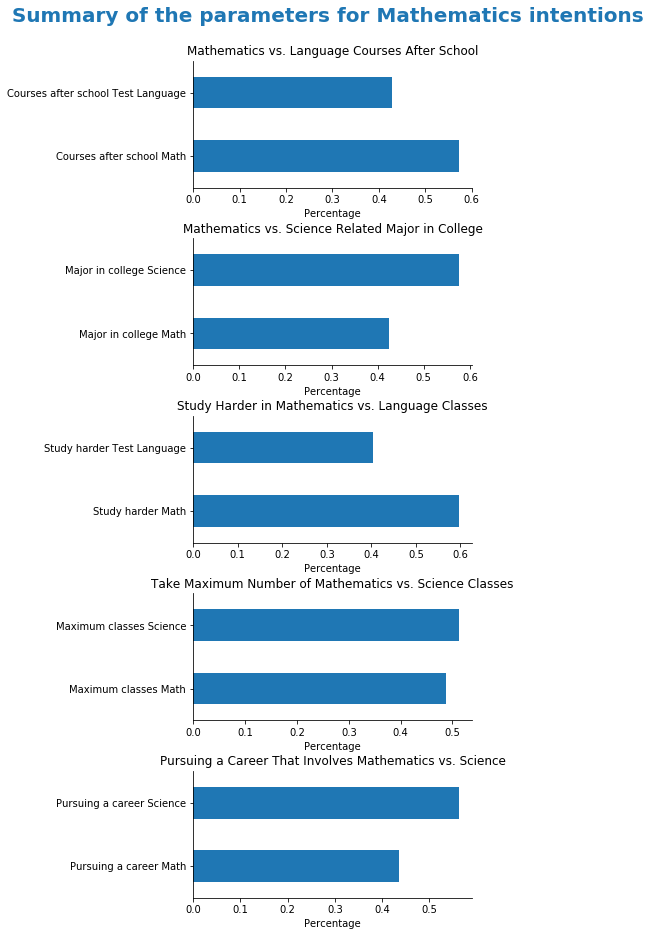

In [81]:
col = ['ST48Q01', 'ST48Q02', 'ST48Q03', 'ST48Q04', 'ST48Q05']

titles = ["Mathematics vs. Language Courses After School", "Mathematics vs. Science Related Major in College",
          "Study Harder in Mathematics vs. Language Classes", "Take Maximum Number of Mathematics vs. Science Classes",
          "Pursuing a Career That Involves Mathematics vs. Science"]

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Mathematics intentions", titles, 
                             nr=5, nc=1,figh=5, figw=15, color=["tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2, fig_a_top=.9)


From the visualization above it's not very clear what are students mathematics intentions.

#### Mathematics self-efficacy (MATHEFF) items

- ST37Q01
- ST37Q02
- ST37Q03
- ST37Q04
- ST37Q05
- ST37Q06
- ST37Q07
- ST37Q08

In [82]:
pisa2012['ST37Q01'].unique()

array(['Not at all confident', 'Confident', nan, 'Not very confident',
       'Very confident'], dtype=object)

In [83]:
pisa2012['ST37Q05'].unique()

array(['Confident', 'Very confident', nan, 'Not very confident',
       'Not at all confident'], dtype=object)

In [84]:
self_efficacy_order = ['Not at all confident', 'Not very confident','Confident',  'Very confident']
transform_categorical_column_to_be_ordered(pisa2012, 
                                           self_efficacy_order,
                                           ['ST37Q01', 'ST37Q02', 'ST37Q03', 'ST37Q04', 
                                            'ST37Q05', 'ST37Q06', 'ST37Q07','ST37Q08'])

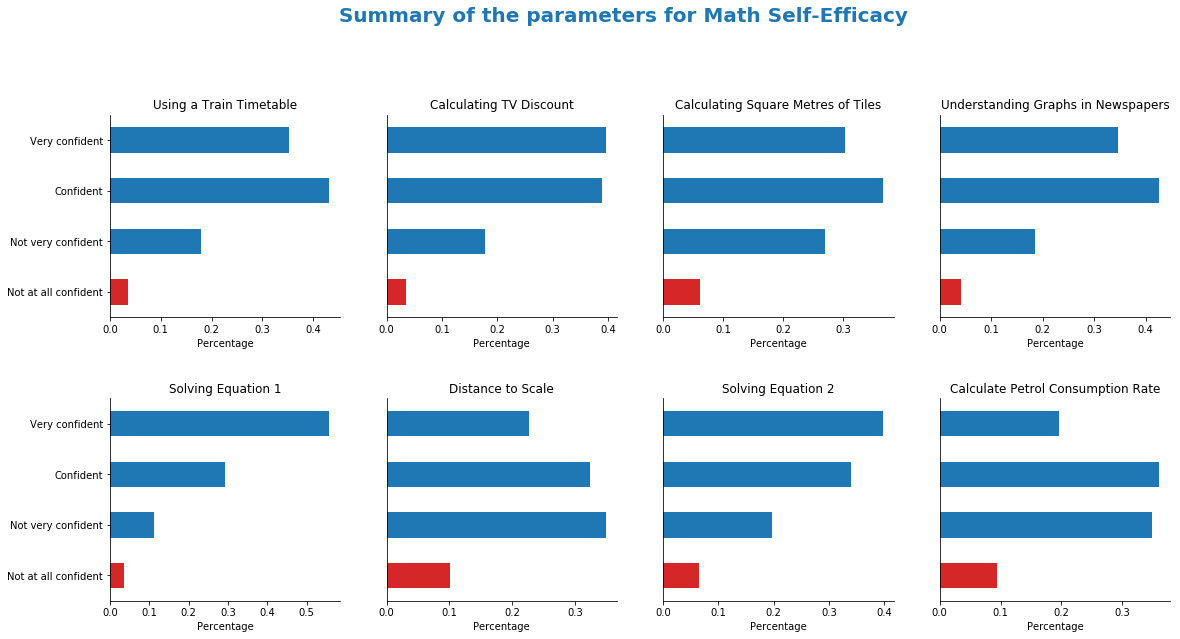

In [85]:
col = ['ST37Q01', 'ST37Q02', 'ST37Q03', 'ST37Q04', 'ST37Q05', 'ST37Q06', 'ST37Q07', 'ST37Q08']

titles = ["Using a Train Timetable", "Calculating TV Discount", "Calculating Square Metres of Tiles",
          "Understanding Graphs in Newspapers", 'Solving Equation 1', "Distance to Scale",
          "Solving Equation 2", "Calculate Petrol Consumption Rate"]

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Math Self-Efficacy", titles, 
                             nr=2, nc=4,figh=19, figw=10, color=["tab:red","tab:blue", "tab:blue", "tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3,5,6,7]:
    axes[i].set_yticks([],[]);

For all parameters investigated, less 10% of students are not at all confident about Math self-efficacy. Even though the parameters like `Distance to Scale`, and `Calculate Petrol consumption rate` show a high perecent of Not-very confident.

#### Mathematics anxiety (ANXMAT) items

- ST42Q01
- ST42Q03
- ST42Q05
- ST42Q08
- ST42Q10

In [86]:
pisa2012['ST42Q01'].unique()
math_anxiety_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
transform_categorical_column_to_be_ordered(pisa2012, 
                                           math_anxiety_order,
                                           ['ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10'])

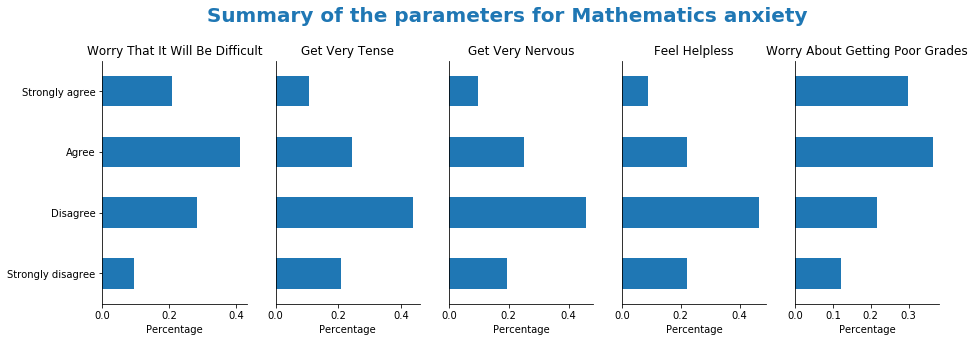

In [87]:
col = ['ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10']

titles = ["Worry That It Will Be Difficult", "Get Very Tense", "Get Very Nervous",
          "Feel Helpless", 'Worry About Getting Poor Grades',]

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Mathematics anxiety", titles, 
                             nr=1, nc=5,figh=15, figw=5, color=["tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3,4]:
    axes[i].set_yticks([],[]);

For the parameters Worry that it will be difficuult, worry about getting poor grades students answered Agree with the highest percentage. For the parameters like get very tense, get very nervous, feel helpless students answered Disagree with the nighest percentage. Overall we can't tell anything about students mathematics anxiety.

#### Mathematics self-concept (SCMAT) items

- ST42Q02
- ST42Q04
- ST42Q06
- ST42Q07
- ST42Q09

In [88]:
pisa2012['ST42Q09'].unique()

array(['Disagree', nan, 'Agree', 'Strongly agree', 'Strongly disagree'], dtype=object)

In [89]:
self_concept_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
transform_categorical_column_to_be_ordered(pisa2012, self_concept_order, 
                                           ['ST42Q02', 'ST42Q04', 'ST42Q06', 'ST42Q07', 'ST42Q09'])


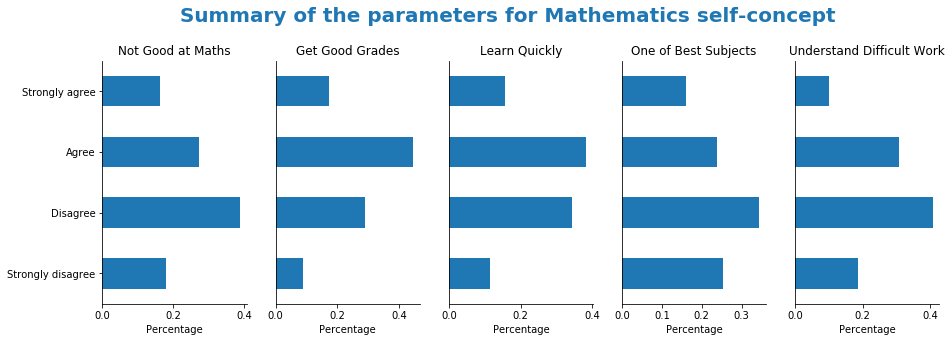

In [90]:
col = ['ST42Q02', 'ST42Q04', 'ST42Q06', 'ST42Q07', 'ST42Q09']

titles = ["Not Good at Maths", "Get Good Grades", "Learn Quickly",
          "One of Best Subjects", 'Understand Difficult Work']

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Mathematics self-concept", titles, 
                             nr=1, nc=5,figh=15, figw=5, color=["tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3,4]:
    axes[i].set_yticks([],[]);

For the mathematics self-concept parameters, students responded Agree with high percentage for parameters such as Get good grades and Learn quickly. And they responded Disagree with high percentage for Not Good at Maths, One Best Subjects and Understand difficult work. Overall, it is not clear what is their position for Mathematics self-concept.

#### Failure in mathematics (FAILMAT) items

- ST44Q01
- ST44Q03
- ST44Q04
- ST44Q05
- ST44Q07
- ST44Q08

In [91]:
pisa2012['ST44Q08'].unique()

array(['Very   Likely', 'Likely', 'Slightly likely', nan,
       'Not at all likely'], dtype=object)

In [92]:
failure_order = ['Not at all likely','Slightly likely','Likely','Very   Likely']
transform_categorical_column_to_be_ordered(pisa2012, failure_order,
                                           ['ST44Q01', 'ST44Q03', 'ST44Q04', 'ST44Q05', 'ST44Q07', 'ST44Q08'])

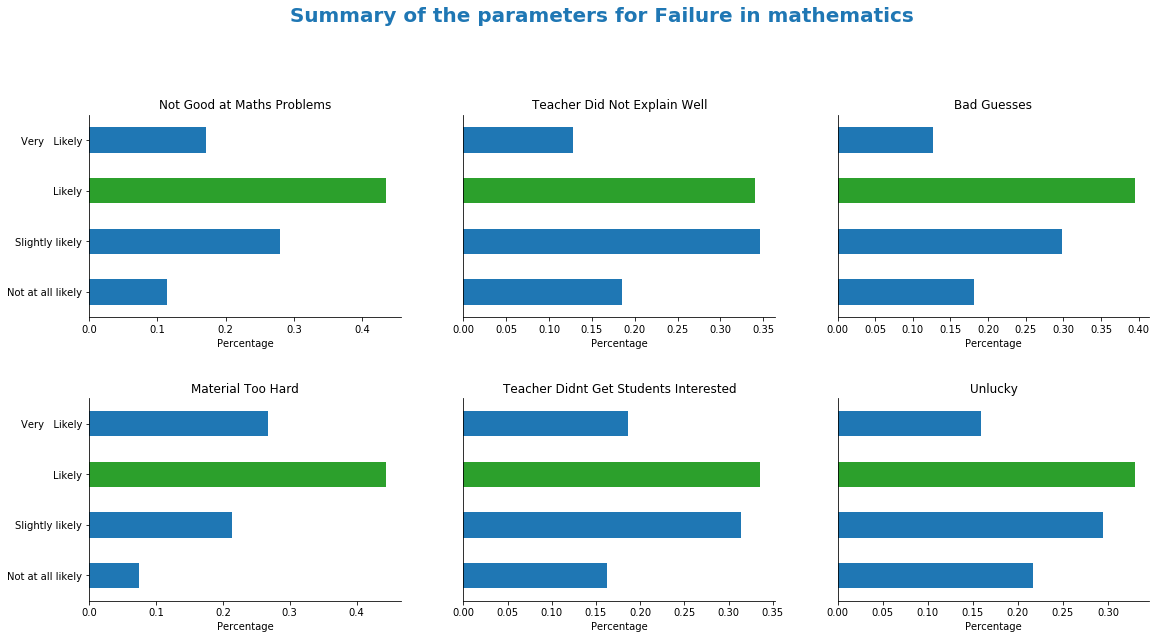

In [93]:
col = ['ST44Q01', 'ST44Q03', 'ST44Q04', 'ST44Q05', 'ST44Q07', 'ST44Q08']

titles = ["Not Good at Maths Problems", "Teacher Did Not Explain Well", "Bad Guesses",
          "Material Too Hard", 'Teacher Didnt Get Students Interested', 'Unlucky']

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Failure in mathematics", titles, 
                             nr=2, nc=3, figh=19, figw=10, color=["tab:blue", "tab:blue", "tab:green", "tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,4,5]:
    axes[i].set_yticks([],[]);

Overall, students are likely to fail in mathematics for the following parameters : Not good at maths problems, teacher did not explain well, bad guesses, material too hard, teacher didn't get students interested and unlucky.

####  Mathematics work ethic (MATWKETH) items

- ST46Q01
- ST46Q02
- ST46Q03
- ST46Q04
- ST46Q05
- ST46Q06
- ST46Q07
- ST46Q08
- ST46Q09

In [94]:
pisa2012['ST46Q09'].unique()

array(['Agree', 'Strongly agree', nan, 'Disagree', 'Strongly disagree'], dtype=object)

In [95]:
work_ethic_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
transform_categorical_column_to_be_ordered(pisa2012, work_ethic_order,
                                           ['ST46Q01', 'ST46Q02', 'ST46Q03', 'ST46Q04', 'ST46Q05',
                                            'ST46Q06', 'ST46Q07', 'ST46Q08', 'ST46Q09'])

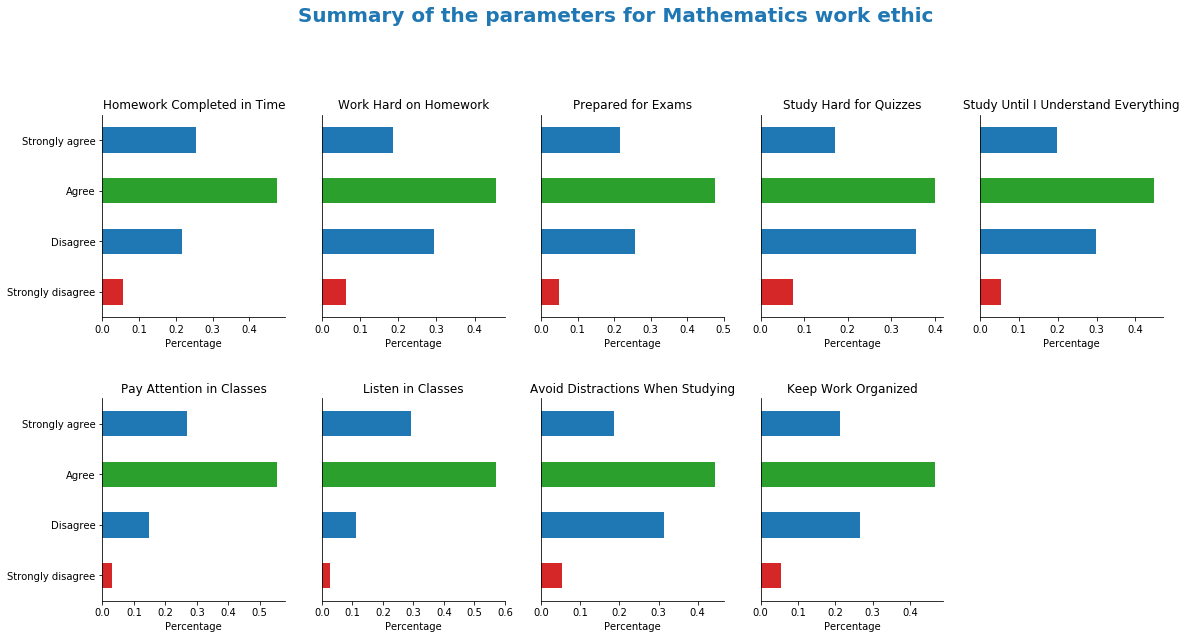

In [96]:
col = ['ST46Q01', 'ST46Q02', 'ST46Q03', 'ST46Q04', 'ST46Q05', 'ST46Q06', 'ST46Q07', 'ST46Q08', 'ST46Q09']

titles = ["Homework Completed in Time", "Work Hard on Homework", "Prepared for Exams",
          "Study Hard for Quizzes", 'Study Until I Understand Everything', "Pay Attention in Classes",
          'Listen in Classes', "Avoid Distractions When Studying", "Keep Work Organized"]

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Mathematics work ethic", titles, 
                             nr=2, nc=5, figh=19, figw=10, color=["tab:red", "tab:blue", "tab:green", "tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3,4,6,7,8,9]:
    axes[i].set_yticks([],[]);
plt.delaxes(axes[9]);

Overall, majority of students who `Agree` believes that their Mathematics work ethic are due to : Homework completed in time, work hard on homework, prepared for exams, study hard for quizzes, study until i understand everything, pay attention in classes, listen in classes, avoid distractions when studying and keep work organized. Minority of students who `Strongly disagree` thinks the same about their mathematics work ethic.

#### Mathematics behaviour (MATBEH) items

- ST49Q01
- ST49Q02
- ST49Q03
- ST49Q04
- ST49Q05
- ST49Q06
- ST49Q07
- ST49Q09

In [97]:
pisa2012['ST49Q09'].unique()

array(['Never or rarely', 'Often', nan, 'Sometimes',
       'Always or almost always'], dtype=object)

In [98]:
behavoir_order = ['Never or rarely', 'Sometimes',  'Often', 'Always or almost always']
transform_categorical_column_to_be_ordered(pisa2012, behavoir_order,
                                          ['ST49Q01', 'ST49Q02', 'ST49Q03', 'ST49Q04',
                                           'ST49Q05', 'ST49Q06', 'ST49Q07', 'ST49Q09'])

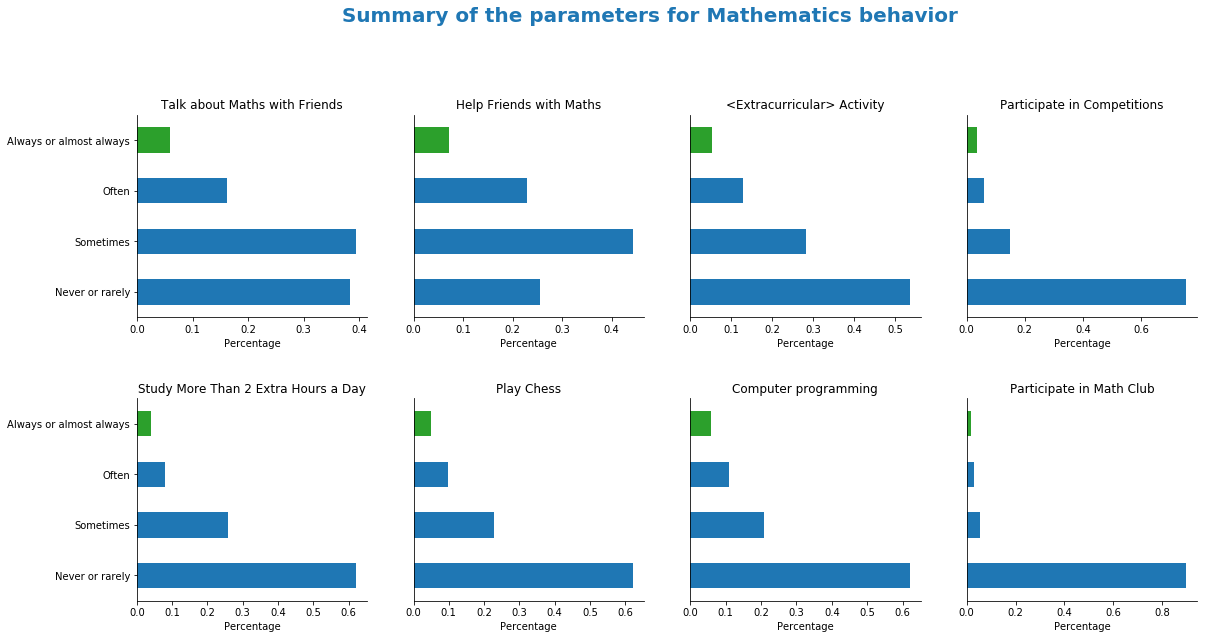

In [99]:
col = ['ST49Q01', 'ST49Q02', 'ST49Q03', 'ST49Q04', 'ST49Q05', 'ST49Q06', 'ST49Q07', 'ST49Q09']

titles = ["Talk about Maths with Friends", "Help Friends with Maths", "<Extracurricular> Activity",
          "Participate in Competitions", 'Study More Than 2 Extra Hours a Day', "Play Chess",
          'Computer programming', "Participate in Math Club"]

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Mathematics behavior", titles, 
                             nr=2, nc=4, figh=19, figw=10, color=["tab:blue","tab:blue", "tab:blue", "tab:green"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3,5,6,7]:
    axes[i].set_yticks([],[]);

Minority of students who answered `Always or almost always` thinks their mathematics behavior could be explained by:
Talk about Maths with friends, help friends with maths, extracuricular activity, participate in competitions, study more than 2 extra hours a day, play chess, computer programming.

### Opportunity to learn

According to the definition of variables related to opportunity to learn it could be decomposed as follow :
- student-perceived experiences and familiarity with mathematical tasks (EXAPPLM, EXPUREM, FAMCON, FAMCONC)  
- student perceived teaching practices (TCHBEHTD, TCHBEHFA, TCHBEHSO) 
- student-perceived teaching quality (TEACHSUP, COGACT, MTSUP, CLSMAN, DISCLIMA).

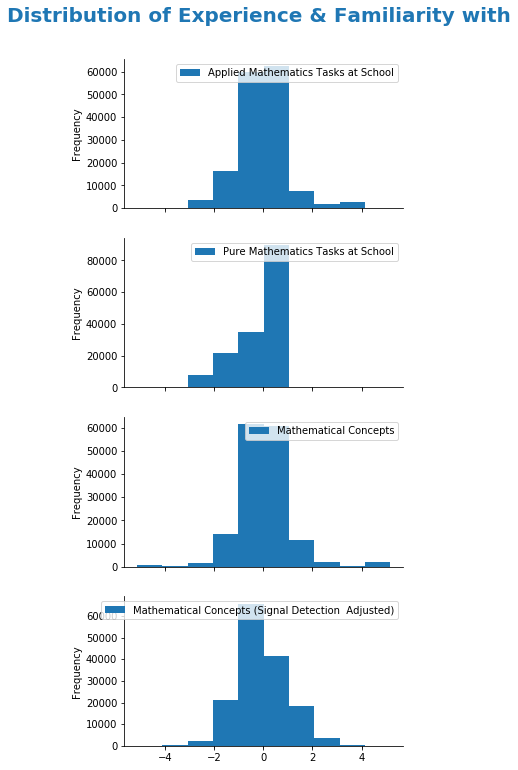

In [100]:
axs = pisa2012[['EXAPPLM', 'EXPUREM', 'FAMCON', 'FAMCONC']].plot(kind='hist',
                                                                 bins=10,
                                                                 sharex=True, sharey=False,
                                                                 legend=False,
                                                                 subplots=True, 
                                                                 color="tab:blue", 
                                                                 figsize=(5,12))

axs[0].legend(["Applied Mathematics Tasks at School"])
axs[1].legend(["Pure Mathematics Tasks at School"])
axs[2].legend(["Mathematical Concepts"])
axs[3].legend(["Mathematical Concepts (Signal Detection  Adjusted)"]);

plt.suptitle(t="Distribution of Experience & Familiarity with", fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=.92, hspace=.2);

The distribution of experience and familiarity with parameters are allnormally distributed except the parameter : exprience with pure mathematics tasks at school.

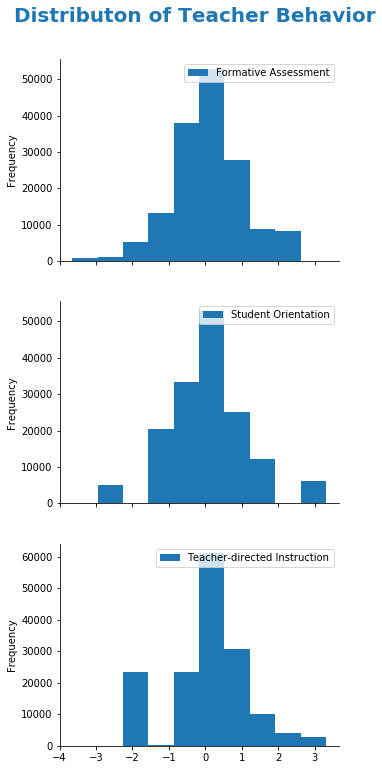

In [101]:
axs= pisa2012[['TCHBEHTD', 'TCHBEHFA', 'TCHBEHSO']].plot(kind='hist', bins=10,
                                                         subplots=True,
                                                         legend=False,
                                                         sharex=True, sharey=False,
                                                         color="tab:blue",
                                                         figsize=(5,12)
                                                        )
axs[0].legend(["Formative Assessment"])
axs[1].legend(["Student Orientation"])
axs[2].legend(["Teacher-directed Instruction"]);
plt.suptitle(t="Distributon of Teacher Behavior", fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=.92, hspace=.2);

The distribution of teacher behavior are all normally distributed.

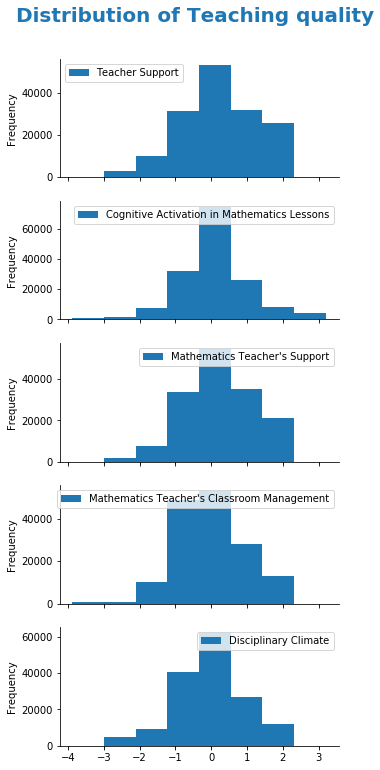

In [102]:
axs = pisa2012[['TEACHSUP', 'COGACT', 'MTSUP', 'CLSMAN', 'DISCLIMA']].plot(kind='hist',
                                                                           bins=8,legend=False,
                                                                           subplots=True,
                                                                           sharex=True, sharey=False,
                                                                           color="tab:blue",
                                                                           figsize=(5,12)
                                                                          )
axs[0].legend(["Teacher Support"])
axs[1].legend(["Cognitive Activation in Mathematics Lessons"])
axs[2].legend(["Mathematics Teacher's Support"])
axs[3].legend(["Mathematics Teacher's Classroom Management"])
axs[4].legend(["Disciplinary Climate"])

plt.suptitle(t="Distribution of Teaching quality", fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=.92, hspace=.2);

The distribution of teaching quality seems to be normally distributed.

#### Experience with applied mathematics tasks at school (EXAPPLM)

- ST61Q01
- ST61Q02
- ST61Q03
- ST61Q04
- ST61Q06
- ST61Q08

In [103]:
pisa2012['ST61Q09'].unique()

array([nan, 'Frequently', 'Sometimes', 'Rarely ', 'Never '], dtype=object)

In [104]:
experience_and_familiarity_order = ['Frequently', 'Sometimes', 'Rarely ', 'Never ']
transform_categorical_column_to_be_ordered(pisa2012, experience_and_familiarity_order,
                                          ['ST61Q01', 'ST61Q02', 'ST61Q03', 'ST61Q04', 
                                           'ST61Q05', 'ST61Q06', 'ST61Q07','ST61Q08', 'ST61Q09'])

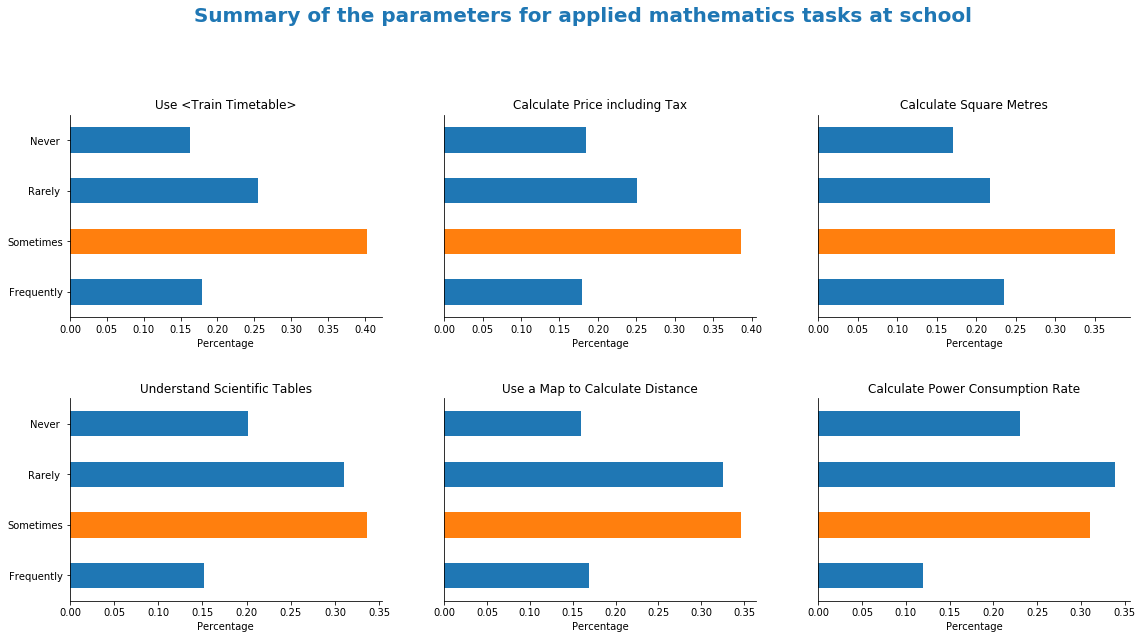

In [105]:
col = ['ST61Q01', 'ST61Q02', 'ST61Q03', 'ST61Q04', 'ST61Q06', 'ST61Q08']

titles = ["Use <Train Timetable>", "Calculate Price including Tax", "Calculate Square Metres",
          "Understand Scientific Tables", 'Use a Map to Calculate Distance', "Calculate Power Consumption Rate"]

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for applied mathematics tasks at school", titles, 
                             nr=2, nc=3, figh=19, figw=10, color=["tab:blue","tab:orange","tab:blue","tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,4,5]:
    axes[i].set_yticks([],[]);

Except the parameter Calculate power consumption rate, majority of students believe they applied mathematics tasks at school sometimes at this occasions : Use train timetable, calculate price including tax, understand scientific tables, use a map to calculate distance and calculate power consumption rate.

#### Experience with pure mathematics tasks at school (EXPUREM)

- ST61Q05
- ST61Q07
- ST61Q09

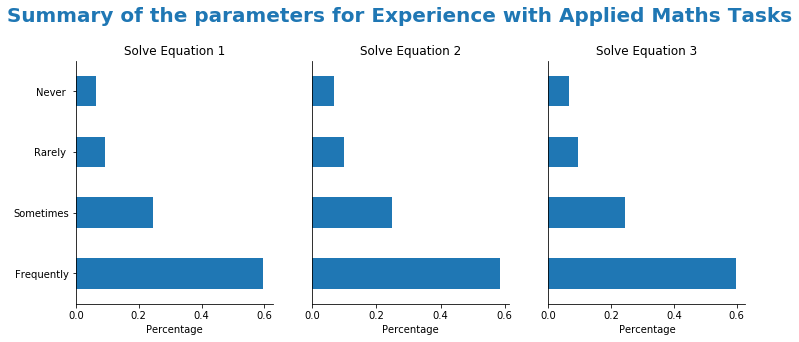

In [106]:
col = ['ST61Q05', 'ST61Q07', 'ST61Q09']

titles = ["Solve Equation 1", "Solve Equation 2", "Solve Equation 3"]

axes = summary_barplot_items(pisa2012, col, 
                             "Summary of the parameters for Experience with Applied Maths Tasks", titles, 
                             nr=1, nc=3, figh=12, figw=5, color=["tab:blue"], 
                             vert=True, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2]:
    axes[i].set_yticks([],[]);

More that 50% of students who frequently solve equation 1,2 and 3 have experience with applied maths tasks.

#### Familiarity with mathematics concepts (FAMCON) and foils used for signal detection adjustment

- ST62Q01
- ST62Q02
- ST62Q03
- ST62Q06
- ST62Q07
- ST62Q08
- ST62Q09
- ST62Q10
- ST62Q12
- ST62Q15
- ST62Q16
- ST62Q17
- ST62Q19
- ST62Q04
- ST62Q11
- ST62Q13

In [107]:
pisa2012['ST62Q01'].unique()

array([nan, 'Know it well,  understand the concept', 'Never heard of it',
       'Heard of it often', 'Heard of it a few times',
       'Heard of it once or twice'], dtype=object)

In [108]:
Familiarity_with_math_order = ['Never heard of it', 'Heard of it once or twice', 'Heard of it a few times',
                               'Heard of it often', 'Know it well,  understand the concept']
familiarity_cols = ['ST62Q01', 'ST62Q02', 'ST62Q03', 'ST62Q06', 'ST62Q07', 'ST62Q08', 'ST62Q09', 'ST62Q10', 
                    'ST62Q12', 'ST62Q15', 'ST62Q16', 'ST62Q17', 'ST62Q19', 'ST62Q04', 'ST62Q11', 'ST62Q13']
transform_categorical_column_to_be_ordered(pisa2012, Familiarity_with_math_order, familiarity_cols)

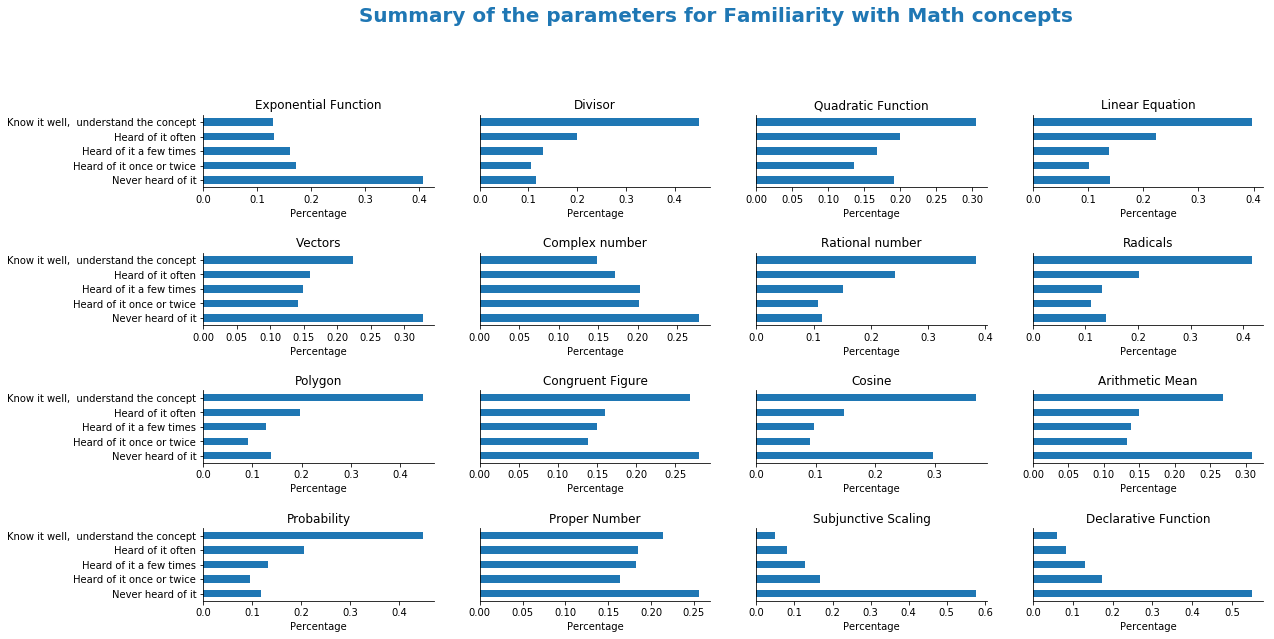

In [109]:
col = familiarity_cols

titles = ["Exponential Function", "Divisor", "Quadratic Function", "Linear Equation", "Vectors", "Complex number",
          "Rational number", 'Radicals', "Polygon", "Congruent Figure", "Cosine", "Arithmetic Mean",
          "Probability", "Proper Number", "Subjunctive Scaling", "Declarative Function"]

axes = summary_barplot_items(pisa2012, col, 
                             "Summary of the parameters for Familiarity with Math concepts", titles, 
                             nr=4, nc=4, figh=19, figw=10, color=["tab:blue"], 
                             vert=True, fig_a_hspace=.9, fig_a_wspace=.2)

for i in [1,2,3,5,6,7,9,10,11,13,14,15]:
    axes[i].set_yticks([],[]);

From the Familiarity with Math concepts., we could see that students answered know it well, understand the concept in high percentage for the subject like : Divisor, quadractic function , linear equation, rational number, radicals, polygon, cosine, probability.

#### Teacher behaviour - teacher directed instruction (TCHBEHTD)

- ST79Q01
- ST79Q02
- ST79Q06
- ST79Q08
- ST79Q15

In [110]:
pisa2012['ST79Q11'].unique()

array(['Most Lessons', nan, 'Never or Hardly Ever', 'Every Lesson',
       'Some Lessons'], dtype=object)

In [111]:
teacher_behaviour_order = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
teacher_behaviour_cols = ['ST79Q01', 'ST79Q02', 'ST79Q06', 'ST79Q08', 'ST79Q15', 'ST79Q03', 'ST79Q04',
                          'ST79Q07', 'ST79Q10', 'ST79Q05', 'ST79Q11', 'ST79Q12', 'ST79Q17']
transform_categorical_column_to_be_ordered(pisa2012, teacher_behaviour_order, teacher_behaviour_cols)

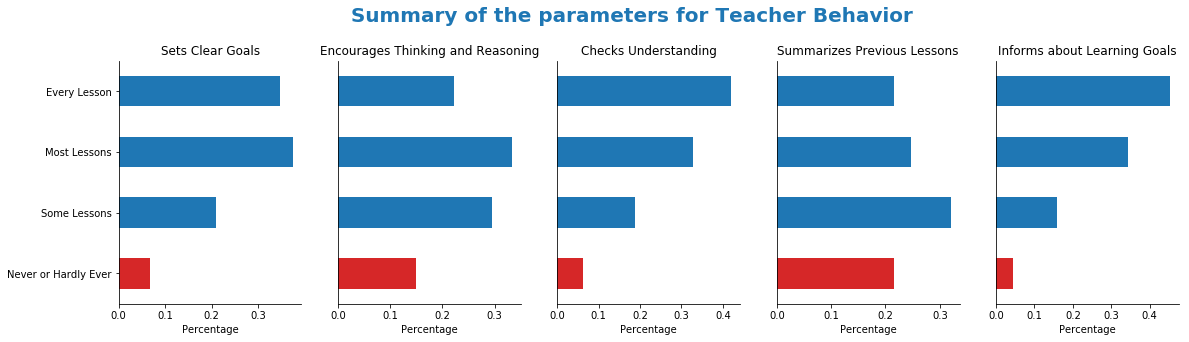

In [112]:
col = ['ST79Q01', 'ST79Q02', 'ST79Q06', 'ST79Q08', 'ST79Q15']
titles = ["Sets Clear Goals", "Encourages Thinking and Reasoning", "Checks Understanding", "Summarizes Previous Lessons",
          "Informs about Learning Goals"]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Teacher Behavior", titles, 
                             nr=1, nc=5,figh=19, figw=5, color=["tab:red", "tab:blue", "tab:blue", "tab:blue"])
for i in [1,2,3,4]:
    axes[i].set_yticks([],[]);

Less than 10% of students said that they never or hardly ever learn in classroom when: Sets clear goals, encourages thinking and reasoning, checks understanding, summarizes previous lessonsa and informs about learning goals.

#### Teacher behaviour - student orientation (TCHBEHSO)

- ST79Q03
- ST79Q04
- ST79Q07
- ST79Q10

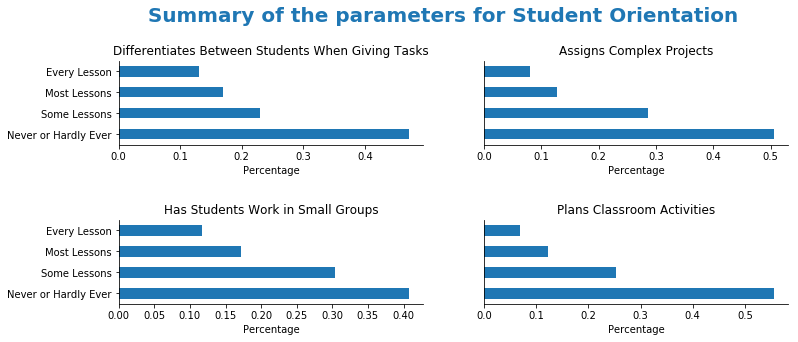

In [113]:
col = ['ST79Q03', 'ST79Q04', 'ST79Q07', 'ST79Q10']
titles = ["Differentiates Between Students When Giving Tasks",
          "Assigns Complex Projects", "Has Students Work in Small Groups",
          "Plans Classroom Activities"]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Student Orientation", titles, 
                             nr=2, nc=2,figh=12, figw=5)
for i in [1,3]:
    axes[i].set_yticks([],[]);

Above 40% of teacher never or hardly ever take part to student-orientation for the following reasons : Differentiates between students when giving tasks, assigns complex projects, has students work in small groups and plans classroom activities.

#### Teacher behaviour - formative assessment (TCHBEHFA)

- ST79Q05
- ST79Q11
- ST79Q12
- ST79Q17

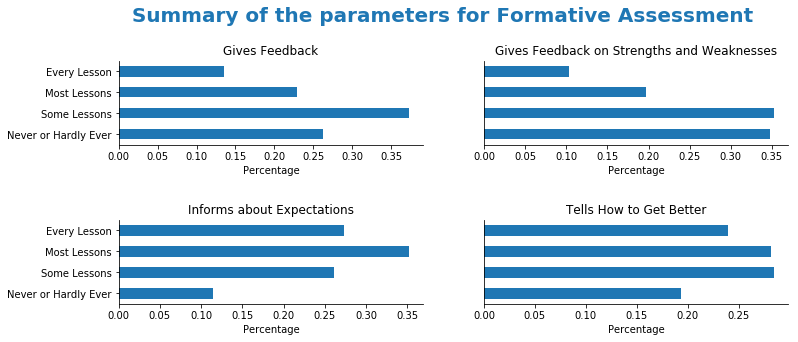

In [114]:
col = ['ST79Q05', 'ST79Q11', 'ST79Q12', 'ST79Q17']
titles = ["Gives Feedback",
          "Gives Feedback on Strengths and Weaknesses", "Informs about Expectations",
          "Tells How to Get Better"]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Formative Assessment", titles, 
                             nr=2, nc=2,figh=12, figw=5)
for i in [1,3]:
    axes[i].set_yticks([],[]);

There is no clue onto whether any of teacher formative teacher formative assessment helps the students to get better.

#### Teacher support in mathematics classes (TEACHSUP)

- ST77Q01
- ST77Q02
- ST77Q04
- ST77Q05
- ST77Q06


In [115]:
pisa2012['ST77Q06'].unique()

array(['Every Lesson', nan, 'Some Lessons', 'Most Lessons',
       'Never or Hardly Ever'], dtype=object)

In [116]:
teacher_support_order = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
transform_categorical_column_to_be_ordered(pisa2012, teacher_support_order,
                                           ["ST77Q01", "ST77Q02", "ST77Q04", "ST77Q05", "ST77Q06"])

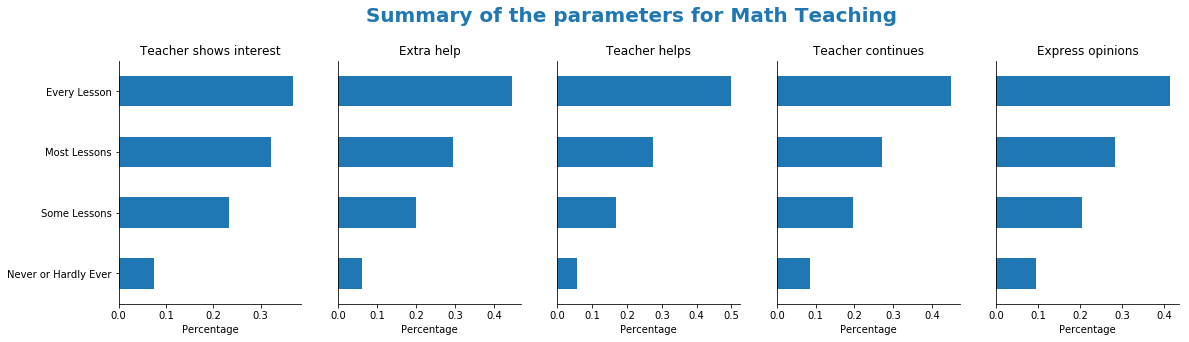

In [117]:
col = ['ST77Q01', 'ST77Q02', 'ST77Q04', 'ST77Q05', "ST77Q06"]
titles = ["Teacher shows interest", "Extra help", "Teacher helps", "Teacher continues", "Express opinions"]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Math Teaching", titles, 
                             nr=1, nc=5,figh=19, figw=5)
for i in [1,2,3,4]:
    axes[i].set_yticks([],[]);

Less than 10% of teacher never or hardly ever supports students while more than 30% supports students math teaching doing :
Teacher shows interest, extra help, teacher helps, teacher continues and express opinions.

#### Cognitive activation in mathematics lessons (COGACT)

- ST80Q01
- ST80Q04
- ST80Q05
- ST80Q06
- ST80Q07
- ST80Q08
- ST80Q09
- ST80Q10
- ST80Q11

In [118]:
pisa2012['ST80Q01'].unique()

array(['Always or almost always', nan, 'Never or rarely', 'Often',
       'Sometimes'], dtype=object)

In [119]:
cognitive_activation_order = ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
transform_categorical_column_to_be_ordered(pisa2012, cognitive_activation_order,
                                           ["ST80Q01", "ST80Q04", "ST80Q05", 
                                            "ST80Q06", "ST80Q07", "ST80Q08",
                                            "ST80Q09", "ST80Q10", "ST80Q11"])

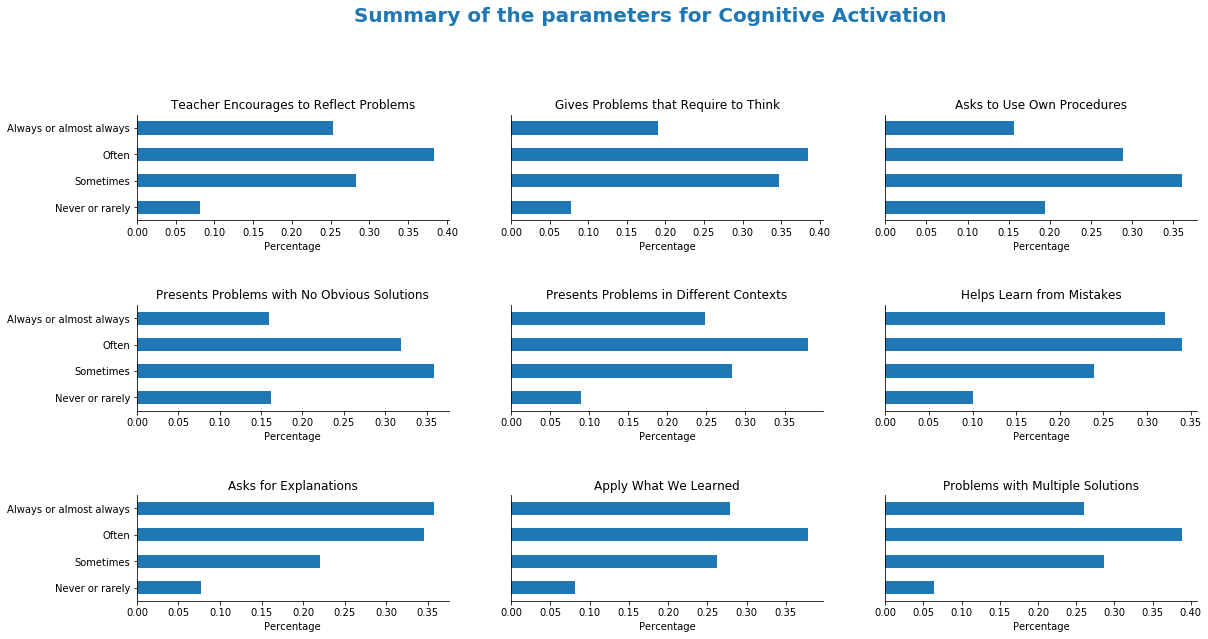

In [120]:
col = ["ST80Q01", "ST80Q04", "ST80Q05", "ST80Q06", "ST80Q07", "ST80Q08", "ST80Q09", "ST80Q10", "ST80Q11"]
titles = ["Teacher Encourages to Reflect Problems", 
          "Gives Problems that Require to Think",
          "Asks to Use Own Procedures", "Presents Problems with No Obvious Solutions",
          "Presents Problems in Different Contexts", "Helps Learn from Mistakes", "Asks for Explanations",
          "Apply What We Learned", "Problems with Multiple Solutions"
         ]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Cognitive Activation", titles, 
                             nr=3, nc=3,figh=19, figw=10, fig_a_hspace=.8)
for i in [1,2,4,5,7,8]:
    axes[i].set_yticks([],[]);

It's not clear how cognitive activation helps to understand student academic performance.

#### Mathematics teacher support (MTSUP)

- ST83Q01
- ST83Q02
- ST83Q03
- ST83Q04

In [121]:
pisa2012['ST83Q01'].unique()

array(['Strongly disagree', nan, 'Strongly agree', 'Agree', 'Disagree'], dtype=object)

In [122]:
math_teacher_sup_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
transform_categorical_column_to_be_ordered(pisa2012, math_teacher_sup_order,
                                           ["ST83Q01", "ST83Q02", "ST83Q03", "ST83Q04"])

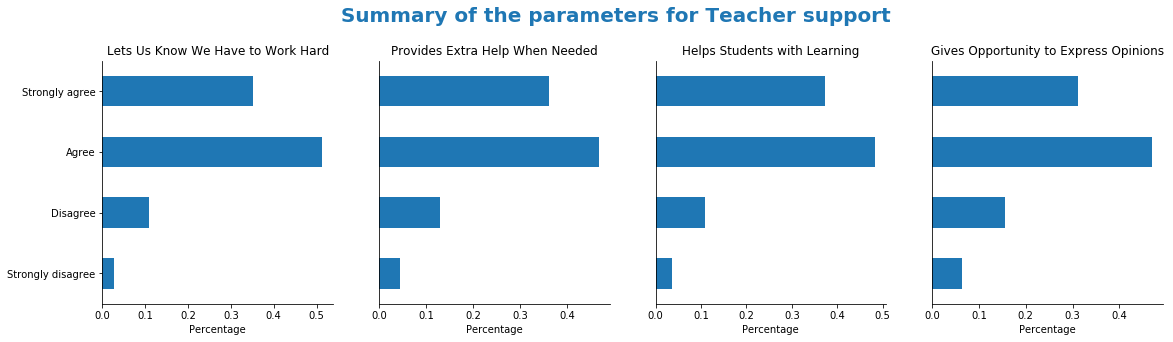

In [123]:
col = ["ST83Q01", "ST83Q02", "ST83Q03", "ST83Q04"]
titles = ["Lets Us Know We Have to Work Hard", 
          "Provides Extra Help When Needed",
          "Helps Students with Learning", "Gives Opportunity to Express Opinions"
         ]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Teacher support", titles, 
                             nr=1, nc=4,figh=19, figw=5)
for i in [1,2,3]:
    axes[i].set_yticks([],[]);

More than 40% of students Agree believes teachers support them by doing : Let us know we have to work hard, provvides extra help when needed, helps students with learning and gives opportunity to express opinions.

#### Classroom management (CLSMAN)

- ST85Q01
- ST85Q02
- ST85Q03
- ST85Q04

In [124]:
pisa2012['ST85Q01'].unique()

array(['Agree', nan, 'Strongly agree', 'Strongly disagree', 'Disagree'], dtype=object)

In [125]:
clsman_order =['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
transform_categorical_column_to_be_ordered(pisa2012, clsman_order, ["ST85Q01", "ST85Q02", "ST85Q03", "ST85Q04"])

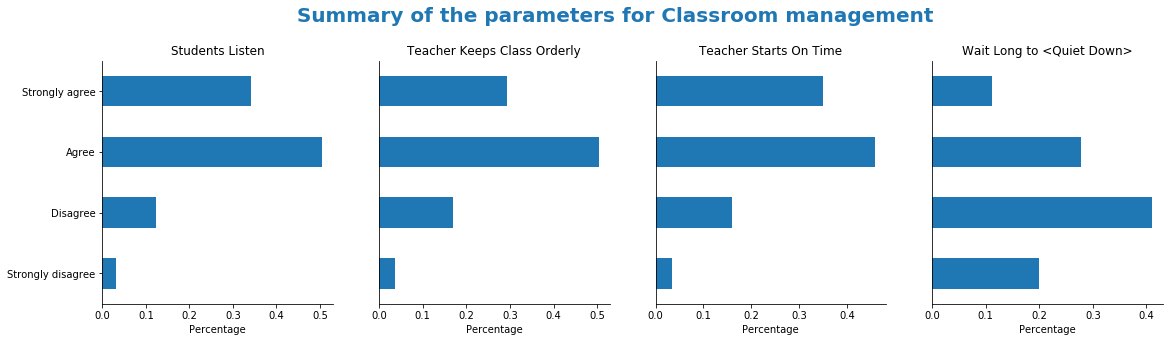

In [126]:
col = ["ST85Q01", "ST85Q02", "ST85Q03", "ST85Q04"]
titles = ["Students Listen", 
          "Teacher Keeps Class Orderly",
          "Teacher Starts On Time", "Wait Long to <Quiet Down>"
         ]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Classroom management", titles, 
                             nr=1, nc=4,figh=19, figw=5)
for i in [1,2,3]:
    axes[i].set_yticks([],[]);

Except the trait, wait long to quiet down, more than 40% of students believes that teacher classroom management could be picutre as follow : students listen, teacher keeps class orderly, teacher statrts on time. 

#### Disciplinary climate (DISCLIMA)

- ST81Q01
- ST81Q02
- ST81Q03
- ST81Q04
- ST81Q05

In [127]:
pisa2012['ST81Q01'].unique()

array(['Never or Hardly Ever', nan, 'Some Lessons', 'Every Lesson',
       'Most Lessons'], dtype=object)

In [128]:
disclima_order = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
transform_categorical_column_to_be_ordered(pisa2012, disclima_order,
                                          ['ST81Q01', 'ST81Q02', 'ST81Q03', 'ST81Q04', 'ST81Q05'])

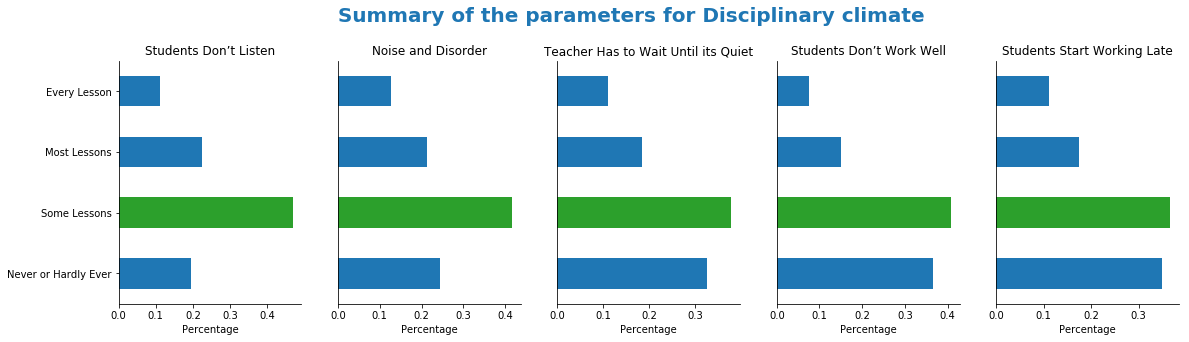

In [129]:
col = ['ST81Q01', 'ST81Q02', 'ST81Q03', 'ST81Q04', 'ST81Q05']
titles = ["Students Don’t Listen", 
          "Noise and Disorder",
          "Teacher Has to Wait Until its Quiet", "Students Don’t Work Well", 
          "Students Start Working Late"
         ]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Disciplinary climate", titles, 
                             nr=1, nc=5,figh=19, figw=5, color=["tab:blue", "tab:green", "tab:blue", "tab:blue"])
for i in [1,2,3,4]:
    axes[i].set_yticks([],[]);

Above 40% of students thinks discplinary climate depends on the lessons.

### School Climate

According to the definition of the list of indices to define it we have :

- STUDREL Teacher student relation
- BELONG Sense of belonging to school

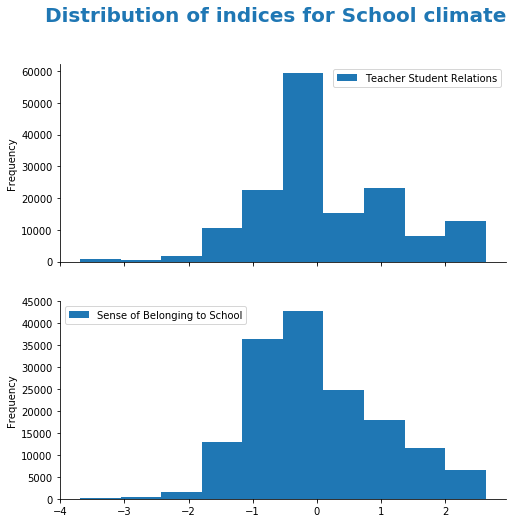

In [130]:
axes = pisa2012[['STUDREL', 'BELONG']].plot(kind='hist', bins=10, sharex=True,
                                            subplots=True, figsize=(8,8), legend=False, color="tab:blue")

axes[0].legend(["Teacher Student Relations"])
axes[1].legend(["Sense of Belonging to School"]);
plt.suptitle(t="Distribution of indices for School climate", fontsize=20, fontweight='bold', color="tab:blue");

The distribution of indices for school climate seems to be normally distributed.

#### Teacher-student relations parameters

- ST86Q01
- ST86Q02
- ST86Q03
- ST86Q04
- ST86Q05

In [131]:
pisa2012['ST86Q01'].unique()

array(['Agree', nan, 'Strongly agree', 'Strongly disagree', 'Disagree'], dtype=object)

In [132]:
studrel_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
transform_categorical_column_to_be_ordered(pisa2012, studrel_order,
                                           ["ST86Q01", "ST86Q02", "ST86Q03", "ST86Q04", "ST86Q05"])

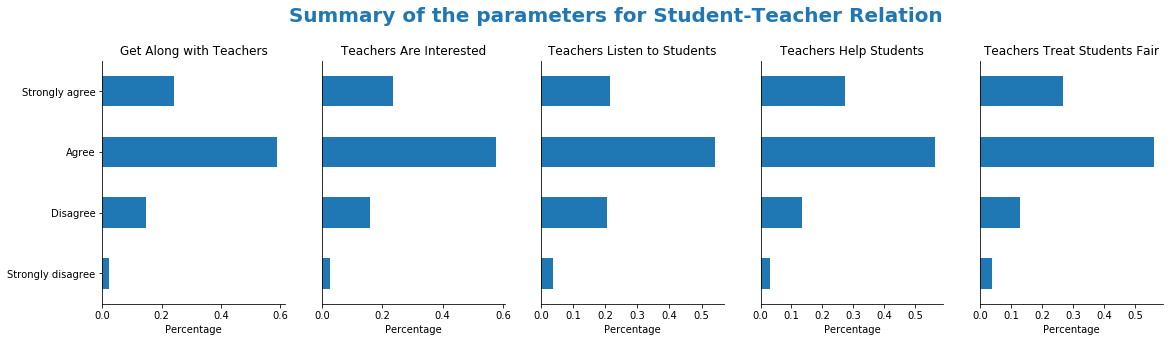

In [133]:
col = ['ST86Q01', 'ST86Q02', 'ST86Q03', 'ST86Q04', 'ST86Q05']
titles = ["Get Along with Teachers", 
          "Teachers Are Interested",
          "Teachers Listen to Students", "Teachers Help Students", 
          "Teachers Treat Students Fair"
         ]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Student-Teacher Relation", titles, 
                             nr=1, nc=5,figh=19, figw=5)
for i in [1,2,3,4]:
    axes[i].set_yticks([],[]);

More than 60% of students Agree that student-teacher relation could be portray as follow : Get along with teachers, teachers are interested, teacher listen to students, teacher help students, teacher treat students fair.

#### Sense of belonging to school

- ST87Q01
- ST87Q02
- ST87Q03
- ST87Q04
- ST87Q05
- ST87Q06
- ST87Q07
- ST87Q08
- ST87Q09

In [134]:
pisa2012["ST87Q01"].unique()

array(['Agree', nan, 'Strongly disagree', 'Disagree', 'Strongly agree'], dtype=object)

In [135]:
belong_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
transform_categorical_column_to_be_ordered(pisa2012, belong_order,
                                           ["ST87Q01", "ST87Q02", "ST87Q03", "ST87Q04", "ST87Q05",
                                            "ST87Q06", "ST87Q07", "ST87Q08", "ST87Q09"])

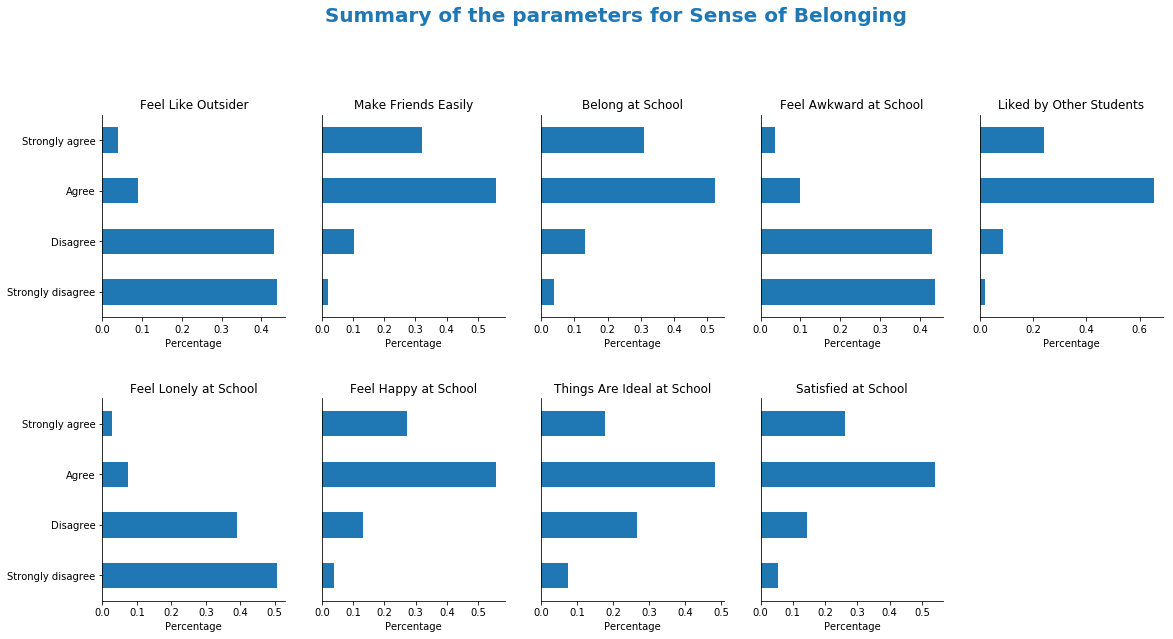

In [136]:
col = ["ST87Q01", "ST87Q02", "ST87Q03", "ST87Q04", "ST87Q05", "ST87Q06", "ST87Q07", "ST87Q08", "ST87Q09"]

titles = ["Feel Like Outsider",  "Make Friends Easily", "Belong at School", "Feel Awkward at School", 
          "Liked by Other Students", "Feel Lonely at School", "Feel Happy at School", "Things Are Ideal at School",
          "Satisfied at School"]

axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Sense of Belonging", titles, 
                             nr=2, nc=5,figh=19, figw=10, fig_a_hspace=.4)
for i in [1,2,3,4, 6,7,8,9]:
    axes[i].set_yticks([],[]);
plt.delaxes(axes[9]);

### Attitudes towards School

The attitudes towards school was covered by two scaled indices based on eight items ST88, ST89.

- ATSCHL 
    - ST88Q01, ST88Q02, ST88Q03, ST88Q04
- ATTLNACT
    - ST89Q02, ST89Q03, ST89Q04, ST89Q05

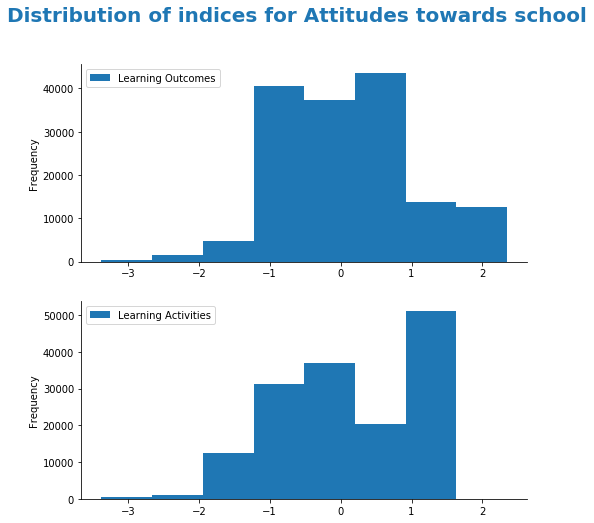

In [137]:
axes = pisa2012[['ATSCHL', 'ATTLNACT']].plot(kind='hist', 
                                             bins=8, figsize=(8,8), 
                                             subplots=True, 
                                             sharex=False, color="tab:blue")
axes[0].legend(["Learning Outcomes"])
axes[1].legend(["Learning Activities"])
plt.suptitle(t="Distribution of indices for Attitudes towards school",
             fontsize=20, fontweight='bold', color="tab:blue");

#### List of items for index ATSCHL 
 
- ST88Q01, 
- ST88Q02, 
- ST88Q03, 
- ST88Q04

In [138]:
pisa2012['ST88Q01'].unique()

array(['Agree', nan, 'Disagree', 'Strongly agree', 'Strongly disagree'], dtype=object)

In [139]:
atschl_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
transform_categorical_column_to_be_ordered(pisa2012, atschl_order,
                                           ["ST88Q01", "ST88Q02", "ST88Q03", "ST88Q04"])

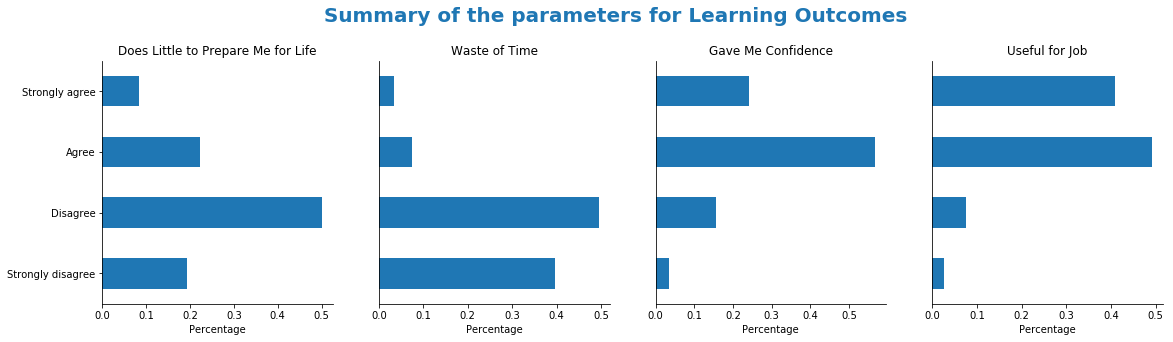

In [140]:
col = ["ST88Q01", "ST88Q02", "ST88Q03", "ST88Q04"]
titles = ["Does Little to Prepare Me for Life", 
          "Waste of Time",
          "Gave Me Confidence", 
          "Useful for Job"
         ]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Learning Outcomes", titles, 
                             nr=1, nc=4,figh=19, figw=5)
for i in [1,2,3]:
    axes[i].set_yticks([],[]);

#### List of items for index ATTLNACT

- ST89Q02, 
- ST89Q03, 
- ST89Q04, 
- ST89Q05

In [141]:
pisa2012['ST89Q02'].unique()

array(['Agree', nan, 'Strongly agree', 'Strongly disagree', 'Disagree'], dtype=object)

In [142]:
attlnact_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
transform_categorical_column_to_be_ordered(pisa2012, attlnact_order,
                                           ["ST89Q02", "ST89Q03", "ST89Q04", "ST89Q05"])

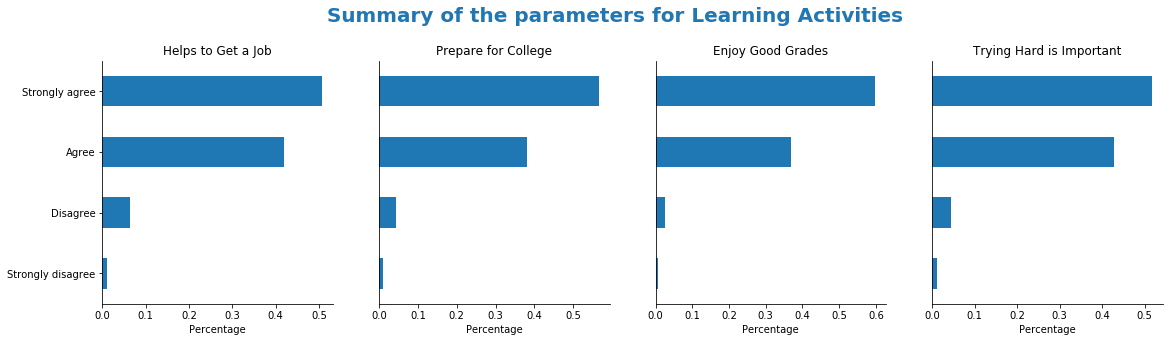

In [143]:
col = ["ST89Q02", "ST89Q03", "ST89Q04", "ST89Q05"]
titles = ["Helps to Get a Job", 
          "Prepare for College",
          "Enjoy Good Grades", 
          "Trying Hard is Important"
         ]
axes = summary_barplot_items(pisa2012, col, "Summary of the parameters for Learning Activities", titles, 
                             nr=1, nc=4,figh=19, figw=5)
for i in [1,2,3]:
    axes[i].set_yticks([],[]);

### Univariate recap

<span style="color:white">Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?</span>.


From the univariate explorations we investigated the following indices :

- Some general indices
    - GRADE, IMMIG, FAMSTRUC, HISEI , HISCED : 

There are more students that are from OECD countries. the relative grade distribution seems to follow a normal distribution. Many parents have completed ISCED level 3A, 3B and 3C.

- Family wealth
    - WEALTH, CULTPOS, HEDRES, HOMEPOS : 

Parents possesses more literature books per household 

- Attitude towards mathematics
    - INSTMOT, INTMAT,SUBNORM, MATHEFF, ANXMAT, SCMAT, FAILMAT, MATHWKETH, MATINTFC, MATBEH : 

There are some parameters showing students attitude toward mathematics but we can really select one that qualify the best.
- Opportunity to learn
    - EXAPPLM, EXPUREM, FAMCON, FAMCONC, TCHBEHTD, TCHBEHSO, TEACHSUP, COGACT, MTSUP, CLSMAN, DISCLIMA : 

Teacher behavior seems to behave well or get good feedback from there students occasionally.
- School climate :
    - STUDREL, BELONG : 

No real patterns was observed from students behavior at school.

<span style="color:white">### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?</span>.

There were some useful features both on the general indices and some parameters that composes the general indices. Yes we change some columns data type from numerical to categorical in order to better understand the data.

## Bivariate Exploration

/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'edgecolor'
  s)


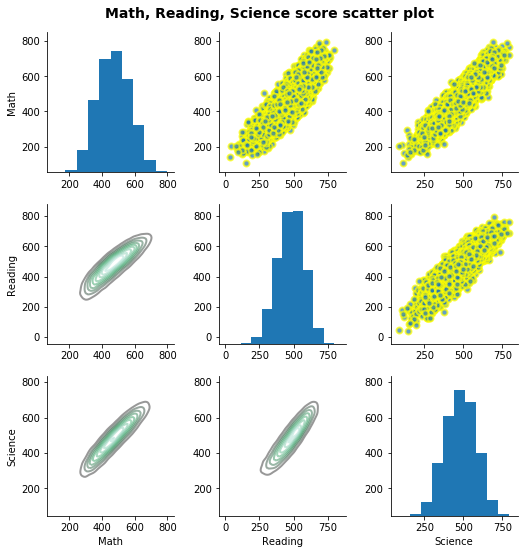

In [144]:
grid = sb.PairGrid(data = pisa2012.sample(20000), 
                   vars=["Math", "Reading", "Science"])
grid = grid.map_diag(plt.hist, linewidth=3)
grid = grid.map_lower(sb.kdeplot, linewidths = 2, edgecolor = 'blue', alpha =.5)
grid = grid.map_upper(plt.scatter, linewidths = 2, edgecolor = 'yellow',alpha =.7)
grid.fig.suptitle("Math, Reading, Science score scatter plot", y = 1.02,
                  fontsize=14, fontweight='bold');

#### Math,Reading and Science score VS sex, oecd, country

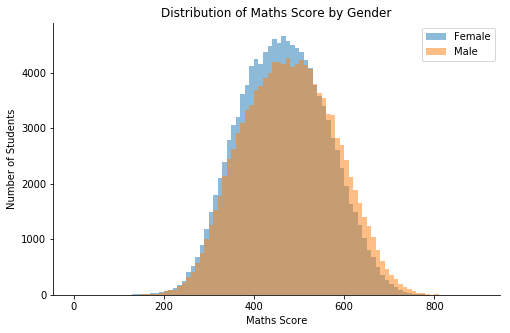

In [145]:
binsize = 10
bins = np.arange(0, pisa2012['PV1MATH'].max()+binsize, binsize)

(pisa2012
 .query("ST04Q01 == 'Female' ")
 ['Math']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Maths Score by Gender",
       figsize=(8,5),
       alpha=.5,
       label="Female"
      )
);

(pisa2012
 .query("ST04Q01 == 'Male' ")
 ['Math']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Maths Score by Gender",
       figsize=(8,5),
       alpha=.5,
       label='Male'
      )
);

plt.xlabel('Maths Score');
plt.ylabel('Number of Students');
plt.legend();

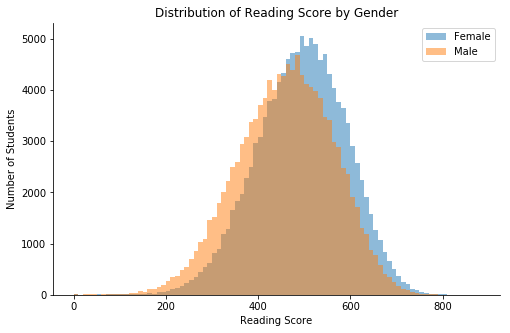

In [146]:
binsize = 10
bins = np.arange(0, pisa2012['PV1READ'].max()+binsize, binsize)

(pisa2012
 .query("ST04Q01 == 'Female' ")
 ['PV1READ']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Reading Score by Gender",
       figsize=(8,5),
       alpha=.5,
       label="Female"
      )
);

(pisa2012
 .query("ST04Q01 == 'Male' ")
 ['PV1READ']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Reading Score by Gender",
       figsize=(8,5),
       alpha=.5,
       label='Male'
      )
);

plt.xlabel('Reading Score');
plt.ylabel('Number of Students');
plt.legend();

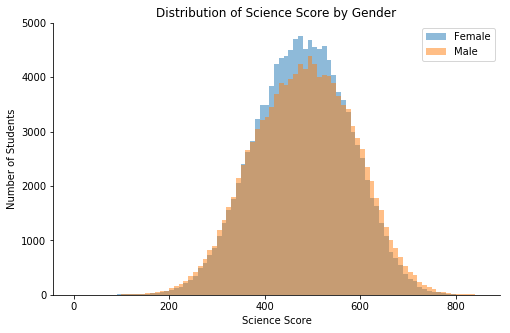

In [147]:
binsize = 10
bins = np.arange(0, pisa2012['PV1SCIE'].max()+binsize, binsize)

(pisa2012
 .query("ST04Q01 == 'Female' ")
 ['PV1SCIE']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Science Score by Gender",
       figsize=(8,5),
       alpha=.5,
       label="Female"
      )
);

(pisa2012
 .query("ST04Q01 == 'Male' ")
 ['PV1SCIE']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Science Score by Gender",
       figsize=(8,5),
       alpha=.5,
       label='Male'
      )
);

plt.xlabel('Science Score');
plt.ylabel('Number of Students');
plt.legend();

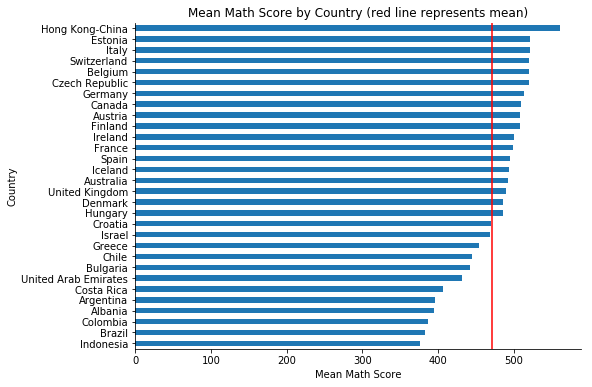

In [148]:
(pisa2012
 .groupby('CNT')
 .mean()['PV1MATH']
 .sort_values(ascending=True)
 .plot(kind='barh', 
       title="Mean Math Score by Country (red line represents mean)",
       figsize=(8,6), color='C0'
      )
)

plt.xlabel('Mean Math Score')
plt.ylabel('Country')
plt.axvline(pisa2012['PV1MATH'].mean(), color='r')
plt.show()

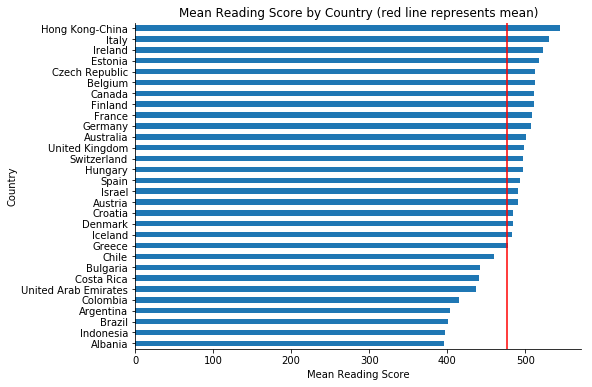

In [149]:
(pisa2012
 .groupby('CNT')
 .mean()['PV1READ']
 .sort_values(ascending=True)
 .plot(kind='barh', 
       title="Mean Reading Score by Country (red line represents mean)",
       figsize=(8,6), color='C0'
      )
)

plt.xlabel('Mean Reading Score')
plt.ylabel('Country')
plt.axvline(pisa2012['PV1READ'].mean(), color='r');

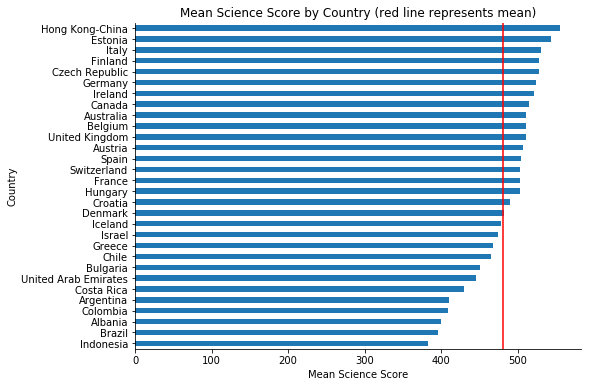

In [150]:
(pisa2012
 .groupby('CNT')
 .mean()['PV1SCIE']
 .sort_values(ascending=True)
 .plot(kind='barh', 
       title="Mean Science Score by Country (red line represents mean)",
       figsize=(8,6), color='C0'
      )
)

plt.xlabel('Mean Science Score')
plt.ylabel('Country')
plt.axvline(pisa2012['PV1SCIE'].mean(), color='r');

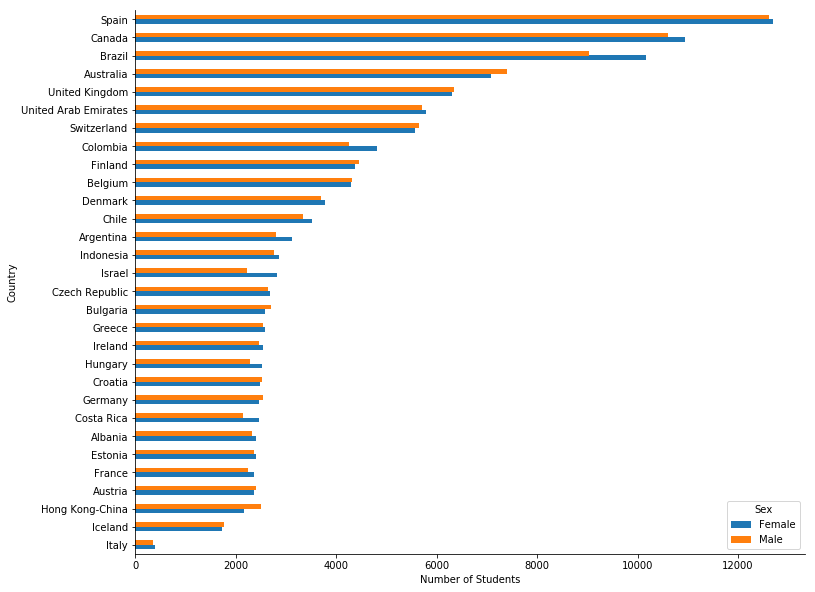

In [151]:
(pd.crosstab(index=pisa2012['CNT'], columns=pisa2012['ST04Q01'])
 .sort_values(by=['Female', 'Male'], ascending=True)
 .plot(kind='barh', 
       figsize=(12,10),
      )
);
plt.legend(title="Sex")
plt.xlabel('Number of Students');
plt.ylabel("Country");

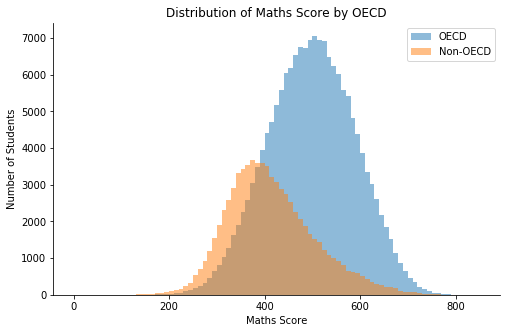

In [152]:
binsize = 10
bins = np.arange(0, pisa2012['Math'].max()+binsize, binsize)

(pisa2012
 .query("OECD == 'OECD' ")
 ['Math']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Maths Score by OECD",
       figsize=(8,5),
       alpha=.5,
       label="OECD"
      )
);

(pisa2012
 .query("OECD == 'Non-OECD' ")
 ['Math']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Maths Score by OECD",
       figsize=(8,5),
       alpha=.5,
       label='Non-OECD'
      )
);

plt.xlabel('Maths Score');
plt.ylabel('Number of Students');
plt.legend();

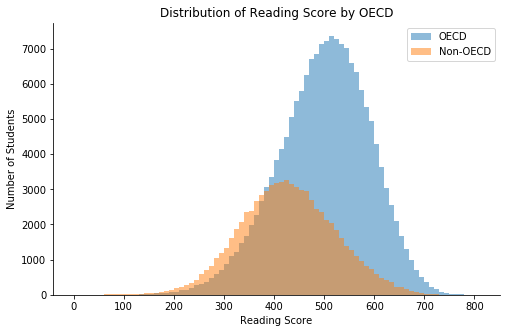

In [153]:
binsize = 10
bins = np.arange(0, pisa2012['Reading'].max()+binsize, binsize)

(pisa2012
 .query("OECD == 'OECD' ")
 ['Reading']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Reading Score by OECD",
       figsize=(8,5),
       alpha=.5,
       label="OECD"
      )
);

(pisa2012
 .query("OECD == 'Non-OECD' ")
 ['Reading']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Reading Score by OECD",
       figsize=(8,5),
       alpha=.5,
       label='Non-OECD'
      )
);

plt.xlabel('Reading Score');
plt.ylabel('Number of Students');
plt.legend();

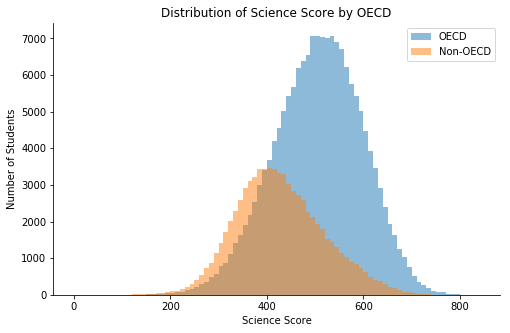

In [154]:
binsize = 10
bins = np.arange(0, pisa2012['Science'].max()+binsize, binsize)

(pisa2012
 .query("OECD == 'OECD' ")
 ['Science']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Science Score by OECD",
       figsize=(8,5),
       alpha=.5,
       label="OECD"
      )
);

(pisa2012
 .query("OECD == 'Non-OECD' ")
 ['Science']
 .plot(kind='hist',
       bins=bins,
       title="Distribution of Science Score by OECD",
       figsize=(8,5),
       alpha=.5,
       label='Non-OECD'
      )
);

plt.xlabel('Science Score');
plt.ylabel('Number of Students');
plt.legend();

#### Relative grade, Family structure, OECD, Immigration status, Highest Occupational status, sex relationship

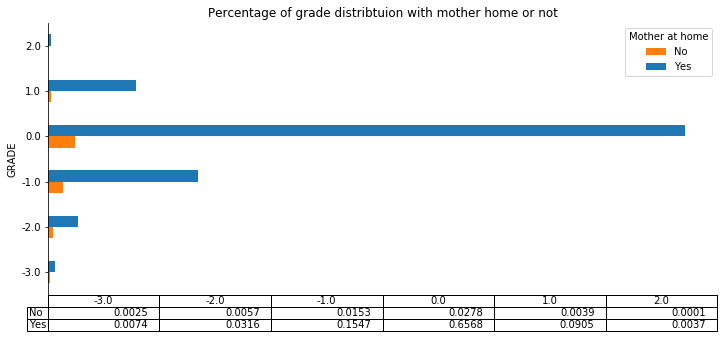

In [155]:
crosstab_mother = pd.crosstab(pisa2012['GRADE'], pisa2012['ST11Q01'], normalize=True).round(4)
crosstab_mother.plot(kind='barh', color=['tab:orange', "tab:blue"], figsize=(12,5), table=True);
plt.legend(title="Mother at home");
plt.xticks([],[]);
plt.title("Percentage of grade distribtuion with mother home or not");

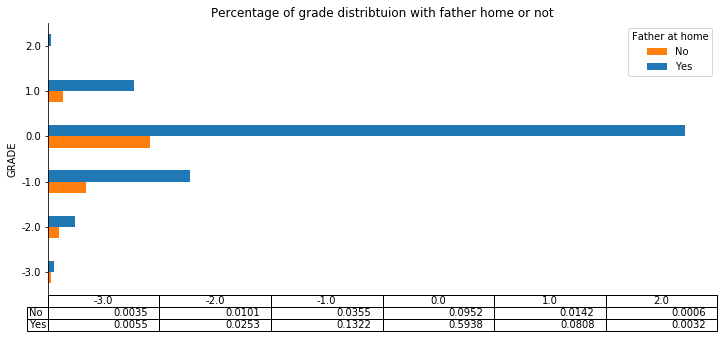

In [156]:
crosstab_father = pd.crosstab(pisa2012['GRADE'], pisa2012['ST11Q02'], normalize=True,).round(4)
crosstab_father.plot(kind='barh', color=['tab:orange', "tab:blue"], figsize=(12,5), table=True);
plt.legend(title="Father at home");
plt.xticks([],[]);
plt.title("Percentage of grade distribtuion with father home or not");

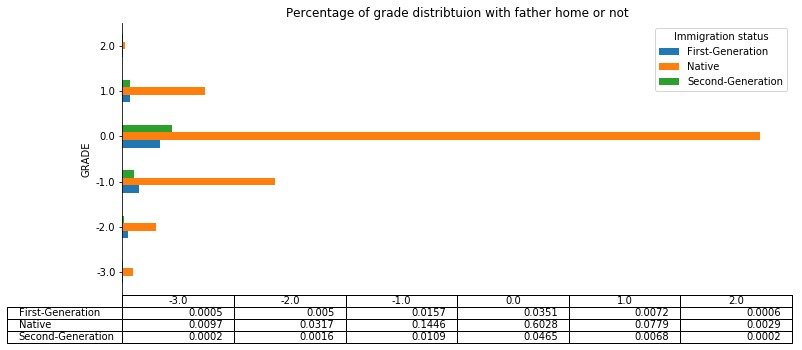

In [157]:
crosstab_immig = pd.crosstab(pisa2012['GRADE'],pisa2012['IMMIG'], normalize=True,).round(4)
crosstab_immig.plot(kind='barh', color=["tab:blue", "tab:orange", "tab:green"], figsize=(12,5), table=True);
plt.legend(title="Immigration status");
plt.xticks([],[]);
plt.title("Percentage of grade distribtuion with father home or not");

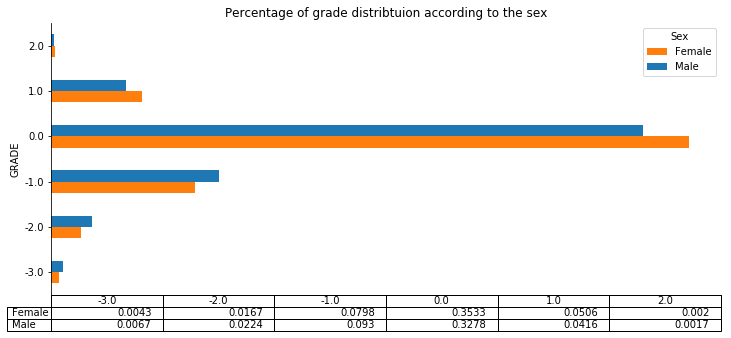

In [158]:
crosstab_sex = pd.crosstab(pisa2012['GRADE'], pisa2012['ST04Q01'], normalize=True,).round(4)
crosstab_sex.plot(kind='barh', color=['tab:orange', "tab:blue"],figsize=(12,5), table=True);
plt.legend(title="Sex");
plt.xticks([],[]);
plt.title("Percentage of grade distribtuion according to the sex");

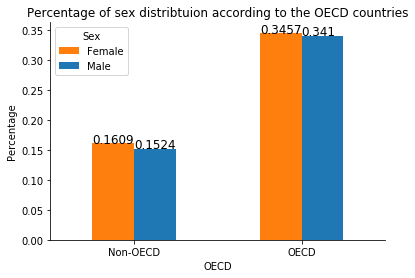

In [159]:
crosstab_oecd_sex = pd.crosstab(pisa2012['OECD'], pisa2012['ST04Q01'], normalize=True,)

crosstab_oecd_sex.plot(kind='bar', color=['tab:orange', "tab:blue"], rot=0);
plt.legend(title="Sex");
for i,v in enumerate(crosstab_oecd_sex["Female"]):
    plt.text(i, v, str(round(v, 4)), fontdict=dict(color='black', fontsize=12), ha='right');
for i,v in enumerate(crosstab_oecd_sex["Male"]):
    plt.text(i, v, str(round(v, 4)), fontdict=dict(color='black', fontsize=12), ha='left');
plt.ylabel("Percentage");
plt.title("Percentage of sex distribtuion according to the OECD countries");

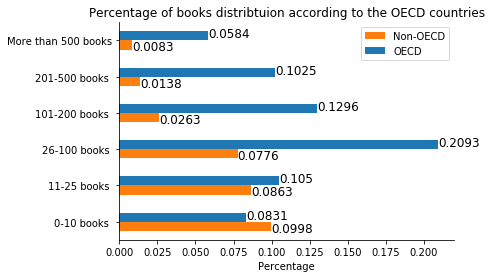

In [160]:
crosstab_book_oecd = pd.crosstab(pisa2012['ST28Q01'],pisa2012['OECD'], normalize=True,)

crosstab_book_oecd.plot(kind='barh', color=['tab:orange', "tab:blue"],);
plt.legend(title="");
for i,v in enumerate(crosstab_book_oecd["Non-OECD"]):
    plt.text(v, i, str(round(v, 4)), fontdict=dict(color='black', fontsize=12), va='top');
for i,v in enumerate(crosstab_book_oecd["OECD"]):
    plt.text(v, i, str(round(v, 4)), fontdict=dict(color='black', fontsize=12), va='bottom');
plt.xlabel("Percentage");
plt.ylabel("");
plt.title("Percentage of books distribtuion according to the OECD countries");

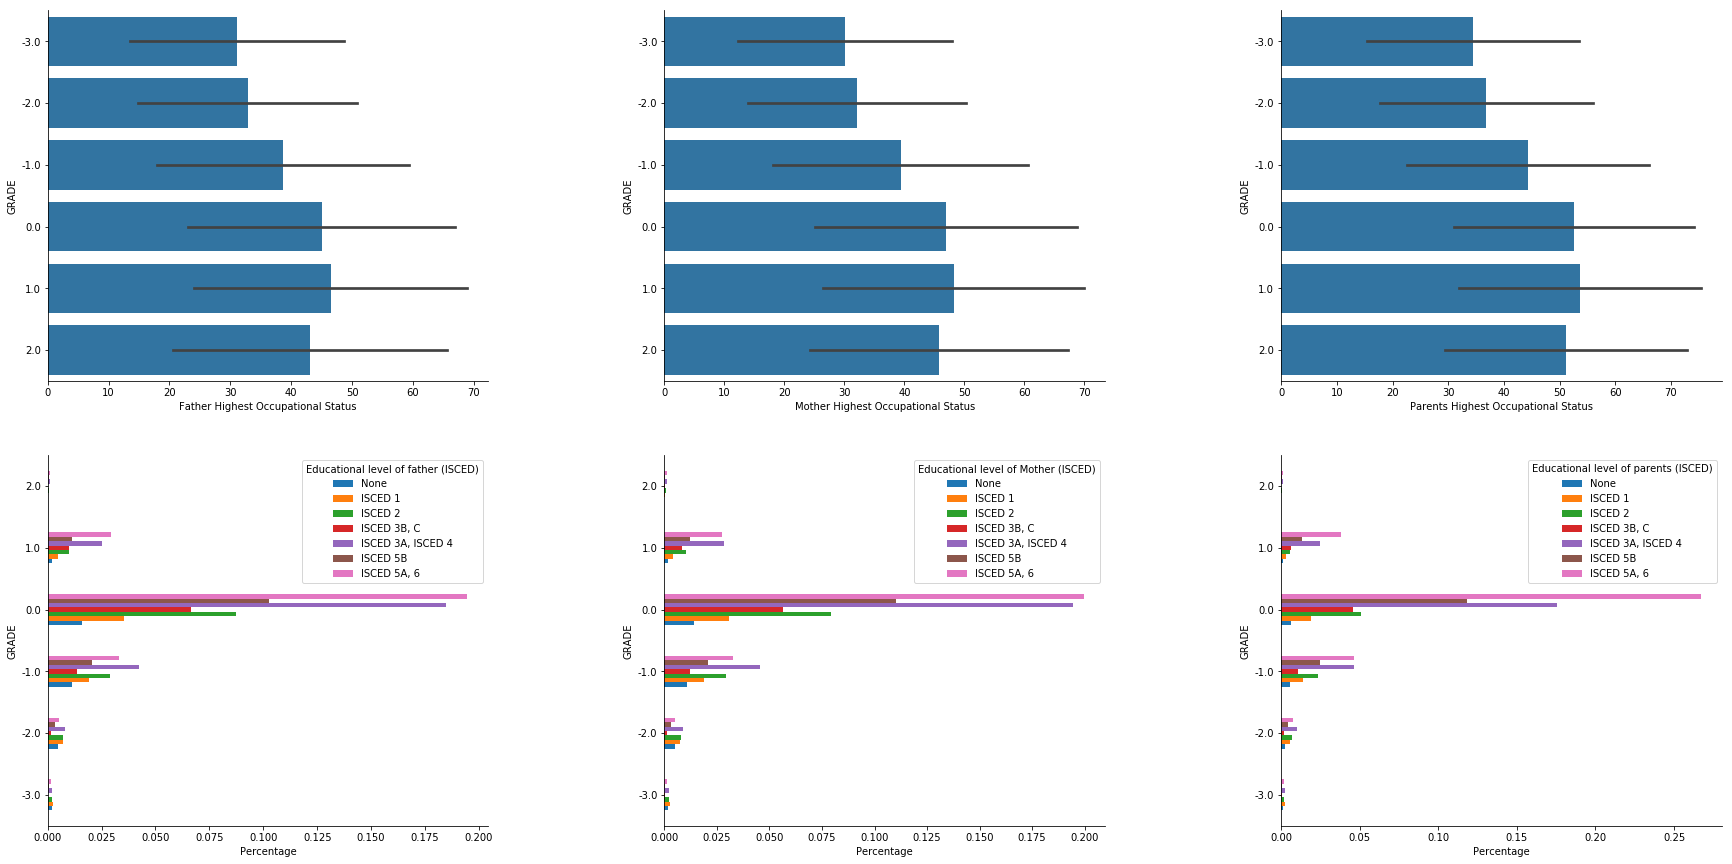

In [161]:
fig = plt.figure(figsize =(30,15))

ax1 = fig.add_subplot(231)
sb.barplot(data=pisa2012, y="GRADE", x="BFMJ2", ci='sd', color="tab:blue", orient='h');
plt.xlabel("Father Highest Occupational Status");
plt.ylabel("GRADE");

ax2 = fig.add_subplot(232)
sb.barplot(data=pisa2012, y="GRADE", x="BMMJ1", ci='sd', color="tab:blue", orient='h');
plt.xlabel("Mother Highest Occupational Status");
plt.ylabel("GRADE");

ax3 = fig.add_subplot(233)
sb.barplot(data=pisa2012, y="GRADE", x="HISEI", ci='sd', color="tab:blue", orient='h');
plt.xlabel("Parents Highest Occupational Status");
plt.ylabel("GRADE");

ax4 = fig.add_subplot(234)
crosstab_grade_fisced = pd.crosstab(pisa2012['GRADE'],pisa2012['FISCED'], normalize=True,).round(4)
crosstab_grade_fisced.plot(kind='barh', table=False, ax=ax4);
ax4.set_xlabel("Percentage")
plt.legend(title="Educational level of father (ISCED)");

ax5 = fig.add_subplot(235)
crosstab_grade_misced = pd.crosstab(pisa2012['GRADE'],pisa2012['MISCED'], normalize=True,).round(4)
crosstab_grade_misced.plot(kind='barh', table=False, ax=ax5);
ax5.set_xlabel("Percentage")
plt.legend(title="Educational level of Mother (ISCED)");

ax6 = fig.add_subplot(236)
crosstab_grade_hisced = pd.crosstab(pisa2012['GRADE'],pisa2012['HISCED'], normalize=True,).round(4)
crosstab_grade_hisced.plot(kind='barh', table=False, ax=ax6);
ax6.set_xlabel("Percentage")
plt.legend(title="Educational level of parents (ISCED)");

plt.subplots_adjust(wspace=0.4);

In [162]:
def summary_hue_barplot_items(df:pd.DataFrame, col:list, hue_col:str,suptitle:str, title:list, 
                              nr=1, nc=1, 
                              figh=5, figw=12, 
                              fig_a_top=.8, fig_a_wspace=.2, fig_a_hspace=.9, 
                              color=["tab:blue"], vert=True):
    """
    Given some parameters such as the dataframe, the list of columns to plot and the details about
    how many axes to use plot and adjust the plotting parameters.
    """
    
    fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(figh, figw))
    fig.suptitle(t=suptitle, x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'tab:blue')
    axes_ = axes.flatten()
    
    if vert:
        for idx, c in enumerate(col):
            ax = sb.countplot(data=df, x=c, hue=hue_col, ax=axes_[idx])
            ax.get_legend().remove()
            ax.set_title(title);
            ax.set_xlabel("");
            
        fig.subplots_adjust(top=fig_a_top, wspace=fig_a_wspace , hspace=fig_a_hspace);
    
    else:
        for idx, c in enumerate(col):
            ax = sb.countplot(data=df, y=c, hue=hue_col, ax=axes_[idx])
            ax.get_legend().remove()
            ax.set_title(title[idx]);
            ax.set_ylabel("");
        fig.subplots_adjust(top=fig_a_top, wspace=fig_a_wspace , hspace=fig_a_hspace);
    return axes_

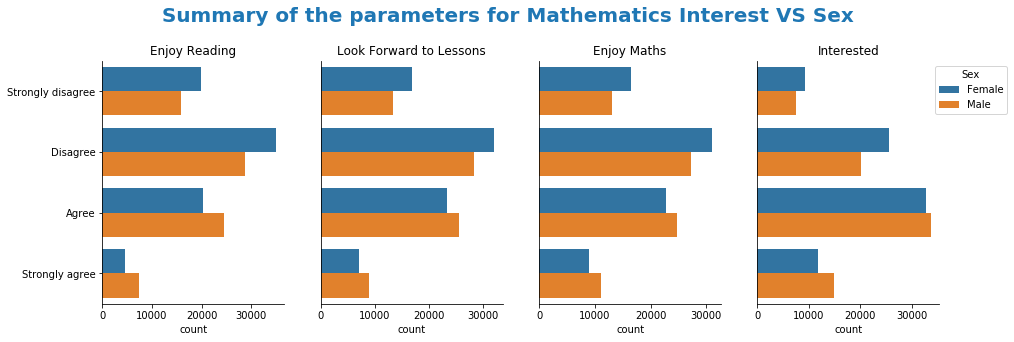

In [163]:
col = ['ST29Q01', 'ST29Q03', 'ST29Q04', 'ST29Q06']

titles = ["Enjoy Reading", "Look Forward to Lessons", "Enjoy Maths", "Interested"]

axes = summary_hue_barplot_items(pisa2012, col, 'ST04Q01', 
                                 "Summary of the parameters for Mathematics Interest VS Sex", titles, 
                                 nr=1, nc=4,figh=15, figw=5, color=["tab:blue"], 
                                 vert=False, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3]:
    axes[i].set_yticks([],[]);
axes[3].legend(title="Sex",bbox_to_anchor=(1.4, 1));

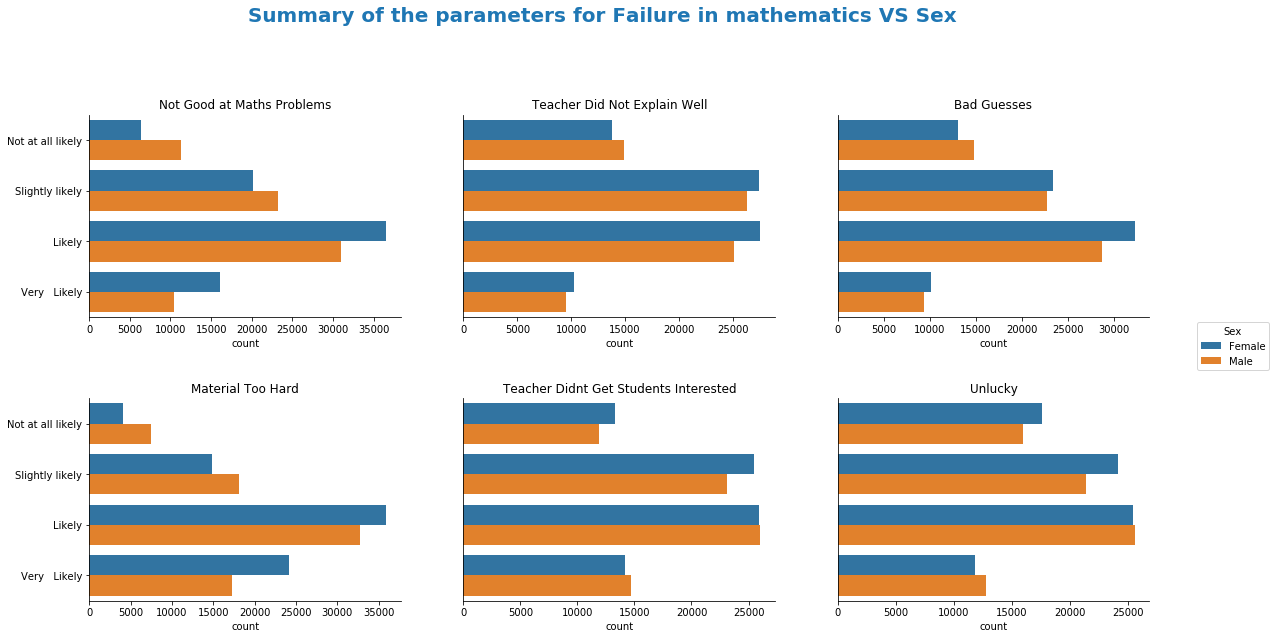

In [164]:
col = ['ST44Q01', 'ST44Q03', 'ST44Q04', 'ST44Q05', 'ST44Q07', 'ST44Q08']

titles = ["Not Good at Maths Problems", "Teacher Did Not Explain Well", "Bad Guesses",
          "Material Too Hard", 'Teacher Didnt Get Students Interested', 'Unlucky']

axes = summary_hue_barplot_items(pisa2012, col, "ST04Q01",
                                 "Summary of the parameters for Failure in mathematics VS Sex", titles, 
                                 nr=2, nc=3, figh=19, figw=10, 
                                 vert=False, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,4,5]:
    axes[i].set_yticks([],[]);
axes[2].legend(title="Sex",bbox_to_anchor=(1.4, 0));

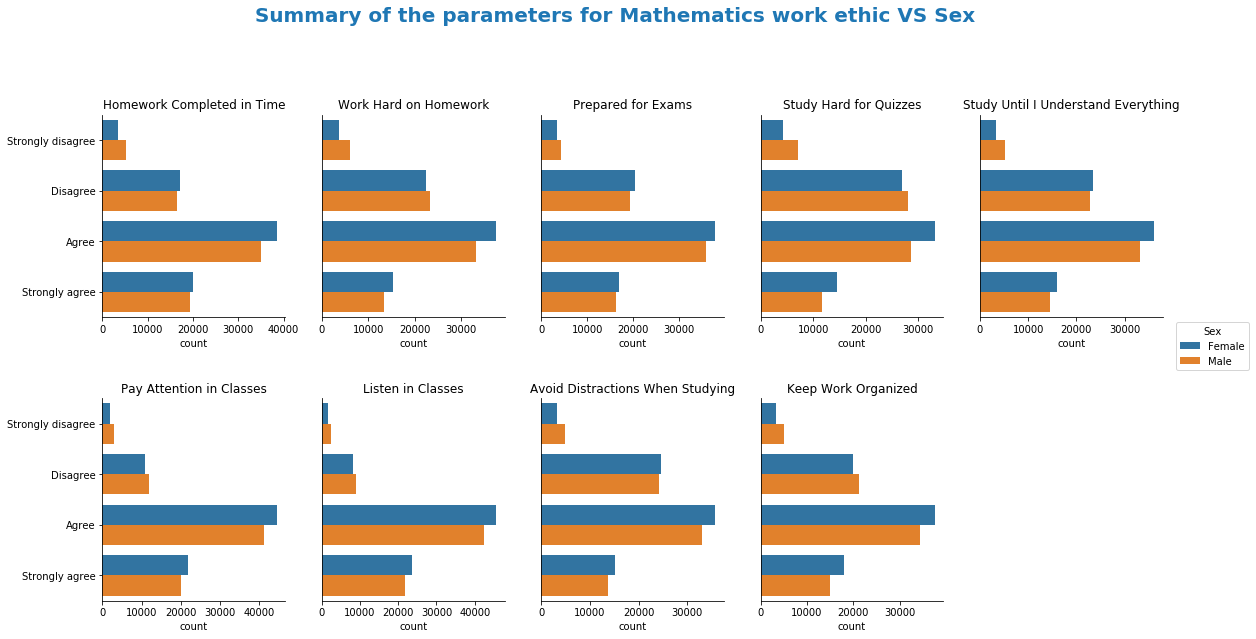

In [165]:
col = ['ST46Q01', 'ST46Q02', 'ST46Q03', 'ST46Q04', 'ST46Q05', 'ST46Q06', 'ST46Q07', 'ST46Q08', 'ST46Q09']

titles = ["Homework Completed in Time", "Work Hard on Homework", "Prepared for Exams",
          "Study Hard for Quizzes", 'Study Until I Understand Everything', "Pay Attention in Classes",
          'Listen in Classes', "Avoid Distractions When Studying", "Keep Work Organized"]

axes = summary_hue_barplot_items(pisa2012, col, "ST04Q01","Summary of the parameters for Mathematics work ethic VS Sex", titles, 
                                 nr=2, nc=5, figh=19, figw=10, 
                                 vert=False, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3,4,6,7,8,9]:
    axes[i].set_yticks([],[]);
plt.delaxes(axes[9]);
axes[4].legend(title="Sex",bbox_to_anchor=(1.5, 0));

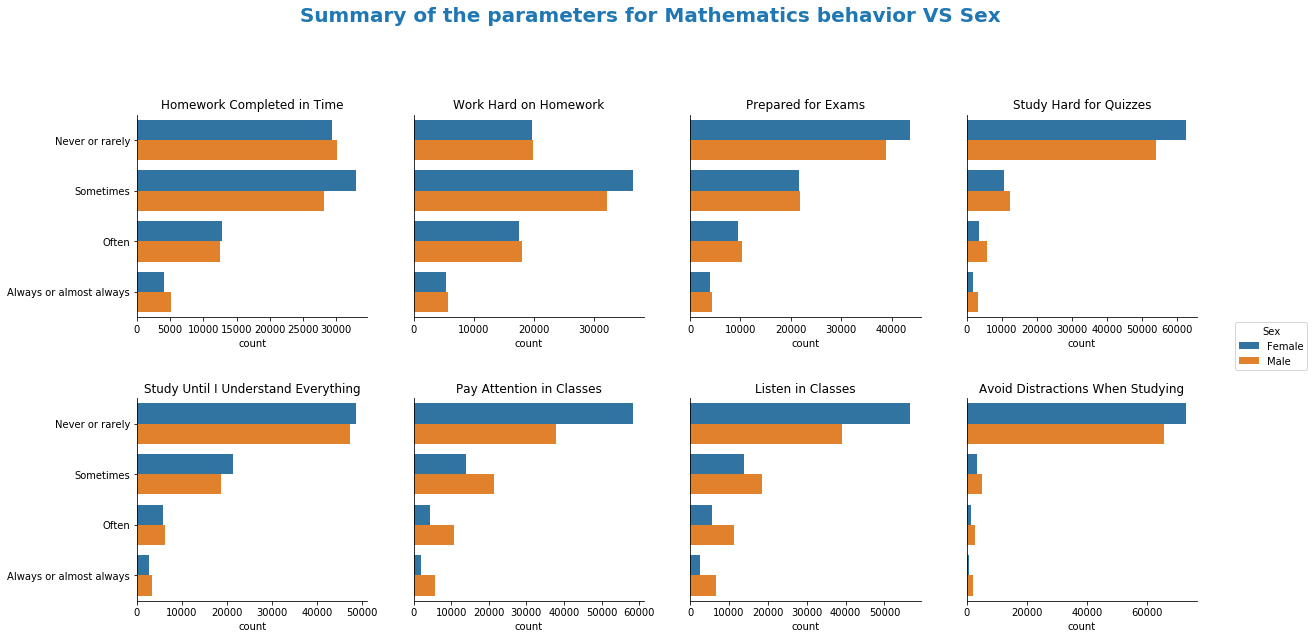

In [166]:
col = ['ST49Q01', 'ST49Q02', 'ST49Q03', 'ST49Q04', 'ST49Q05', 'ST49Q06', 'ST49Q07', 'ST49Q09']

titles = ["Homework Completed in Time", "Work Hard on Homework", "Prepared for Exams",
          "Study Hard for Quizzes", 'Study Until I Understand Everything', "Pay Attention in Classes",
          'Listen in Classes', "Avoid Distractions When Studying", "Keep Work Organized"]

axes = summary_hue_barplot_items(pisa2012, col, "ST04Q01","Summary of the parameters for Mathematics behavior VS Sex", titles, 
                             nr=2, nc=4, figh=19, figw=10, 
                             vert=False, fig_a_hspace=.4, fig_a_wspace=.2)
for i in [1,2,3,5,6,7]:
    axes[i].set_yticks([],[]);
axes[3].legend(title="Sex",bbox_to_anchor=(1.5, 0));

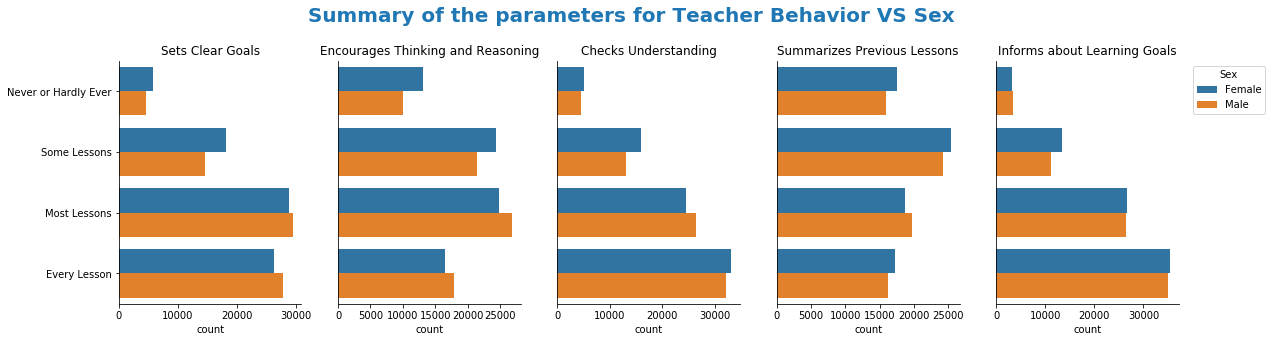

In [167]:
col = ['ST79Q01', 'ST79Q02', 'ST79Q06', 'ST79Q08', 'ST79Q15']
titles = ["Sets Clear Goals", "Encourages Thinking and Reasoning", "Checks Understanding", "Summarizes Previous Lessons",
          "Informs about Learning Goals"]
axes = summary_hue_barplot_items(pisa2012, col, 
                                 "ST04Q01", "Summary of the parameters for Teacher Behavior VS Sex", 
                                 titles, vert=False,
                                 nr=1, nc=5,figh=19, figw=5)
for i in [1,2,3,4]:
    axes[i].set_yticks([],[]);
axes[4].legend(title="Sex",bbox_to_anchor=(1.5, 1));

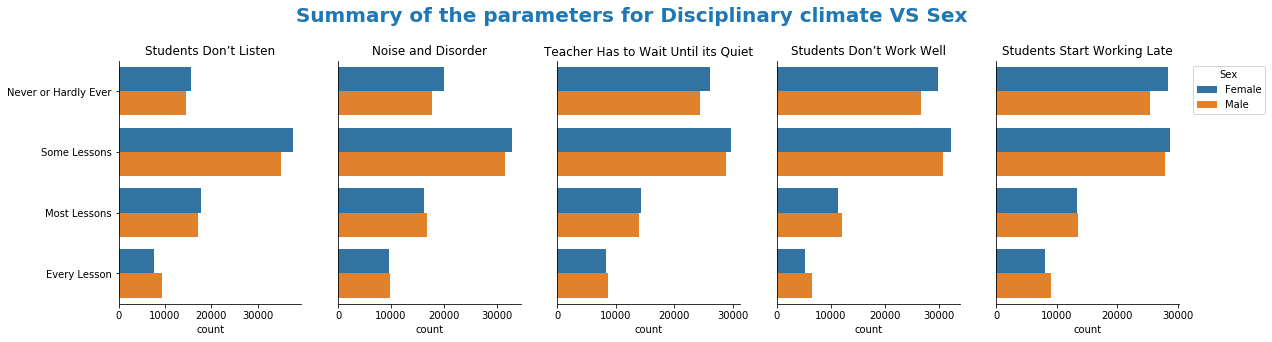

In [168]:
col = ['ST81Q01', 'ST81Q02', 'ST81Q03', 'ST81Q04', 'ST81Q05']
titles = ["Students Don’t Listen", 
          "Noise and Disorder",
          "Teacher Has to Wait Until its Quiet", "Students Don’t Work Well", 
          "Students Start Working Late"
         ]
axes = summary_hue_barplot_items(pisa2012, col, "ST04Q01", 
                                 "Summary of the parameters for Disciplinary climate VS Sex", titles, 
                                 nr=1, nc=5,figh=19, figw=5, vert=False)
for i in [1,2,3,4]:
    axes[i].set_yticks([],[]);
axes[4].legend(title="Sex",bbox_to_anchor=(1.5, 1));

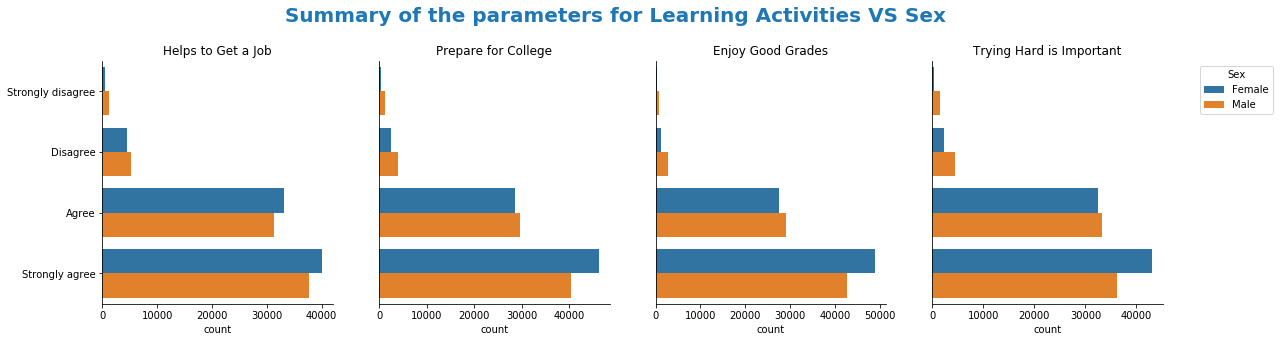

In [169]:
col = ["ST89Q02", "ST89Q03", "ST89Q04", "ST89Q05"]
titles = ["Helps to Get a Job", 
          "Prepare for College",
          "Enjoy Good Grades", 
          "Trying Hard is Important"
         ]
axes = summary_hue_barplot_items(pisa2012, col, "ST04Q01", 
                             "Summary of the parameters for Learning Activities VS Sex", titles, vert=False, 
                             nr=1, nc=4,figh=19, figw=5)
for i in [1,2,3]:
    axes[i].set_yticks([],[]);
axes[3].legend(title="Sex",bbox_to_anchor=(1.5, 1));

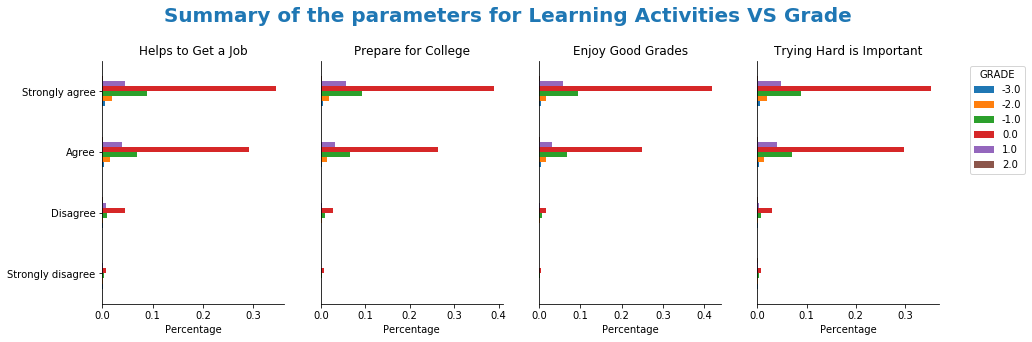

In [170]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(141)
pd.crosstab(pisa2012['ST89Q02'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Helps to Get a Job",
                                                                         stacked=False, rot=0,
                                                                         ax=ax1, legend=False);
ax1.set_ylabel("")
ax1.set_xlabel("Percentage")


ax2 = fig.add_subplot(142)
pd.crosstab(pisa2012['ST89Q03'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Prepare for College",
                                                                         stacked=False,
                                                                         ax=ax2, legend=False);
ax2.set_ylabel("")
ax2.set_yticks([],[])
ax2.set_xlabel("Percentage")


ax3 = fig.add_subplot(143)
pd.crosstab(pisa2012['ST89Q04'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title= "Enjoy Good Grades",
                                                                         stacked=False, rot=15,
                                                                         ax=ax3, legend=False);
ax3.set_ylabel("")
ax3.set_yticks([],[])
ax3.set_xlabel("Percentage")

ax4 = fig.add_subplot(144)
pd.crosstab(pisa2012['ST89Q05'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Trying Hard is Important",
                                                                         stacked=False, rot=15, ax=ax4);
ax4.legend(title="GRADE",bbox_to_anchor=(1.5, 1))
ax4.set_ylabel("");
ax4.set_xlabel("Percentage")
ax4.set_yticks([],[]);
fig.suptitle(t="Summary of the parameters for Learning Activities VS Grade",
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=0.8);
ax4.legend(title="GRADE",bbox_to_anchor=(1.5, 1));

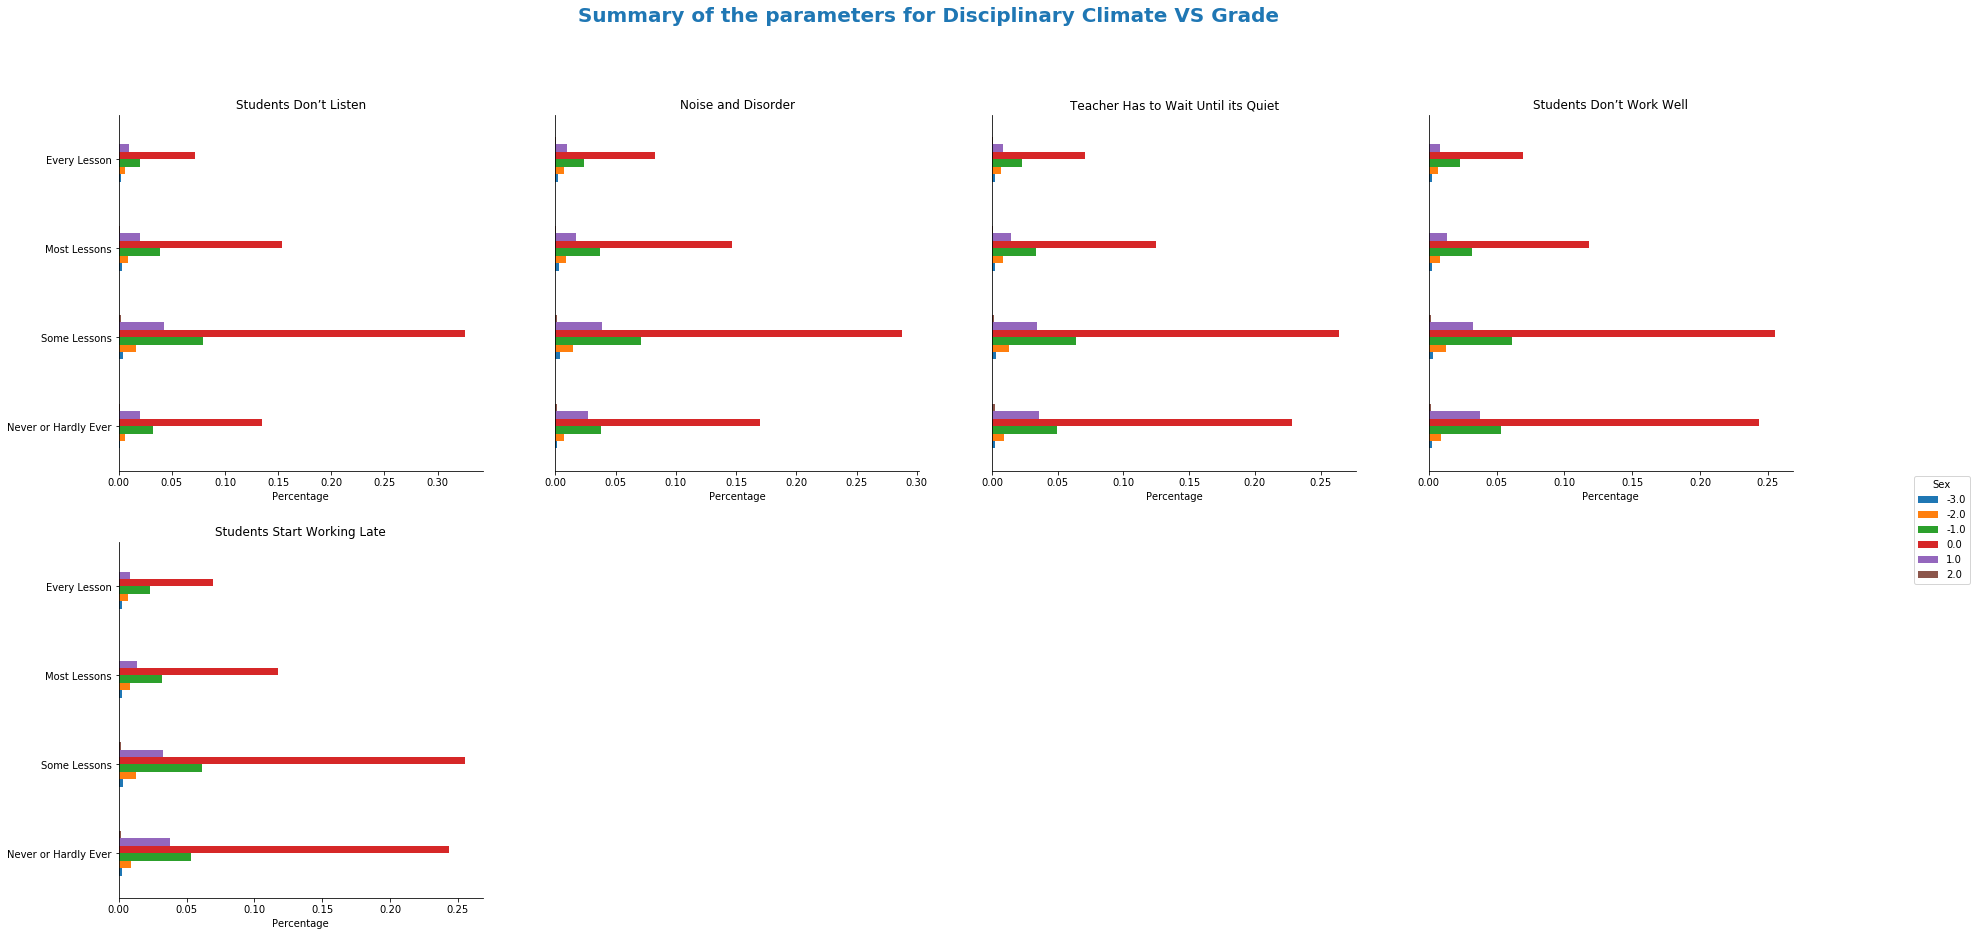

In [171]:
fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(241)
pd.crosstab(pisa2012['ST81Q01'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Students Don’t Listen",
                                                                         stacked=False, rot=0,
                                                                         ax=ax1, legend=False);
ax1.set_ylabel("")
ax1.set_xlabel("Percentage")


ax2 = fig.add_subplot(242)
pd.crosstab(pisa2012['ST81Q02'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Noise and Disorder",
                                                                         stacked=False,
                                                                         ax=ax2, legend=False);
ax2.set_ylabel("")
ax2.set_yticks([],[])
ax2.set_xlabel("Percentage")


ax3 = fig.add_subplot(243)
pd.crosstab(pisa2012['ST81Q03'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title= "Teacher Has to Wait Until its Quiet",
                                                                         stacked=False, rot=0,
                                                                         ax=ax3, legend=False);
ax3.set_ylabel("")
ax3.set_yticks([],[])
ax3.set_xlabel("Percentage")

ax4 = fig.add_subplot(244)
pd.crosstab(pisa2012['ST81Q05'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Students Don’t Work Well",
                                                                         stacked=False, rot=0, ax=ax4, legend=False);
ax4.legend(title="GRADE",bbox_to_anchor=(1.4, 0))
ax4.set_ylabel("");
ax4.set_xlabel("Percentage")
ax4.set_yticks([],[]);
ax4.legend(title="Sex",bbox_to_anchor=(1.5, 0));

ax5 = fig.add_subplot(245)
pd.crosstab(pisa2012['ST81Q05'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Students Start Working Late",
                                                                         stacked=False, rot=0, ax=ax5, legend=False);
ax5.set_xlabel("Percentage")
ax5.set_ylabel("");


fig.suptitle(t="Summary of the parameters for Disciplinary Climate VS Grade",
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=0.85, hspace=0.2);

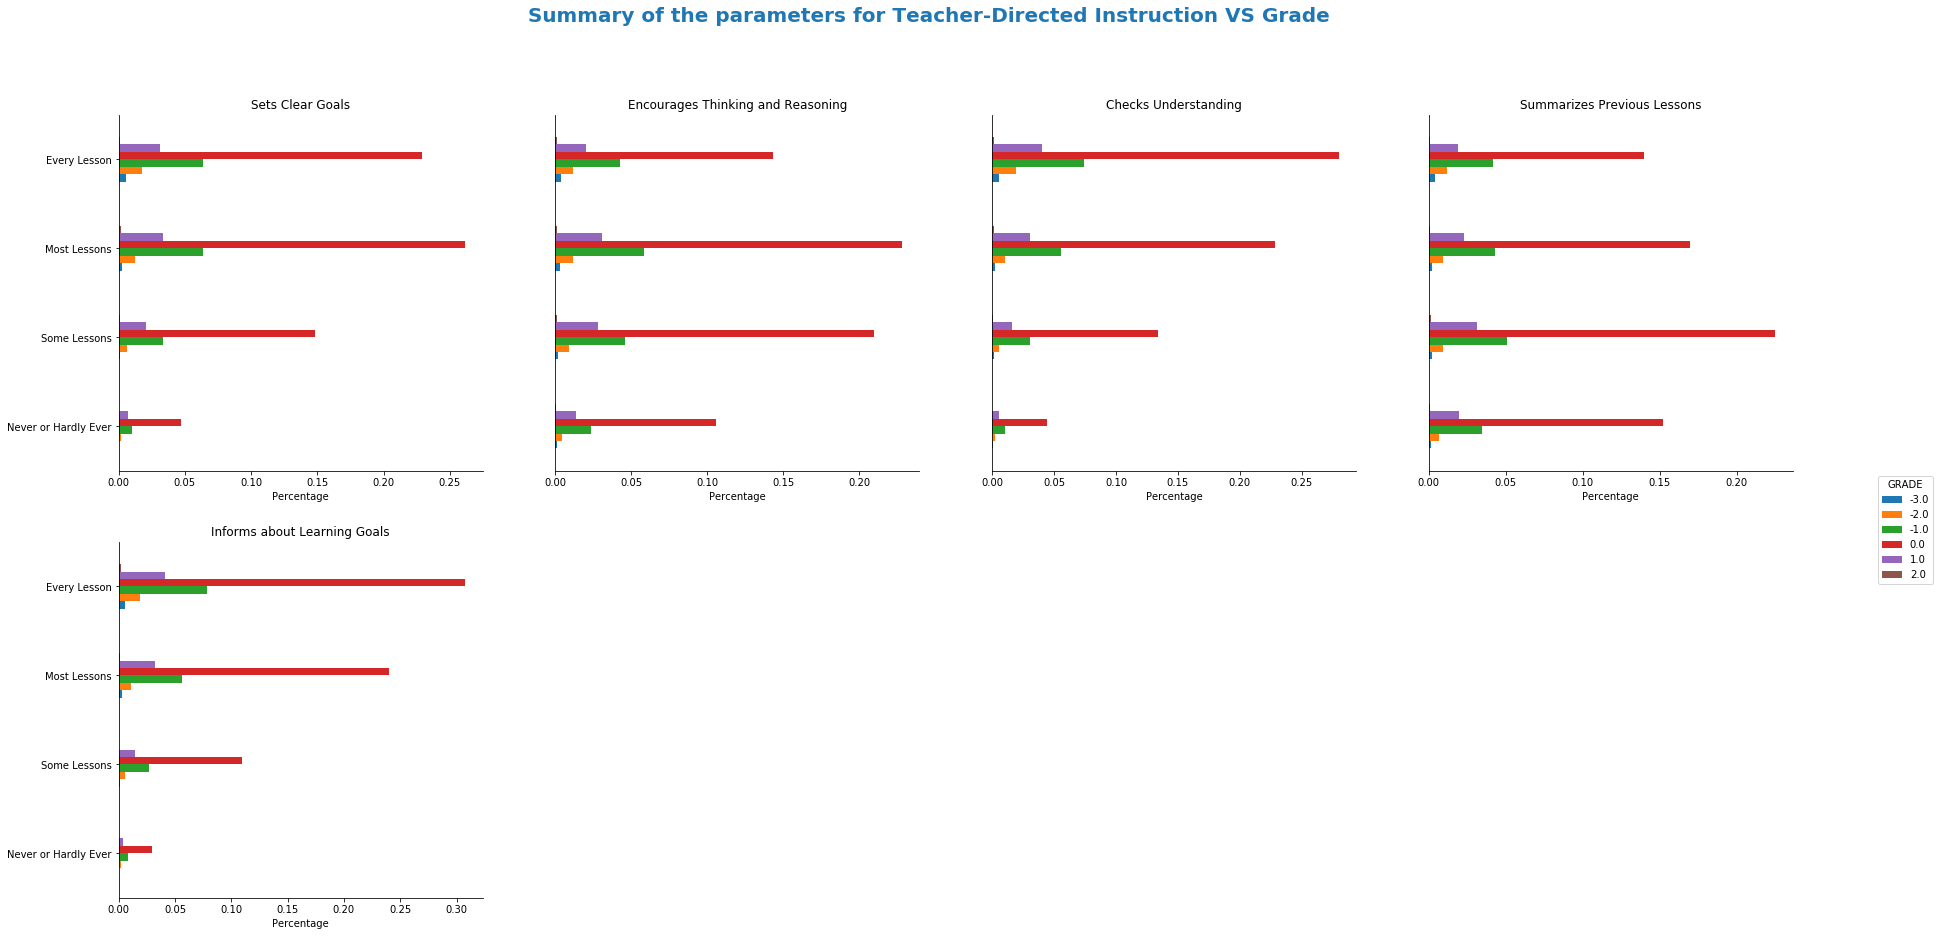

In [172]:
fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(241)
pd.crosstab(pisa2012['ST79Q01'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Sets Clear Goals",
                                                                         stacked=False, rot=0,
                                                                         ax=ax1, legend=False);
ax1.set_ylabel("")
ax1.set_xlabel("Percentage")


ax2 = fig.add_subplot(242)
pd.crosstab(pisa2012['ST79Q02'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Encourages Thinking and Reasoning",
                                                                         stacked=False,
                                                                         ax=ax2, legend=False);
ax2.set_ylabel("")
ax2.set_yticks([],[])
ax2.set_xlabel("Percentage")


ax3 = fig.add_subplot(243)
pd.crosstab(pisa2012['ST79Q06'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title= "Checks Understanding",
                                                                         stacked=False, rot=0,
                                                                         ax=ax3, legend=False);
ax3.set_ylabel("")
ax3.set_yticks([],[])
ax3.set_xlabel("Percentage")

ax4 = fig.add_subplot(244)
pd.crosstab(pisa2012['ST79Q08'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Summarizes Previous Lessons",
                                                                         stacked=False, rot=0, ax=ax4, legend=False);
ax4.legend(title="GRADE",bbox_to_anchor=(1.4, 0));
ax4.set_ylabel("");
ax4.set_xlabel("Percentage")
ax4.set_yticks([],[]);

ax5 = fig.add_subplot(245)
pd.crosstab(pisa2012['ST79Q15'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Informs about Learning Goals",
                                                                         stacked=False, rot=0, ax=ax5, legend=False);
ax5.set_xlabel("Percentage")
ax5.set_ylabel("");


fig.suptitle(t="Summary of the parameters for Teacher-Directed Instruction VS Grade",
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=0.85, hspace=0.2);

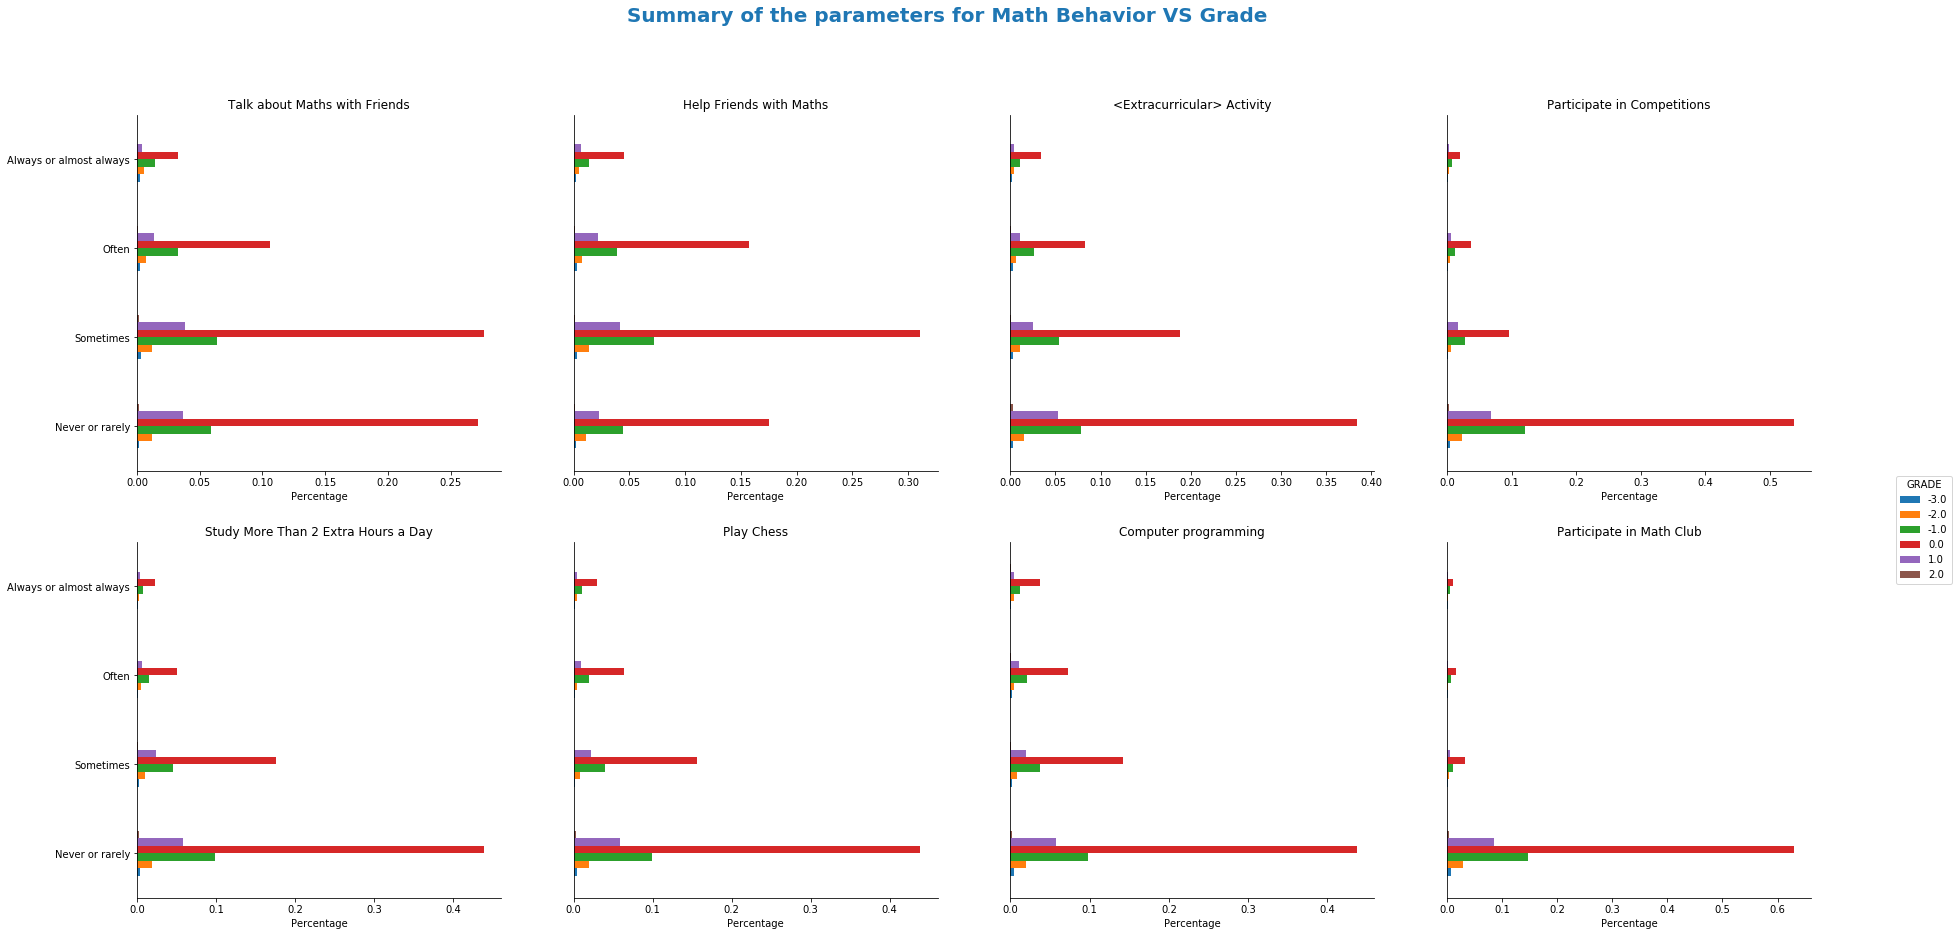

In [173]:
fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(241)
pd.crosstab(pisa2012['ST49Q01'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Talk about Maths with Friends",
                                                                         stacked=False, rot=0,
                                                                         ax=ax1, legend=False);
ax1.set_ylabel("")
ax1.set_xlabel("Percentage")


ax2 = fig.add_subplot(242)
pd.crosstab(pisa2012['ST49Q02'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Help Friends with Maths",
                                                                         stacked=False,
                                                                         ax=ax2, legend=False);
ax2.set_ylabel("")
ax2.set_yticks([],[])
ax2.set_xlabel("Percentage")


ax3 = fig.add_subplot(243)
pd.crosstab(pisa2012['ST49Q03'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title= "<Extracurricular> Activity",
                                                                         stacked=False, rot=0,
                                                                         ax=ax3, legend=False);
ax3.set_ylabel("")
ax3.set_yticks([],[])
ax3.set_xlabel("Percentage")

ax4 = fig.add_subplot(244)
pd.crosstab(pisa2012['ST49Q04'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Participate in Competitions",
                                                                         stacked=False, rot=0, ax=ax4, legend=False);
ax4.legend(title="GRADE",bbox_to_anchor=(1.4, 0))
ax4.set_ylabel("");
ax4.set_xlabel("Percentage")
ax4.set_yticks([],[]);

ax5 = fig.add_subplot(245)
pd.crosstab(pisa2012['ST49Q05'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title='Study More Than 2 Extra Hours a Day',
                                                                         stacked=False, rot=0, ax=ax5, legend=False);
ax5.set_xlabel("Percentage")
ax5.set_ylabel("");

ax6 = fig.add_subplot(246)
pd.crosstab(pisa2012['ST49Q06'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Play Chess",
                                                                         stacked=False, rot=0, ax=ax6, legend=False);
ax6.set_ylabel("");
ax6.set_xlabel("Percentage")
ax6.set_yticks([],[]);

ax7 = fig.add_subplot(247)
pd.crosstab(pisa2012['ST49Q07'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title='Computer programming',
                                                                         stacked=False, rot=0, ax=ax7, legend=False);
ax7.set_ylabel("");
ax7.set_xlabel("Percentage")
ax7.set_yticks([],[]);

ax8 = fig.add_subplot(248)
pd.crosstab(pisa2012['ST49Q09'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Participate in Math Club",
                                                                         stacked=False, rot=0, ax=ax8, legend=False);
ax8.set_ylabel("");
ax8.set_xlabel("Percentage")
ax8.set_yticks([],[]);


fig.suptitle(t="Summary of the parameters for Math Behavior VS Grade",
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=0.85, hspace=0.2);

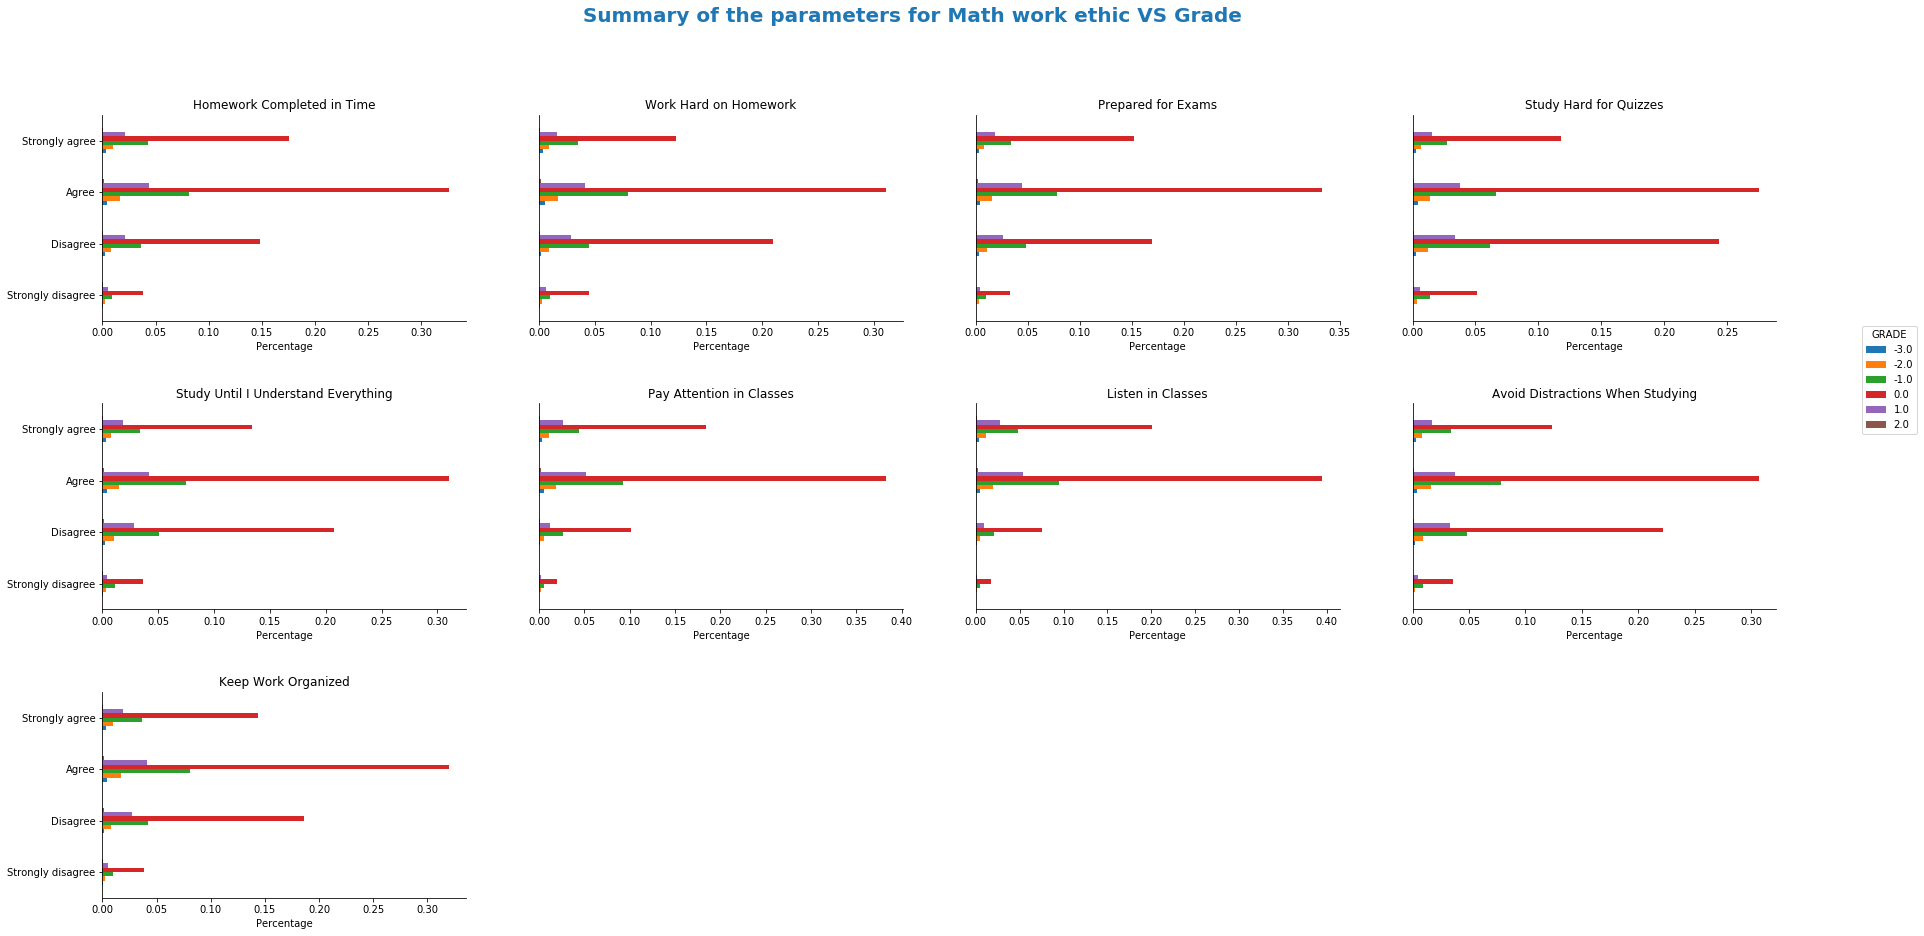

In [174]:
fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(341)
pd.crosstab(pisa2012['ST46Q01'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Homework Completed in Time",
                                                                         stacked=False, rot=0,
                                                                         ax=ax1, legend=False);
ax1.set_ylabel("")
ax1.set_xlabel("Percentage")


ax2 = fig.add_subplot(342)
pd.crosstab(pisa2012['ST46Q02'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Work Hard on Homework",
                                                                         stacked=False,
                                                                         ax=ax2, legend=False);
ax2.set_ylabel("")
ax2.set_yticks([],[])
ax2.set_xlabel("Percentage")


ax3 = fig.add_subplot(343)
pd.crosstab(pisa2012['ST46Q03'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title= "Prepared for Exams",
                                                                         stacked=False, rot=0,
                                                                         ax=ax3, legend=False);
ax3.set_ylabel("")
ax3.set_yticks([],[])
ax3.set_xlabel("Percentage")

ax4 = fig.add_subplot(344)
pd.crosstab(pisa2012['ST46Q04'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Study Hard for Quizzes",
                                                                         stacked=False, rot=0, ax=ax4, legend=False);
ax4.legend(title="GRADE",bbox_to_anchor=(1.4, 0))
ax4.set_ylabel("");
ax4.set_xlabel("Percentage")
ax4.set_yticks([],[]);

ax5 = fig.add_subplot(345)
pd.crosstab(pisa2012['ST46Q05'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title='Study Until I Understand Everything',
                                                                         stacked=False, rot=0, ax=ax5, legend=False);
ax5.set_xlabel("Percentage")
ax5.set_ylabel("");

ax6 = fig.add_subplot(346)
pd.crosstab(pisa2012['ST46Q06'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Pay Attention in Classes",
                                                                         stacked=False, rot=0, ax=ax6, legend=False);
ax6.set_ylabel("");
ax6.set_xlabel("Percentage")
ax6.set_yticks([],[]);

ax7 = fig.add_subplot(347)
pd.crosstab(pisa2012['ST46Q07'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title='Listen in Classes',
                                                                         stacked=False, rot=0, ax=ax7, legend=False);
ax7.set_ylabel("");
ax7.set_xlabel("Percentage")
ax7.set_yticks([],[]);

ax8 = fig.add_subplot(348)
pd.crosstab(pisa2012['ST46Q08'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Avoid Distractions When Studying",
                                                                         stacked=False, rot=0, ax=ax8, legend=False);
ax8.set_ylabel("");
ax8.set_xlabel("Percentage")
ax8.set_yticks([],[]);

ax9 = fig.add_subplot(349)
pd.crosstab(pisa2012['ST46Q09'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Keep Work Organized",
                                                                         stacked=False, rot=0, ax=ax9, legend=False);
ax9.set_ylabel("");
ax9.set_xlabel("Percentage")


fig.suptitle(t="Summary of the parameters for Math work ethic VS Grade",
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=0.85, hspace=0.4);

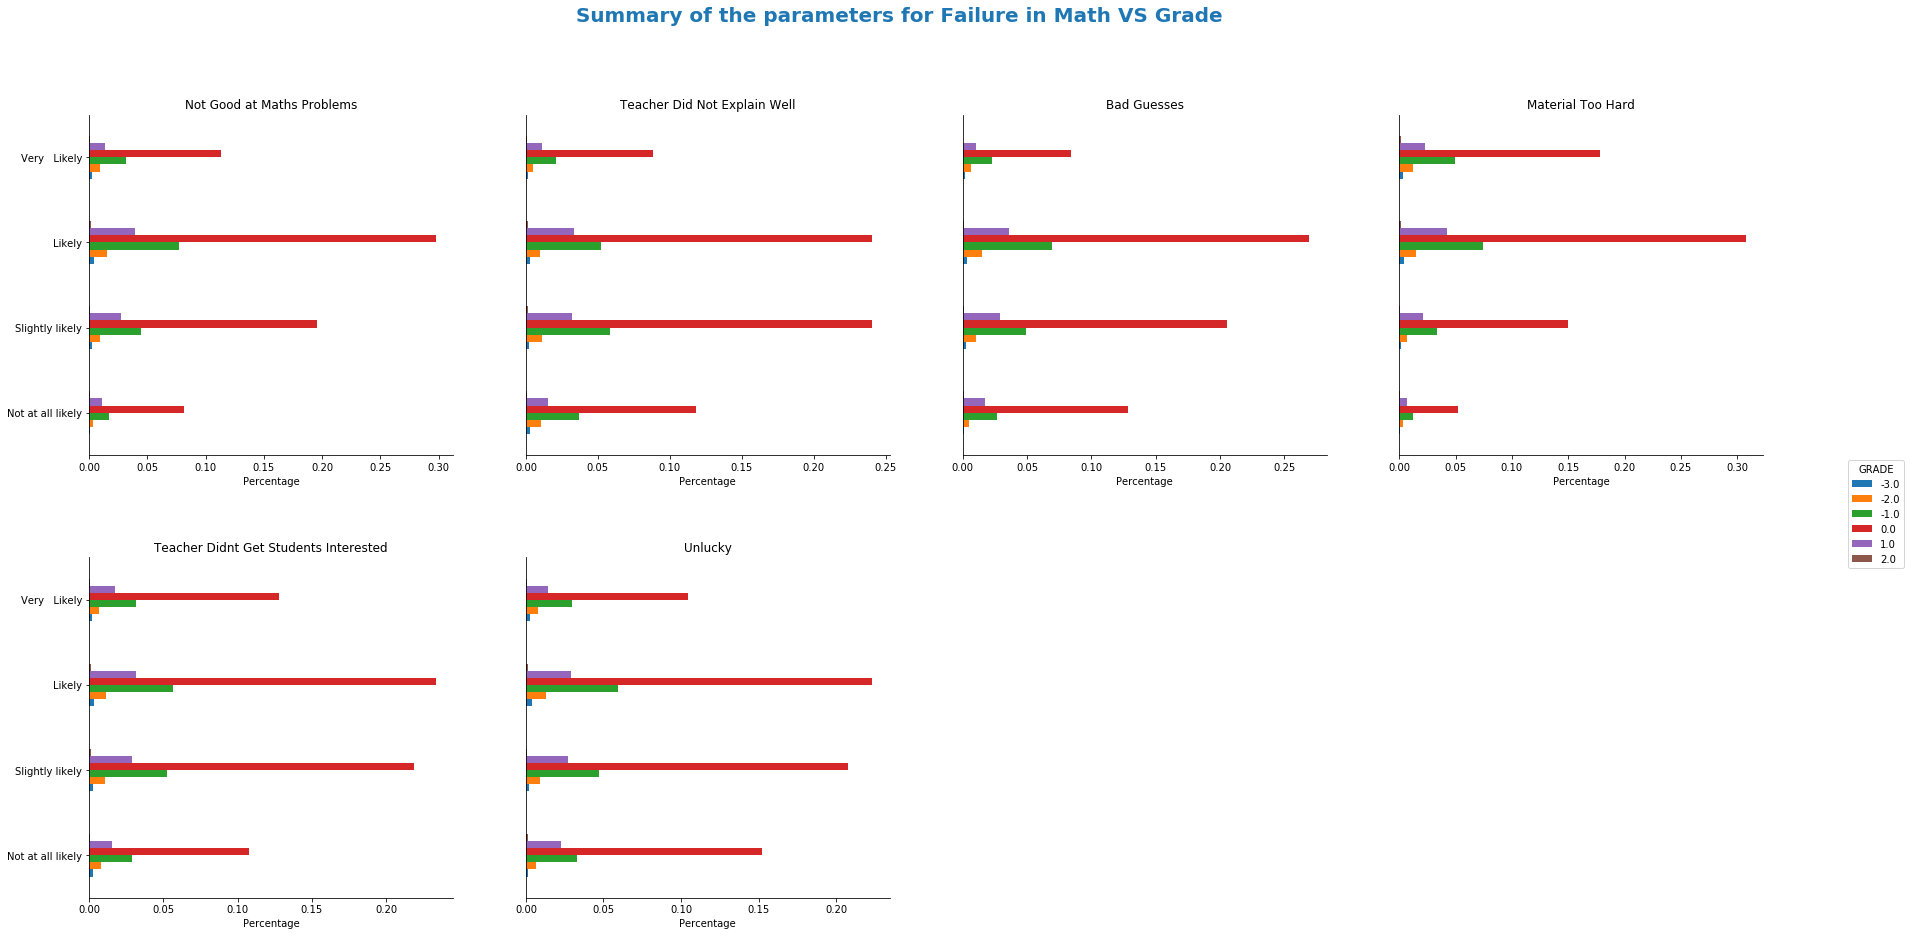

In [175]:
fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(241)
pd.crosstab(pisa2012['ST44Q01'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Not Good at Maths Problems",
                                                                         stacked=False, rot=0,
                                                                         ax=ax1, legend=False);
ax1.set_ylabel("")
ax1.set_xlabel("Percentage")


ax2 = fig.add_subplot(242)
pd.crosstab(pisa2012['ST44Q03'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Teacher Did Not Explain Well",
                                                                         stacked=False,
                                                                         ax=ax2, legend=False);
ax2.set_ylabel("")
ax2.set_yticks([],[])
ax2.set_xlabel("Percentage")


ax3 = fig.add_subplot(243)
pd.crosstab(pisa2012['ST44Q04'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Bad Guesses",
                                                                         stacked=False, rot=0,
                                                                         ax=ax3, legend=False);
ax3.set_ylabel("")
ax3.set_yticks([],[])
ax3.set_xlabel("Percentage")

ax4 = fig.add_subplot(244)
pd.crosstab(pisa2012['ST44Q05'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title="Material Too Hard",
                                                                         stacked=False, rot=0, ax=ax4, legend=False);
ax4.legend(title="GRADE",bbox_to_anchor=(1.4, 0))
ax4.set_ylabel("");
ax4.set_xlabel("Percentage")
ax4.set_yticks([],[]);

ax5 = fig.add_subplot(245)
pd.crosstab(pisa2012['ST44Q07'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title='Teacher Didnt Get Students Interested',
                                                                         stacked=False, rot=0, ax=ax5, legend=False);
ax5.set_ylabel("");
ax5.set_xlabel("Percentage")

ax6 = fig.add_subplot(246)
pd.crosstab(pisa2012['ST44Q08'], pisa2012['GRADE'], normalize=True).plot(kind='barh',
                                                                         title='Unlucky',
                                                                         stacked=False, rot=0, ax=ax6, legend=False);
ax6.set_xlabel("Percentage")
ax6.set_ylabel("");
ax6.set_yticks([],[]);


fig.suptitle(t="Summary of the parameters for Failure in Math VS Grade",
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=0.85, hspace=0.3);

### Bivariate recap

<span style="color:white">Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?</span>.


> Plotting many of the main features against the region (OECD countries), sex, grade. We learned that the grade has an impact on some parameters of the failure in mathematics and mathematics work ethic i.e very few students has excellent grades because of their work ethic. 

<span style="color:white">Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?</span>.

> The distribution of sex and oecd countries among the population of study is respectively almost equal and unbalanced. 

## Multivariate Exploration
<span style="color:white">> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.</span>.

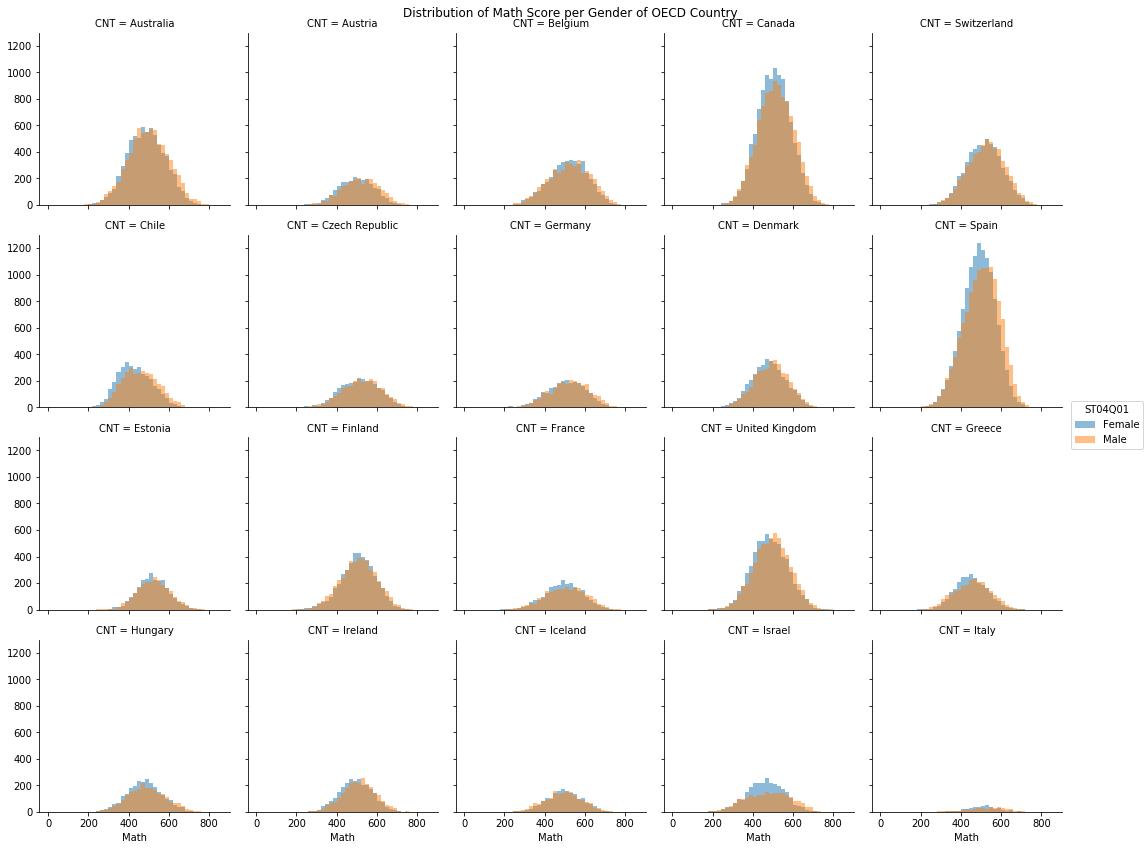

In [176]:
# FacetGrid for distribution of maths score according to OECD country
binsize = 20
pisa2012_oecd = pisa2012.query("OECD == 'OECD' ")
bins = np.arange(0, pisa2012_oecd['Math'].max()+binsize, binsize)

g = sb.FacetGrid(pisa2012_oecd, col='CNT', col_wrap=5, 
                 margin_titles=True, hue='ST04Q01')
g.map(plt.hist, 'Math', bins = bins, alpha=0.5)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Distribution of Math Score per Gender of OECD Country');
g.add_legend();

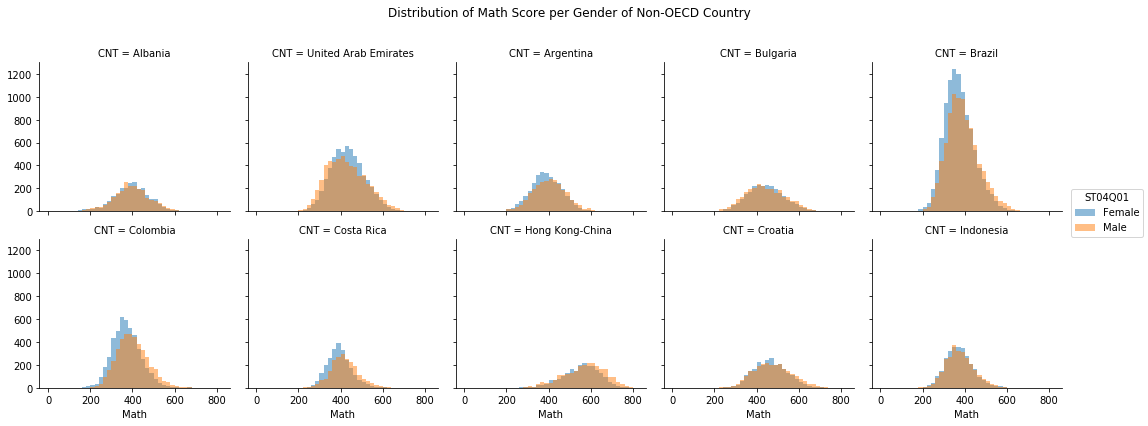

In [177]:
# FacetGrid for distribution of maths score according to OECD country
binsize = 20
pisa2012_non_oecd = pisa2012.query("OECD == 'Non-OECD' ")
bins = np.arange(0, pisa2012_non_oecd['Math'].max()+binsize, binsize)

g = sb.FacetGrid(pisa2012_non_oecd, col='CNT', col_wrap=5, 
                 margin_titles=True, hue='ST04Q01')
g.map(plt.hist, 'Math', bins = bins, alpha=0.5)
g.fig.subplots_adjust(top=.85)
g.fig.suptitle('Distribution of Math Score per Gender of Non-OECD Country');
g.add_legend();

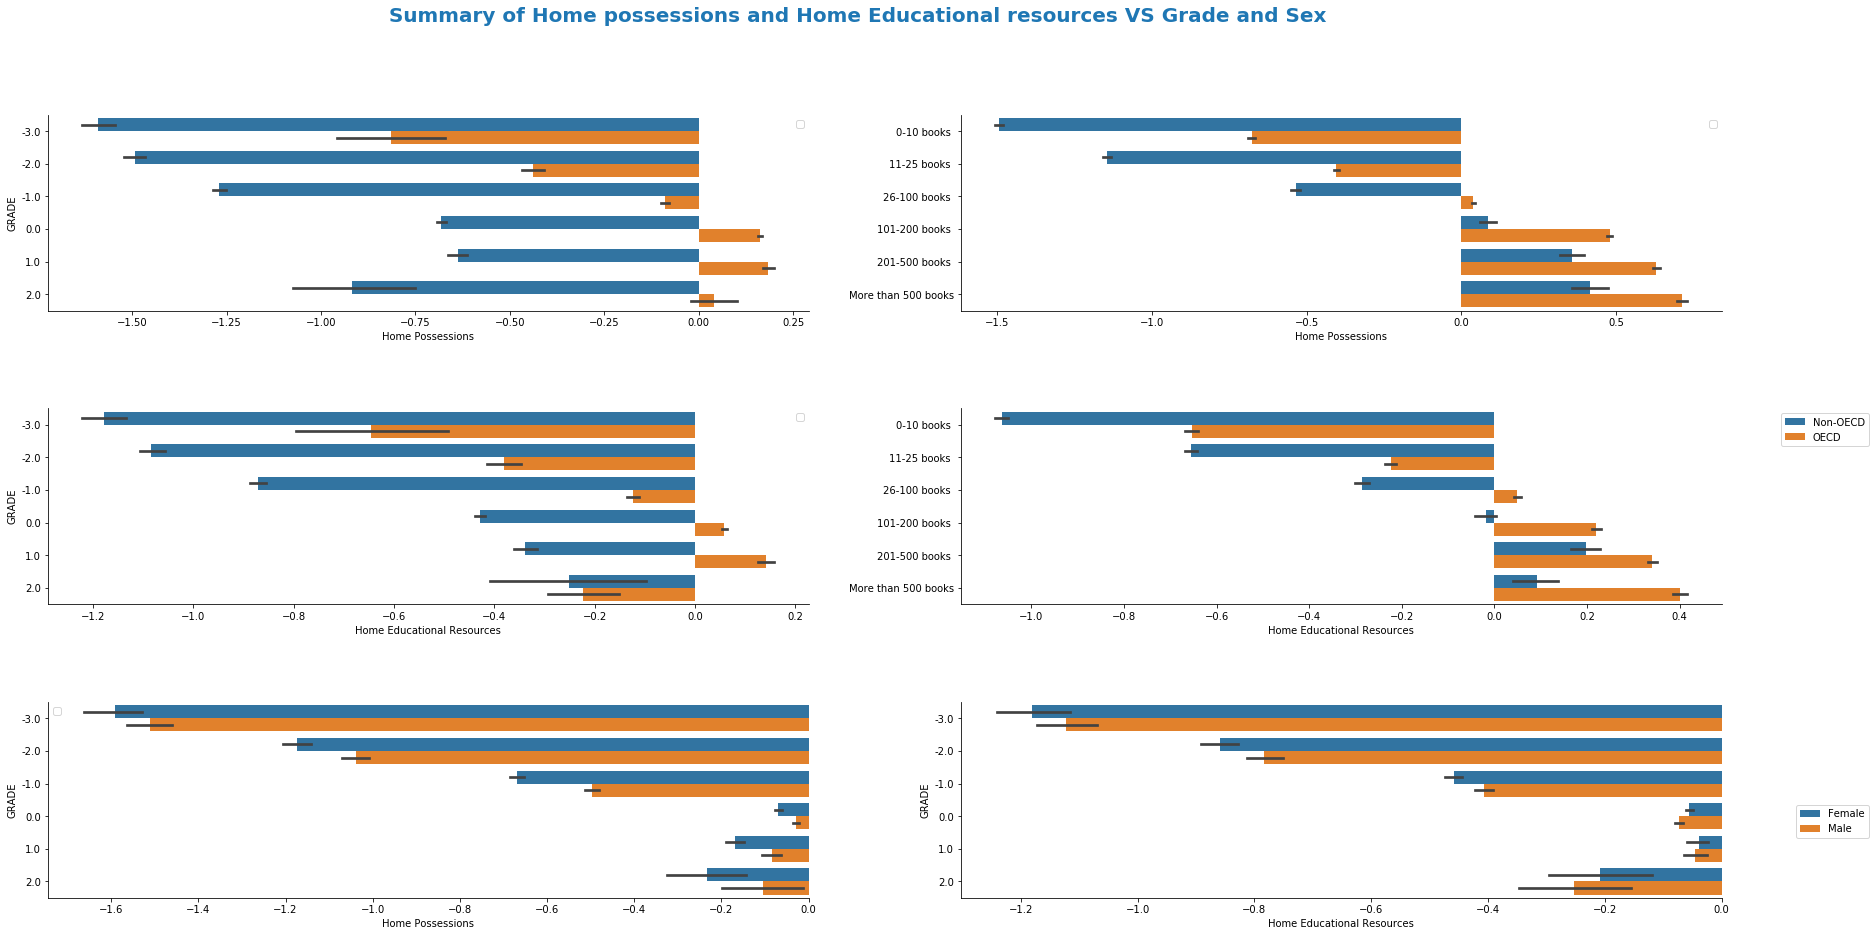

In [178]:
fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(321)
ax1 = sb.barplot(x = pisa2012['HOMEPOS'], y=pisa2012['GRADE'], hue=pisa2012['OECD'], ax=ax1);
ax1.legend([]);
ax1.set_xlabel("Home Possessions");

ax2 = fig.add_subplot(322)
ax2 = sb.barplot(x = pisa2012['HOMEPOS'], y=pisa2012['ST28Q01'], hue=pisa2012['OECD'], ax=ax2);
ax2.legend([]);
ax2.set_ylabel("");
ax2.set_xlabel("Home Possessions");

ax3 = fig.add_subplot(323)
ax3 = sb.barplot(x = pisa2012['HEDRES'], y=pisa2012['GRADE'], hue=pisa2012['OECD'], ax=ax3);
ax3.legend([]);
ax3.set_xlabel("Home Educational Resources");

ax4 = fig.add_subplot(324)
ax4 = sb.barplot(x = pisa2012['HEDRES'], y=pisa2012['ST28Q01'], hue=pisa2012['OECD'], ax=ax4);
ax4.legend(bbox_to_anchor=(1.2, 1));
ax4.set_ylabel("");
ax4.set_xlabel("Home Educational Resources");

ax5 = fig.add_subplot(325)
ax5 = sb.barplot(x = pisa2012['HOMEPOS'], y=pisa2012['GRADE'], hue=pisa2012['ST04Q01'], ax=ax5);
ax5.legend([]);
ax5.set_xlabel("Home Possessions");

ax6 = fig.add_subplot(326)
ax6 = sb.barplot(x = pisa2012['HEDRES'], y=pisa2012['GRADE'], hue=pisa2012['ST04Q01'], ax=ax6);
ax6.legend(bbox_to_anchor=(1.2, 0.5));
ax6.set_xlabel("Home Educational Resources");

fig.suptitle(t="Summary of Home possessions and Home Educational resources VS Grade and Sex",
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'tab:blue');
plt.subplots_adjust(top=0.85, hspace=0.5);

### Multivariate Recap

<span style="color:white">### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?</span>.

> Students oecd countries play a role in their grade.

<span style="color:white">### Were there any interesting or surprising interactions between features?</span>.


> Performance in mathematics is not gender based

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

The family wealth of students who are in OECD countries contribute to their mathematics performance as opposed to those who are in non OECD countries.

<span style="color:white">> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

</span>.


[Some visualizations inspiration in the notebook come from here](https://github.com/itsphily/Analyzing-Pisa-2012----Data-analysis-using-python-librairies-/blob/master/Exploration_template.ipynb)